In [42]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import string
import mplcursors
import sklearn.cluster
import os
%matplotlib notebook

<IPython.core.display.Javascript object>


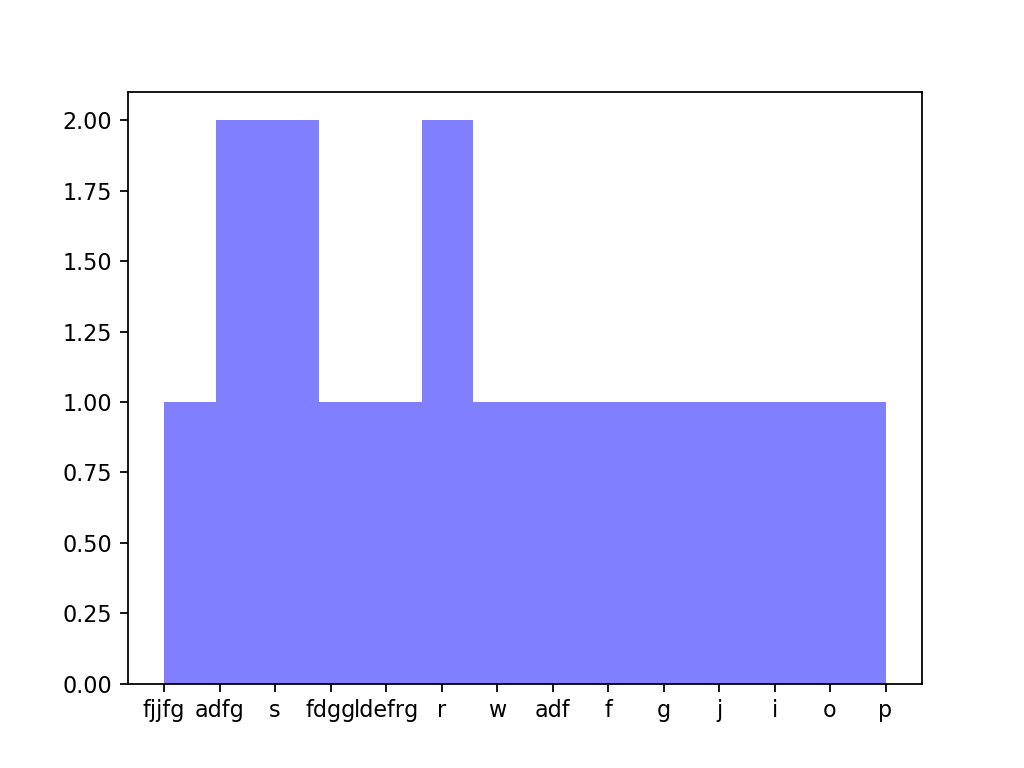

In [8]:
x = [21,22,23,4,5,6,77,8,9,10,31,32,32,33,34,35,36,37,18,49,50,100]
x = ["fjjfg", "adfg", "adfg", "s", "fdgg", "ldefrg", "r", "s", "r", "w", "adf", "f", "g", "j", "i", "o", "p"]
num_bins = len(np.unique(x))
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

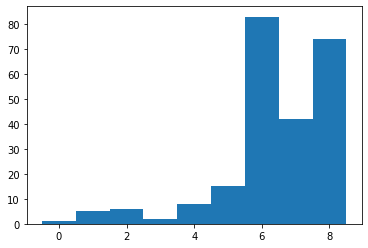

In [3]:
hs = [1,5,6,2,8,15,83,42,74]

plt.bar(np.arange(len(hs)), hs, width=1)
plt.show()

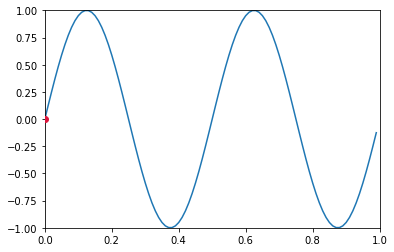

In [4]:
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import numpy as np


class SnaptoCursor(object):
    def __init__(self, ax, x, y):
        self.ax = ax
        self.ly = ax.axvline(color='k', alpha=0.2)  # the vert line
        self.marker, = ax.plot([0],[0], marker="o", color="crimson", zorder=3) 
        self.x = x
        self.y = y
        self.txt = ax.text(0.7, 0.9, '')

    def mouse_move(self, event):
        if not event.inaxes: return
        x, y = event.xdata, event.ydata
        indx = np.searchsorted(self.x, [x])[0]
        x = self.x[indx]
        y = self.y[indx]
        self.ly.set_xdata(x)
        self.marker.set_data([x],[y])
        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        self.txt.set_position((x,y))
        self.ax.figure.canvas.draw_idle()

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*2*np.pi*t)
fig, ax = plt.subplots()

#cursor = Cursor(ax)
cursor = SnaptoCursor(ax, t, s)
cid =  plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(t, s,)
plt.axis([0, 1, -1, 1])
plt.show()

#hs = [1,5,6,2,8,15,83,42,74]
#ax.bar(np.arange(len(hs)), hs, width=1)
#plt.show()

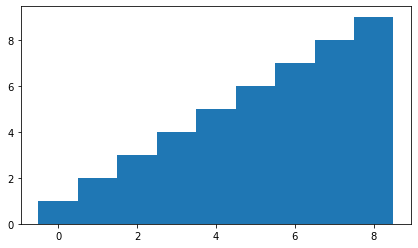

In [5]:
import string
import matplotlib.pyplot as plt
import mplcursors

fig, ax = plt.subplots(1, 1, figsize=(7, 4))

ax.bar(range(9), range(1, 10), align="center", width=1)
labels = string.ascii_uppercase[:9]
#ax.set(xticks=range(9), xticklabels=labels, title="Hover over a bar")

cursor = mplcursors.cursor(hover=True)
@cursor.connect("add")
def on_add(sel):
    x, y, width, height = sel.artist[sel.target.index].get_bbox().bounds
    #sel.annotation.set(text=f"{x+width/2}: {height}", position=(0, 20))
    #sel.annotation.xy = (x + width / 2, y + height)
    sel.annotation.set_text(f'x={int(x + 0.5)} h={int(height)}')
    
def format_coord(x, y):
    col = int(x + 0.5)
    return 'x=%1.4f, y=%1.4f' % (col, y)

ax.format_coord = format_coord

plt.show()

In [9]:
#RESULTS_FOR_HIST_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/result_for_hist_big_data"
RESULTS_FOR_HIST_PATH = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50"

In [10]:
#considered_patterns = ["9 35", "10 136", "11 719", "14 239", "18 800", "22 3921", "25 8331", "27 3622", "27 7869"]

In [11]:
import string
import matplotlib.pyplot as plt
import mplcursors

cursor = mplcursors.cursor(hover=True)
@cursor.connect("add")
def on_add(sel):
    x, y, width, height = sel.artist[sel.target.index].get_bbox().bounds
    sel.annotation.set_text(f'x={int(x + 0.5)} h={int(height)}')
    
def format_coord(x, y):
    col = int(x + 0.5)
    return 'x=%1.4f, y=%1.4f' % (col, y)

def show_hist(hist_data):
    fig, ax = plt.subplots(1, 1, figsize=(9, 3))
    ax.bar(range(len(hist_data)), hist_data, align="center", width=1)

    ax.format_coord = format_coord
    plt.show()

In [23]:
def print_hist_for_pattern(pattern, ngram, A, B):
    hist_path = RESULTS_FOR_HIST_PATH + "/" + pattern + "/" + str(ngram) + "gram" + "/" + "hist.txt"
    hist_file = open(hist_path, "r")
    hist_data = hist_file.read().split(" ")
    #print(hist_data)
    hist_data = [int(elem) for elem in hist_data if elem != '']
    hist_data = hist_data[A:B]
    show_hist(hist_data)
    hist_file.close()

In [24]:
def print_hist_for_sample(pattern, sample, ngram, A, B):
    hist_path = RESULTS_FOR_HIST_PATH + "/" + pattern + "/" + str(ngram) + "gram" + "/" + sample + "_hist.txt"
    hist_file = open(hist_path, "r")
    hist_data = hist_file.read().split(" ")
    #print(hist_data)
    hist_data = [int(elem) for elem in hist_data if elem != '']
    #print(len(hist_data))
    hist_data = hist_data[A:B]
    #print(hist_data)
    show_hist(hist_data)

<IPython.core.display.Javascript object>


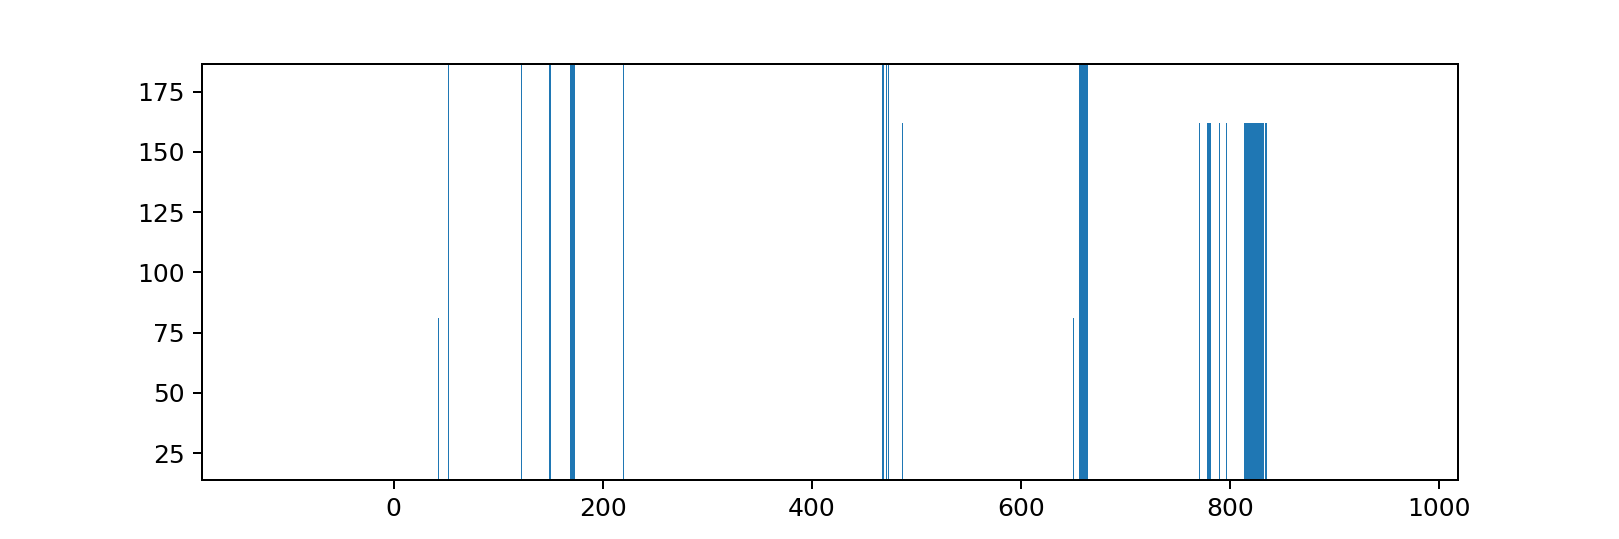

In [34]:
print_hist_for_pattern("9 35", 7, 0, -1)

<IPython.core.display.Javascript object>


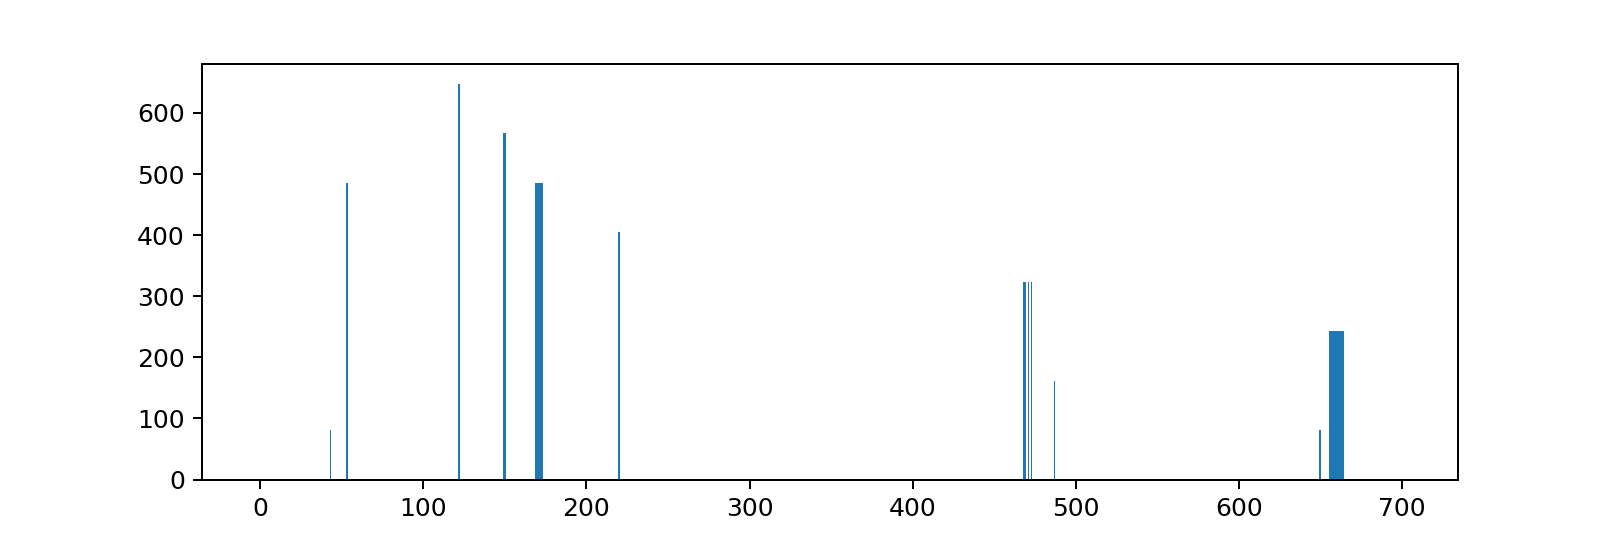

In [37]:
print_hist_for_pattern("9 35", 7, 0, 700)

### Considering particular samples:

<IPython.core.display.Javascript object>


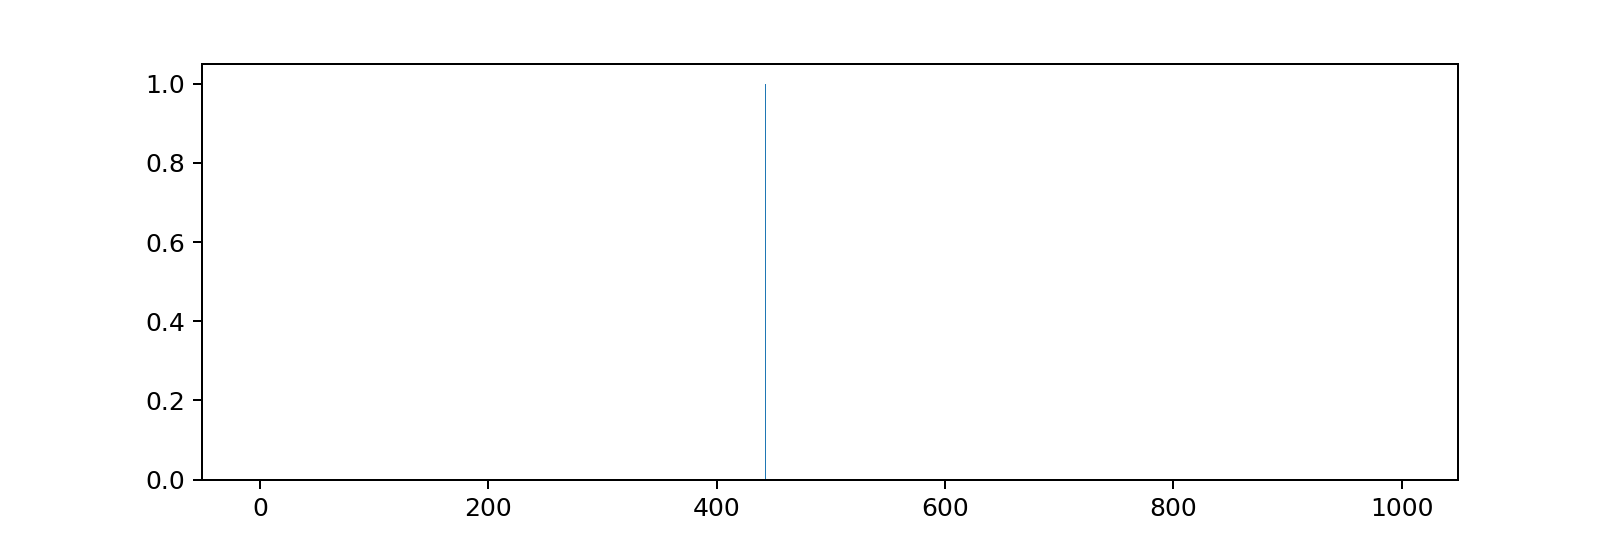

<IPython.core.display.Javascript object>


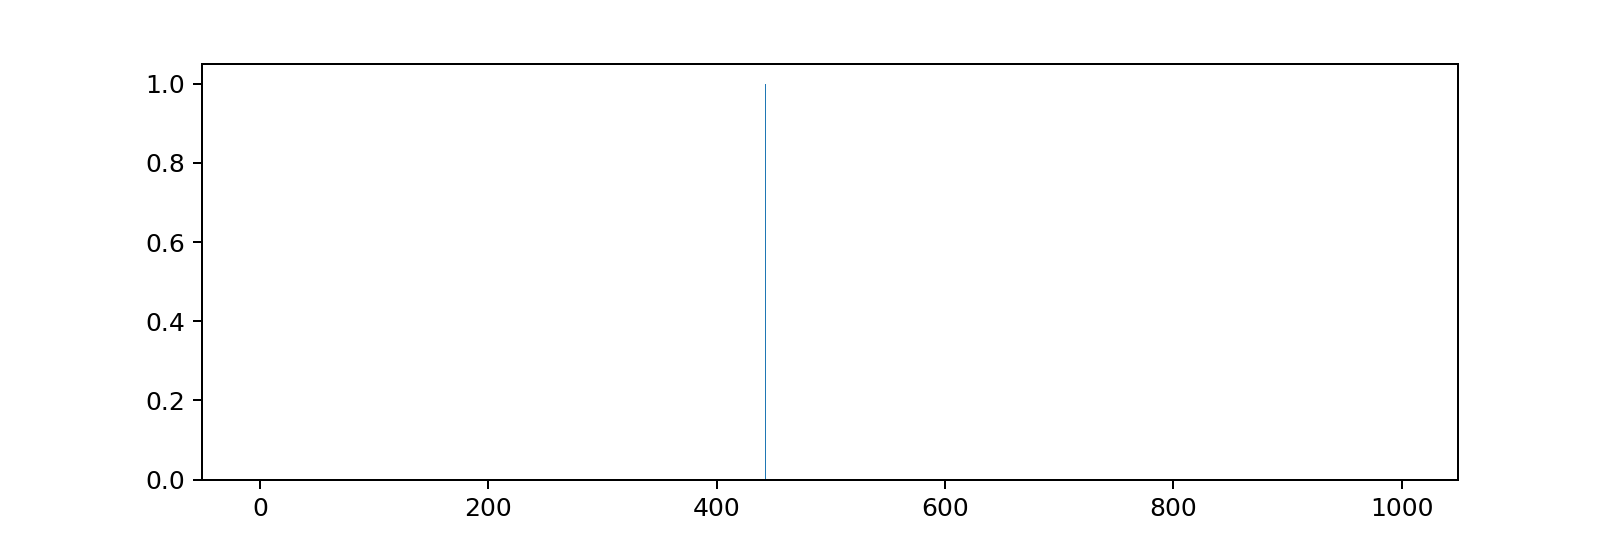

<IPython.core.display.Javascript object>


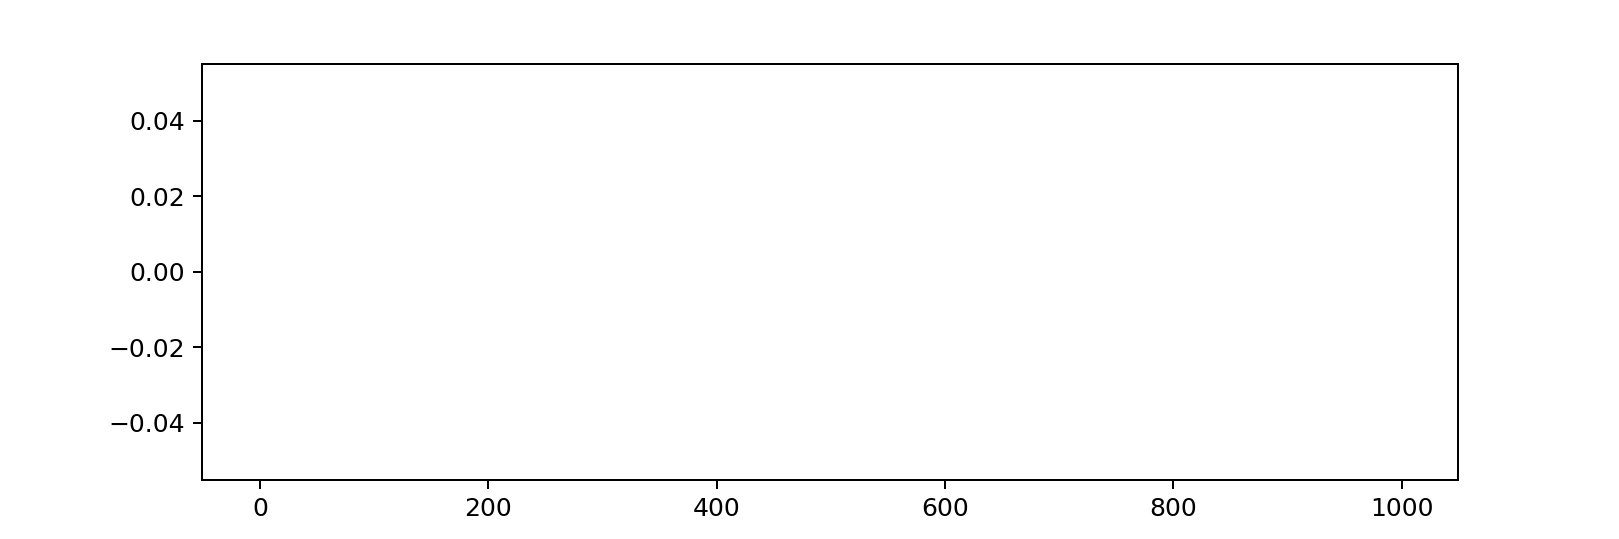

<IPython.core.display.Javascript object>


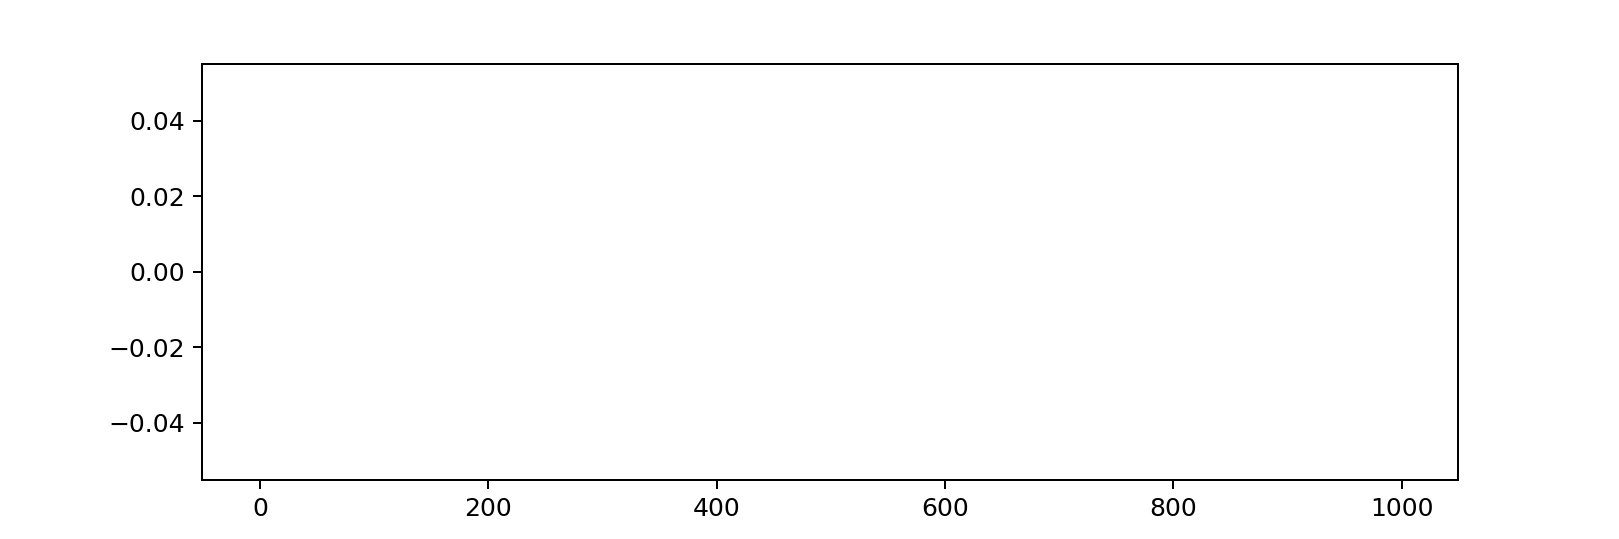

In [81]:
print_hist_for_sample("6 3264", "sampleChange1", 5, 0, 1000)
print_hist_for_sample("6 3264", "sampleChange2", 5, 0, 1000)
print_hist_for_sample("6 3264", "sampleChange3", 5, 0, 1000)
print_hist_for_sample("6 3264", "sampleChange4", 5, 0, 1000)

In [ ]:
print_hist_for_pattern("10 136", 7, 0, -1)

In [ ]:
print_hist_for_pattern("11 719", 7, 0, -1)

In [ ]:
print_hist_for_pattern("14 239", 7, 0, -1)

In [ ]:
print_hist_for_pattern("18 800", 7, 0, -1)

<IPython.core.display.Javascript object>


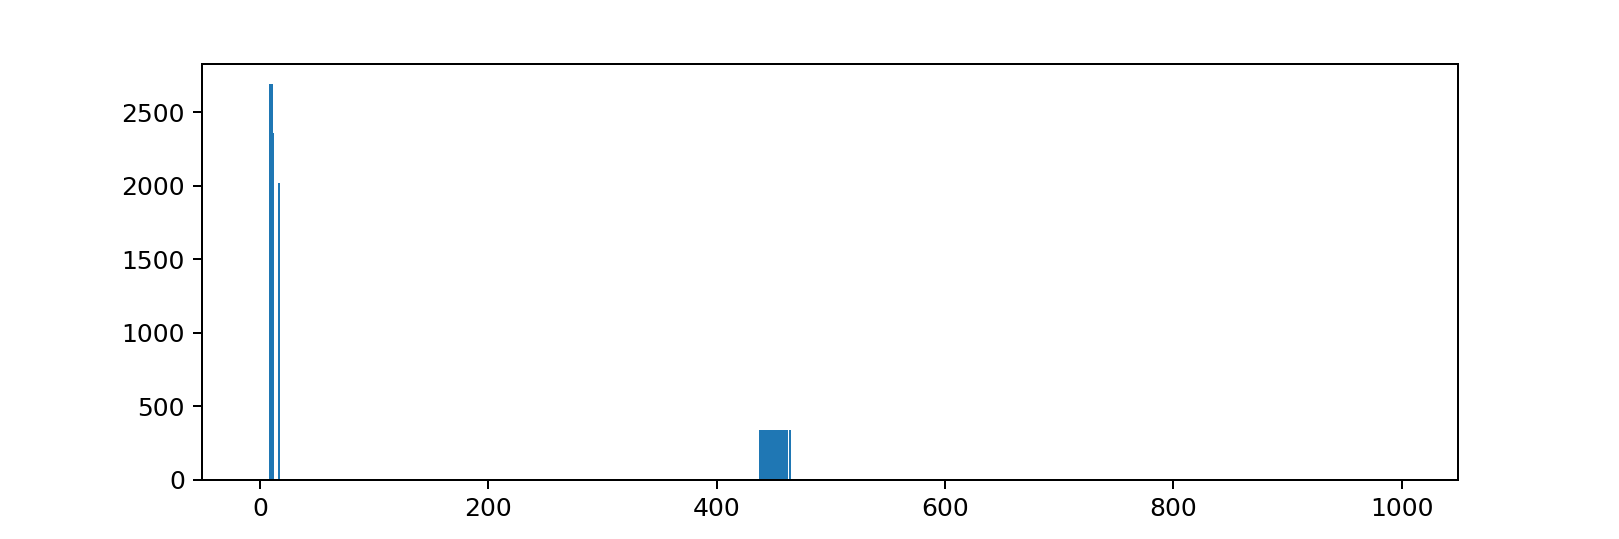

<IPython.core.display.Javascript object>


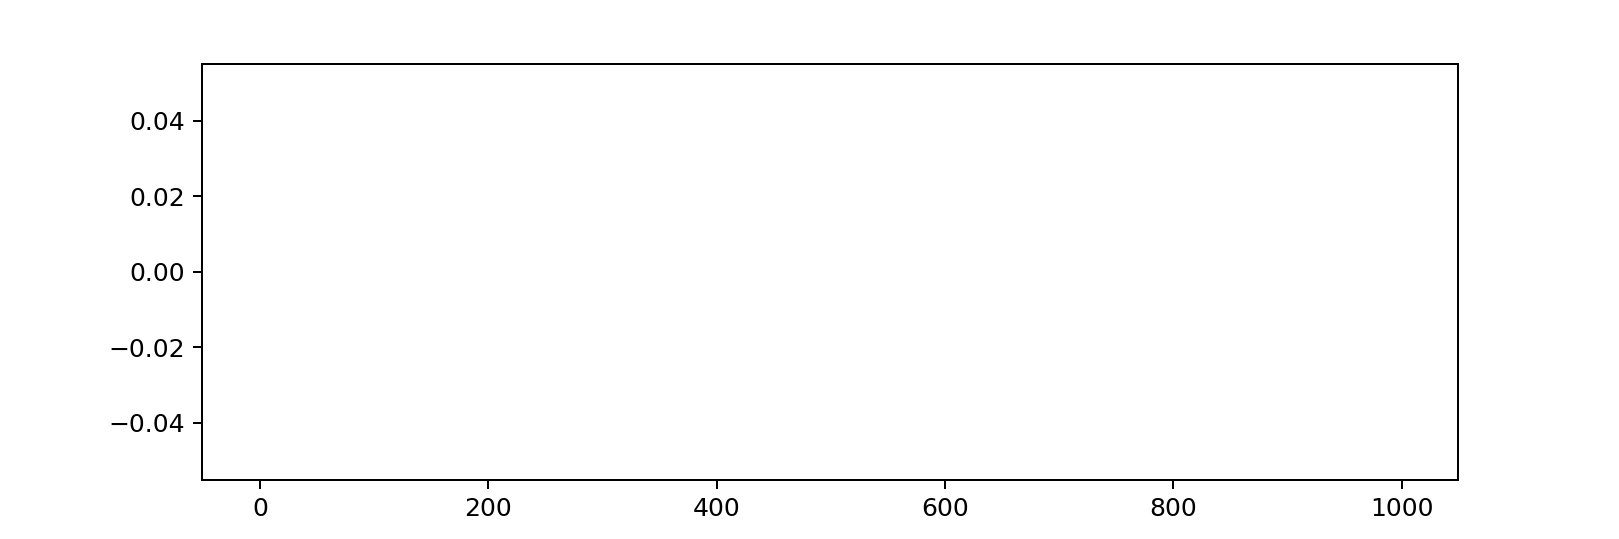

<IPython.core.display.Javascript object>


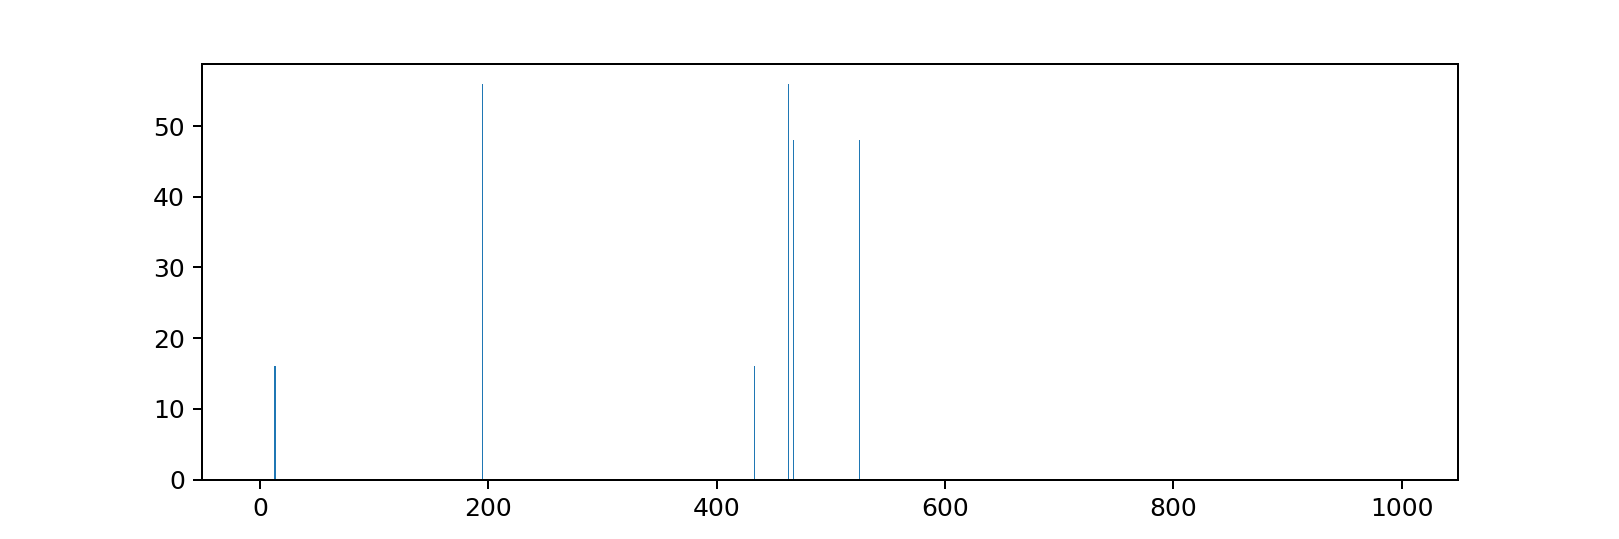

In [38]:
print_hist_for_pattern("22 3921", 7, 0, 1000)
print_hist_for_pattern("25 8331", 7, 0, 1000)
print_hist_for_pattern("27 3622", 7, 0, 1000)

<IPython.core.display.Javascript object>


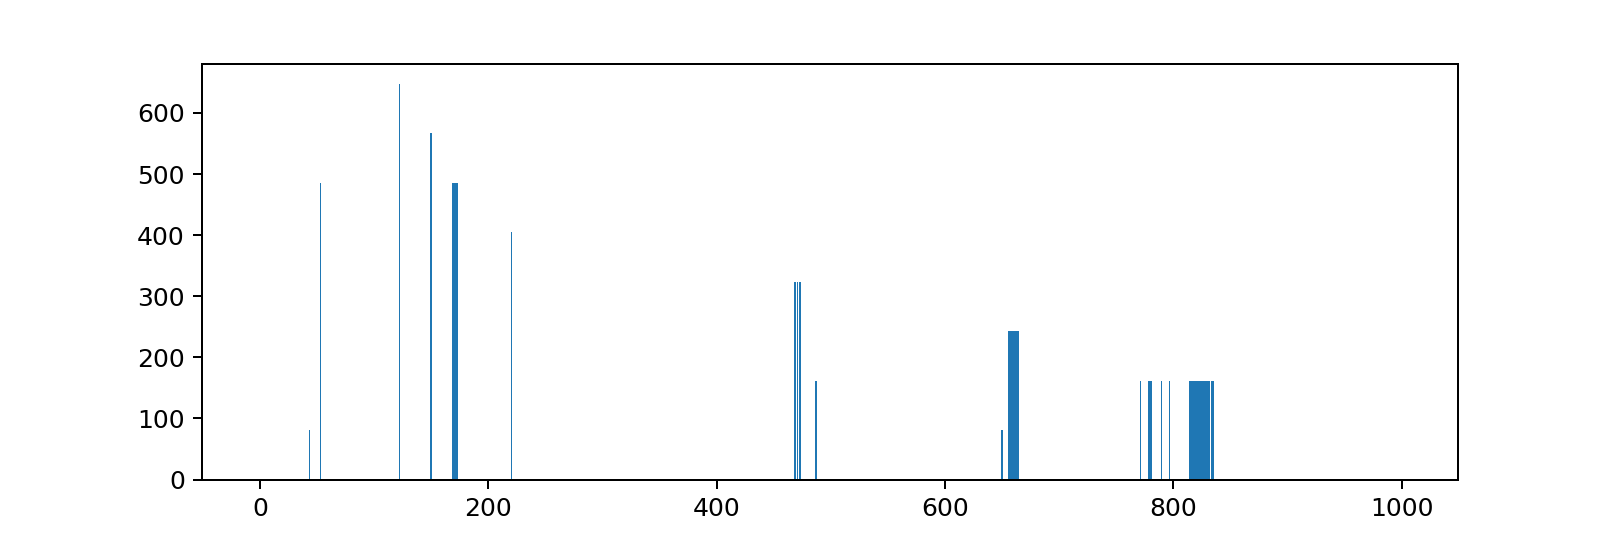

<IPython.core.display.Javascript object>


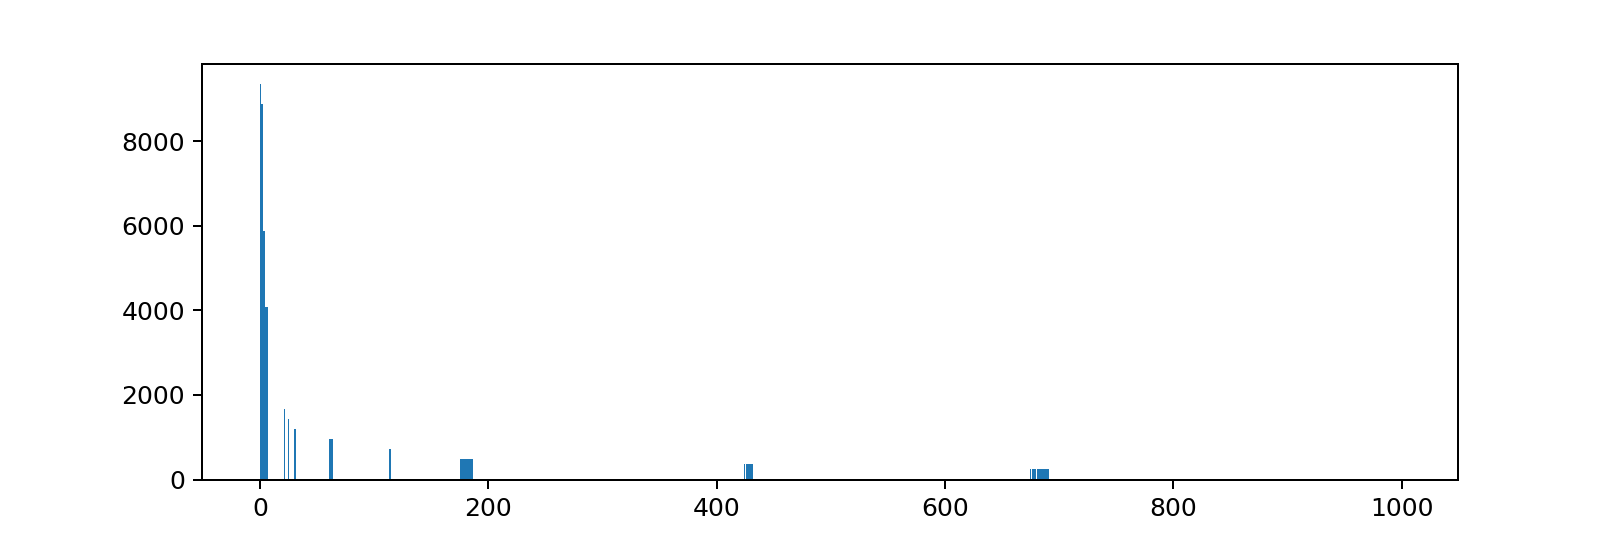

In [18]:
print_hist_for_pattern("9 35", 7, 0, 1000)
print_hist_for_pattern("11 719", 7, 0, 1000)

<IPython.core.display.Javascript object>


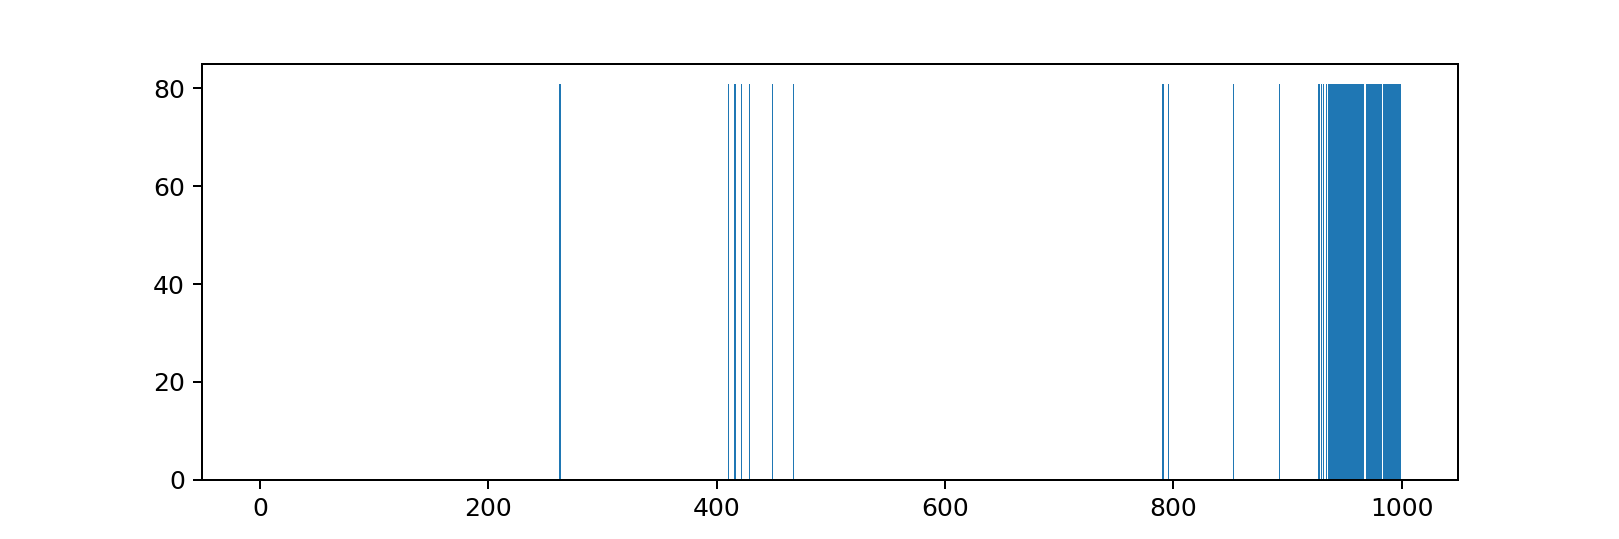

<IPython.core.display.Javascript object>


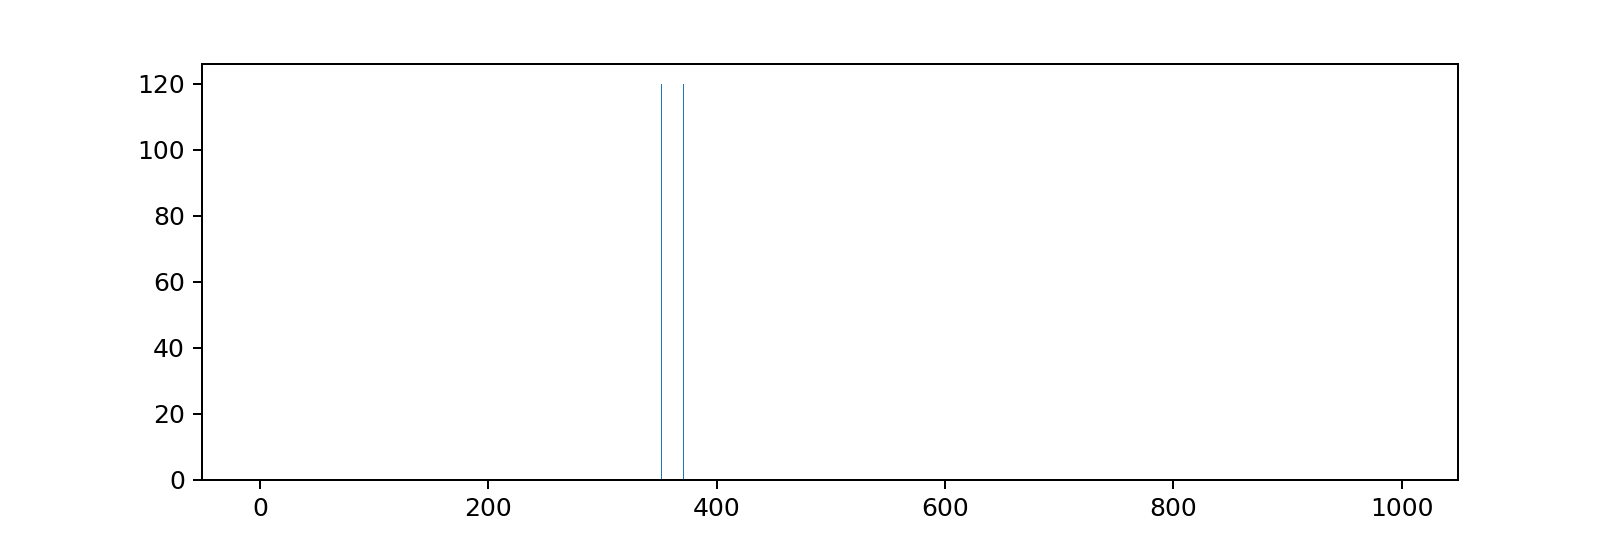

In [19]:
print_hist_for_pattern("9 35", 7, 1000, 2000)
print_hist_for_pattern("11 719", 7, 1000, 2000)

In [25]:
def print_hist_for_edit_script(edit_script, A, B):
    hist_path = RESULTS_FOR_HIST_PATH + "/" + edit_script + "/" + "hist.txt"
    hist_file = open(hist_path, "r")
    hist_data = hist_file.read().split(" ")
    #print(hist_data)
    hist_data = [int(elem) for elem in hist_data if elem != '']
    hist_data = hist_data[A:B]
    show_hist(hist_data)

<IPython.core.display.Javascript object>


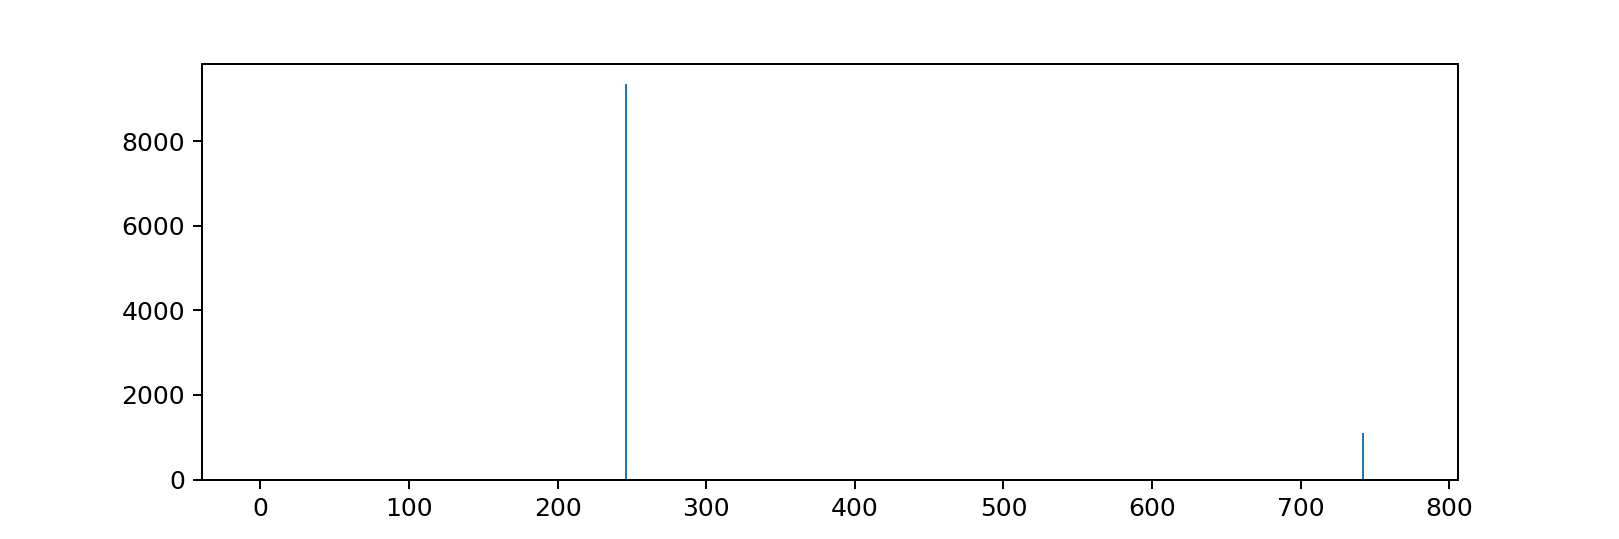

In [24]:
edit_script = "DEL 32@@ DEL 21@@ DEL 42@@ DEL 32@@ DEL 21@@"
print_hist_for_edit_script(edit_script, 0, -1)

<IPython.core.display.Javascript object>


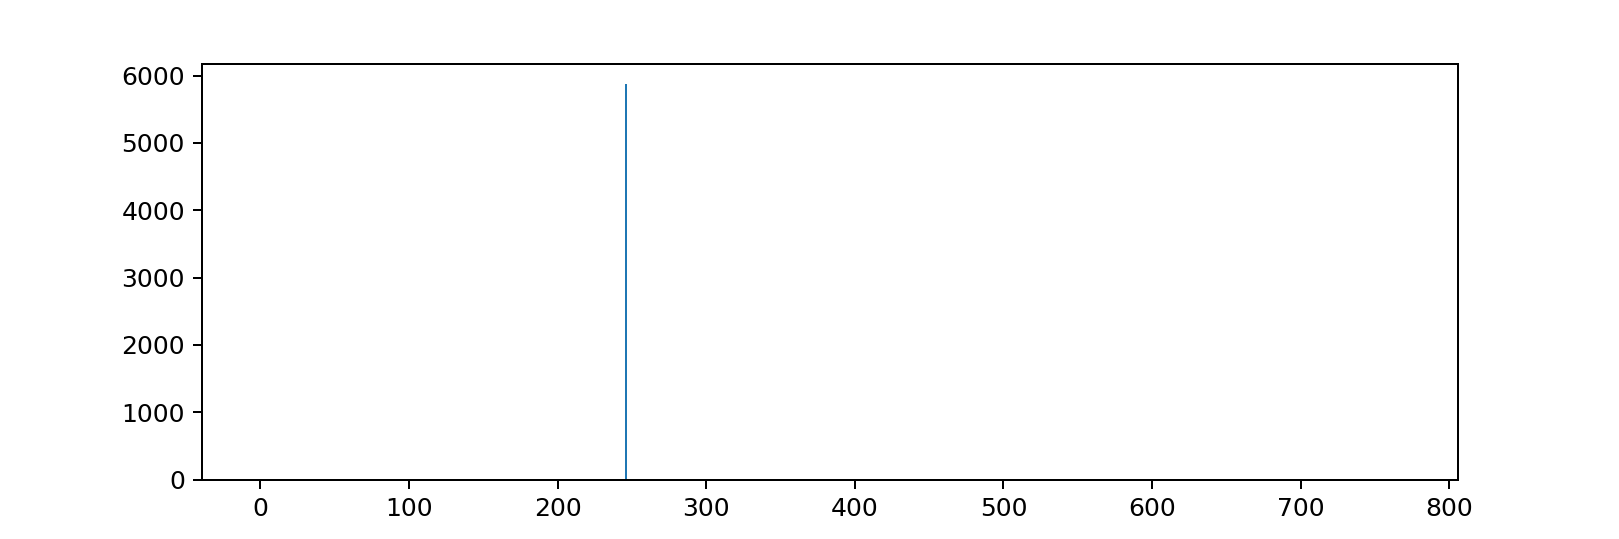

In [25]:
edit_script = "INS 32@@ 32@@ at 0 MOV 42@@ 32@@ at 1 MOV 3@@ 32@@ at 2 MOV 3@@ 32@@ at 3 INS 32@@ 32@@ at 0"
print_hist_for_edit_script(edit_script, 0, -1)

In [ ]:
edit_script = "INS 42@@ 32@@ at 0 INS 42@@ 32@@ at 1 INS 40@@ 32@@ at 2 INS 9@@ 32@@ at 3 MOV 21@@ 8@@ at 0"
print_hist_for_edit_script(edit_script, 0, -1)

In [ ]:
edit_script = "INS 8@@ 25@@ at 1 INS 32@@ 25@@ at 0 INS 8@@ 25@@ at 1 INS 32@@ 25@@ at 0 INS 8@@ 25@@ at 1"
print_hist_for_edit_script(edit_script, 0, -1)

In [ ]:
edit_script = "INS 32@@ 59@@ at 1 INS 42@@ 43@@ at 0 INS 42@@ 59@@ at 0 MOV 32@@ 59@@ at 1 INS 42@@ 32@@ at 0"
print_hist_for_edit_script(edit_script, 0, -1)

<IPython.core.display.Javascript object>


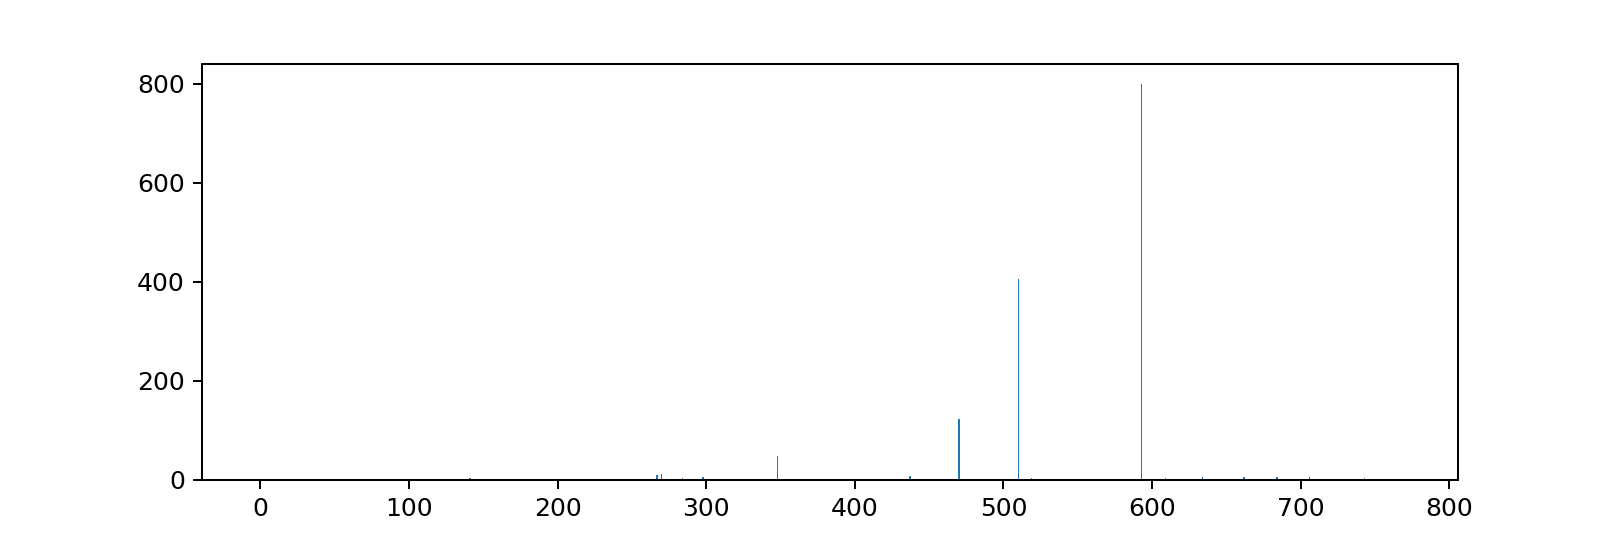

In [29]:
edit_script = "MOV 42@@ 32@@ at 0 UPD 42@@ MOV 42@@ 32@@ at 1 UPD 42@@ MOV 42@@ 32@@ at 2"
print_hist_for_edit_script(edit_script, 0, -1)

      MOV SimpleName@@ to MethodInvocation@@ at 0    
      UPD SimpleName@@ 
      MOV SimpleName@@ to MethodInvocation@@ at 1 
      UPD SimpleName@@ 
      MOV SimpleName@@ to MethodInvocation@@ at 2
#### Patterns:
    141 (4)
    160 (2)
    267 (10)
    270 (11)
    348 (48)
    437 (7)
    470 (123)
    510 (400)
    593 (800)

In [32]:
edit_script = "MOV 42@@ 32@@ at 0 UPD 42@@ MOV 42@@ 32@@ at 1 UPD 42@@ MOV 42@@ 32@@ at 2"
hist_path = RESULTS_FOR_HIST_PATH + "/" + edit_script + "/" + "hist.txt"
hist_file = open(hist_path, "r")
hist_data = hist_file.read().split(" ")
#print(hist_data)
hist_data = [int(elem) for elem in hist_data if elem != '']

hist_data[270]

11

In [ ]:
RESULTS_FOR_HIST_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/result_for_hist_big_data"

<IPython.core.display.Javascript object>


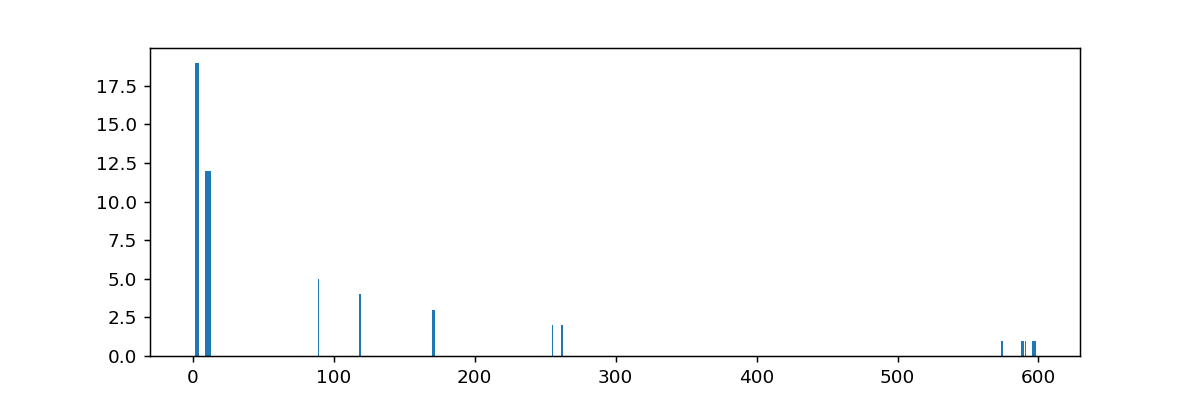

<IPython.core.display.Javascript object>


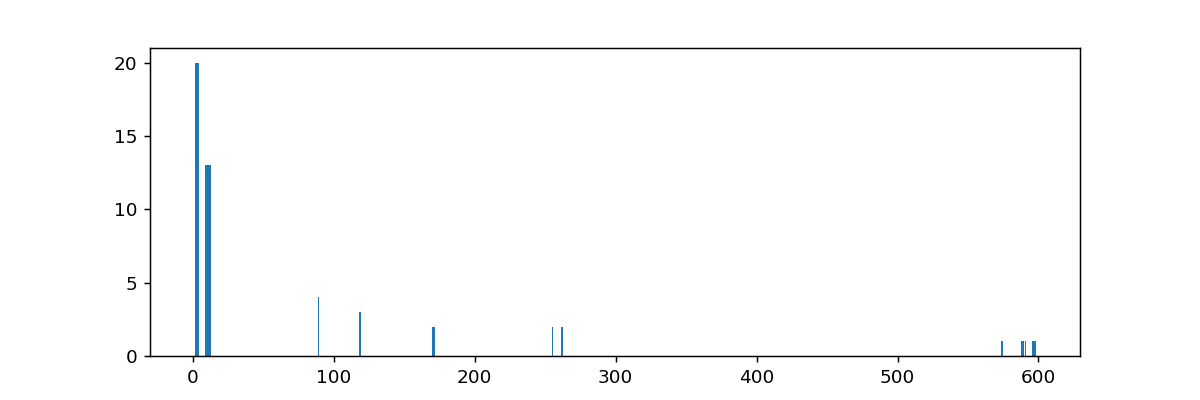

<IPython.core.display.Javascript object>


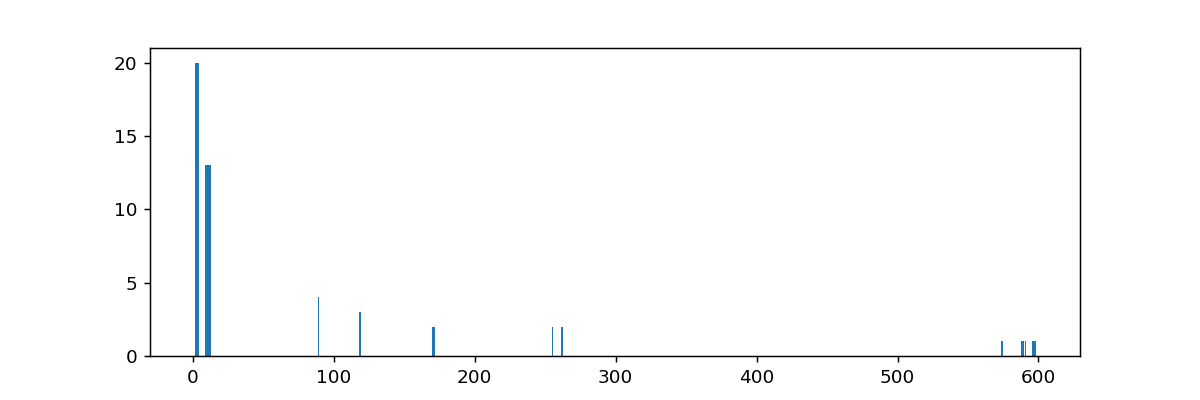

In [200]:
print_hist_for_sample("11 719", "sampleChange1", 5, 0, 600)
print_hist_for_sample("11 719", "sampleChange4", 5, 0, 600)
print_hist_for_sample("11 719", "sampleChange46", 5, 0, 600)

<IPython.core.display.Javascript object>


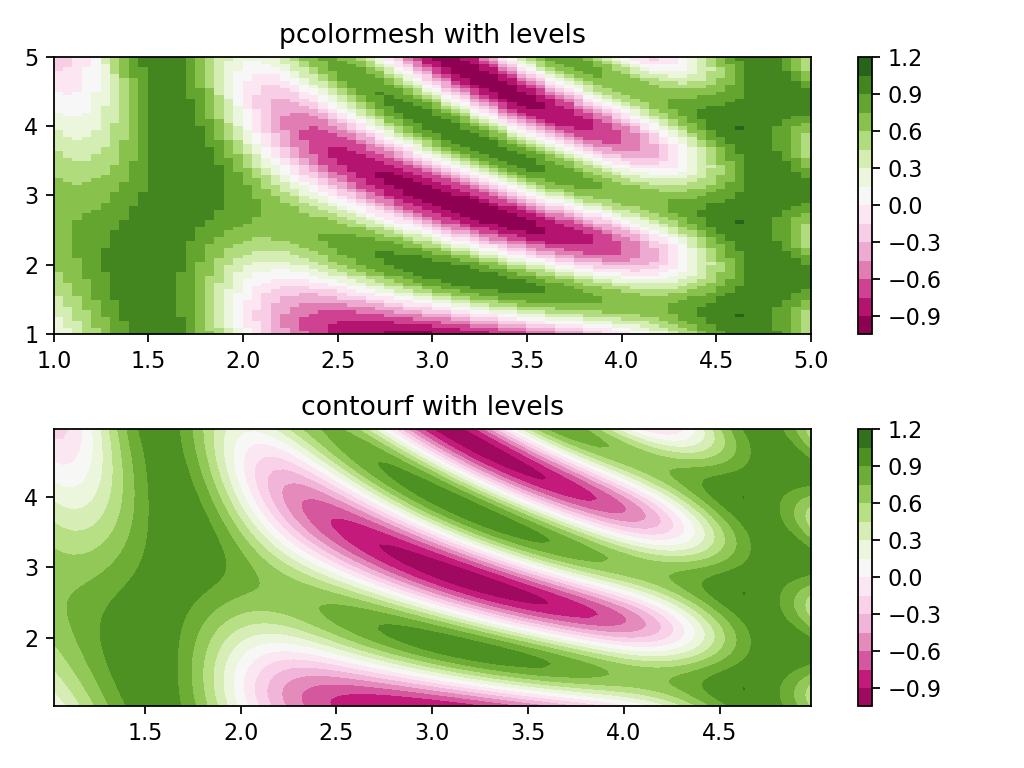

[[ 0.18037951  0.26823017  0.36335424 ...  0.81967616  0.70887839
   0.58107739]
 [ 0.20738012  0.2942647   0.38808212 ...  0.79738125  0.68002396
   0.54664565]
 [ 0.23430727  0.3201529   0.41259223 ...  0.78164078  0.66058997
   0.5247303 ]
 ...
 [-0.17535841 -0.1651069  -0.10633898 ...  0.83935699  0.70681157
   0.55135416]
 [-0.19534556 -0.17962168 -0.11478605 ...  0.81308152  0.67850552
   0.52732772]
 [-0.21439958 -0.19297694 -0.12193009 ...  0.79244172  0.65971059
   0.51699498]]


In [12]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)

print(z)


fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

In [ ]:
# CHECKING PATTERNS WITH DIFFERENT FRAGMENTS

patterns_path = "/Users/aliscafo/Downloads/CPatMiner-master 2/SemanticChangeGraphMiner/output/patterns/repos-hybrid/1"

patterns_dir = os.fsencode(patterns_path)

sorted_size_dirs = [int(os.fsdecode(el)) for el in os.listdir(patterns_dir) if os.fsdecode(el).isnumeric()]
sorted_size_dirs.sort()

final_ok_num = 0
all_patterns = 0

set_of_patterns_with_different_fragments = set()
changes_with_different_fragments = []

for size_dir in sorted_size_dirs:
    size_dir_str = str(size_dir)
    sorted_id_dirs = [int(os.fsdecode(el)) for el in os.listdir(patterns_path + os.sep + size_dir_str) if os.fsdecode(el).isnumeric()]
    sorted_id_dirs.sort()
    
    #if size_dir_str != "41":
    #    continue
        
    num_ids = 0

    for id_dir in sorted_id_dirs:
        path = patterns_path + os.sep + size_dir_str + os.sep + str(id_dir) + os.sep + "details.html"

        #if id_dir > 100:
        #    break
        
        #if num_ids >= 166:
        #    break
        num_ids += 1
        
        if not os.path.exists(path):
            continue

        with open(path, 'r', encoding="latin-1") as file:
            content = file.read()
            
        #freq_ind_start = content.index("<div id='frequency'>Frequency: ") + len("<div id='frequency'>Frequency: ")
        #freq_ind_end = content.index("</div><BR><div id='size'>")
        #freq = int(content[freq_ind_start:freq_ind_end])
        
        last_ind = 0
        
        print(size_dir_str, str(id_dir))
        
        all_patterns += 1
        
        set_of_names = set()
        
        num_change = 0
        
        while True:
            num_change += 1
            
            start = 0
            end = 0
            
            try:
                start = content.index("<div id='method'>", last_ind) + len("<div id='method'>") 
                end = content.index("</div><BR>", start)
            except:
                break
            
            name = content[start:end]
            parts = name.split(',')
            project_name = parts[0]
            nickname = project_name.split('/')[0]
            
            last_ind = end
            
            #if project_name.split('/')[1] in exist:
                #print("exist")
            #    continue
            #exist.add(project_name.split('/')[1])
            
            print(project_name)
            
            if name not in set_of_names:
                set_of_names.add(name)
                changes_with_different_fragments.append((size_dir, id_dir, num_change))
        
        print(len(set_of_names))
        if (len(set_of_names) > 1):
            final_ok_num += 1
            set_of_patterns_with_different_fragments.add((size_dir, id_dir))
            print("OK")
        else:
            changes_with_different_fragments.pop()
            

print(final_ok_num)
print(all_patterns)

In [14]:
print(len(set_of_patterns_with_different_fragments))

7300


In [ ]:
import os
from tqdm import tqdm_notebook

#RESULTS_FOR_HIST_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/result_for_hist_big_data"
RESULTS_FOR_HIST_PATH = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50"

results_for_hist_dir = os.fsencode(RESULTS_FOR_HIST_PATH)
patterns = [os.fsdecode(el) for el in os.listdir(results_for_hist_dir) 
               if os.path.isdir(RESULTS_FOR_HIST_PATH + "/" + os.fsdecode(el)) and len(os.fsdecode(el)) < 10]
patterns = [(int(el.split(' ')[0]), int(el.split(' ')[1])) for el in patterns]
patterns.sort()

changes_names = []
patterns_with_max_change = []

for el in tqdm_notebook(patterns):
    size, id = el[0], el[1]
    
    if (size, id) not in set_of_patterns_with_different_fragments:
        continue
    
    path_to_pattern = RESULTS_FOR_HIST_PATH + "/" + str(size) + " " + str(id) + "/5gram"
    files = [int(os.fsdecode(el)[12:-9]) for el in os.listdir(path_to_pattern) if os.fsdecode(el).startswith("sampleChange")]
    files.sort()
    
    for file in files:
        changes_names.append((size, id, file))
    patterns_with_max_change.append((size, id, files[-1]))
                        
print(changes_names)

In [ ]:
# FOR 3-GRAM!!!!!!!!
# TODO: Rewrite as a function

'''
import os
from tqdm import tqdm_notebook

#RESULTS_FOR_HIST_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/result_for_hist_big_data"
RESULTS_FOR_HIST_PATH = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50-3gram"

results_for_hist_dir = os.fsencode(RESULTS_FOR_HIST_PATH)
patterns = [os.fsdecode(el) for el in os.listdir(results_for_hist_dir) 
               if os.path.isdir(RESULTS_FOR_HIST_PATH + "/" + os.fsdecode(el)) and len(os.fsdecode(el)) < 10]
patterns = [(int(el.split(' ')[0]), int(el.split(' ')[1])) for el in patterns]
patterns.sort()

changes_names = []
patterns_with_max_change = []

for el in tqdm_notebook(patterns):
    size, id = el[0], el[1]
    
    if (size, id) not in set_of_patterns_with_different_fragments:
        continue
    
    path_to_pattern = RESULTS_FOR_HIST_PATH + "/" + str(size) + " " + str(id) + "/5gram"
    files = [int(os.fsdecode(el)[12:-9]) for el in os.listdir(path_to_pattern) if os.fsdecode(el).startswith("sampleChange")]
    files.sort()
    
    for file in files:
        changes_names.append((size, id, file))
    patterns_with_max_change.append((size, id, files[-1]))
                        
print(changes_names)
'''

In [16]:
print(len(patterns_with_max_change))
print(len(changes_names))
print(len(changes_with_different_fragments))
real_read_changes_with_different_fragments = [el for el in changes_names if el in changes_with_different_fragments]
print(len(real_read_changes_with_different_fragments))

6363
38734
30210
22833


In [17]:
import collections

pattern_to_remained_num = collections.defaultdict(int)
for el in real_read_changes_with_different_fragments:
    pattern_to_remained_num[(el[0], el[1])] += 1
    
# read changes with different fragments which was filtered so that length of patterns is more than 1
real_changes = [el for el in real_read_changes_with_different_fragments
                if pattern_to_remained_num[(el[0], el[1])] > 1]

In [18]:
print(len(real_changes))

22405


In [19]:
#print(pattern_to_remained_num)
sorted_dict = {k: v for k, v in sorted(pattern_to_remained_num.items(), key=lambda item: item[1], reverse=True)}
print(list(sorted_dict.items())[:20])

[((9, 6293), 87), ((5, 5396), 85), ((4, 1645), 78), ((6, 3264), 69), ((8, 2266), 69), ((6, 14981), 53), ((5, 2013), 48), ((8, 1486), 48), ((10, 3256), 48), ((7, 10354), 39), ((10, 11483), 38), ((6, 14540), 34), ((5, 4912), 33), ((5, 6537), 33), ((6, 628), 32), ((3, 6789), 30), ((6, 4703), 30), ((8, 8667), 30), ((4, 8462), 26), ((4, 13964), 26)]


In [20]:
tops = list(sorted_dict.items())[:20]
print(tops)
selected_patterns = [el[0] for el in tops]
#selected_patterns

[((9, 6293), 87), ((5, 5396), 85), ((4, 1645), 78), ((6, 3264), 69), ((8, 2266), 69), ((6, 14981), 53), ((5, 2013), 48), ((8, 1486), 48), ((10, 3256), 48), ((7, 10354), 39), ((10, 11483), 38), ((6, 14540), 34), ((5, 4912), 33), ((5, 6537), 33), ((6, 628), 32), ((3, 6789), 30), ((6, 4703), 30), ((8, 8667), 30), ((4, 8462), 26), ((4, 13964), 26)]


In [21]:
#some_patterns_with_max_change = patterns_with_max_change[2100:2110]
#some_patterns = [(el[0], el[1]) for el in some_patterns_with_max_change]
#print(some_patterns[0], some_patterns[-1])

In [22]:
some_patterns = selected_patterns

some_changes = [el for el in real_changes if (el[0], el[1]) in some_patterns and
                (el[0], el[1]) != (14, 1319)]
print(len(some_changes))

936


In [ ]:
print("\n".join([str(elem) for elem in some_changes]))

In [24]:
hist_len_5gram = None

RESULTS_FOR_HIST_PATH = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50"
es_path = RESULTS_FOR_HIST_PATH + "/" + "edit_scripts_5grams_mapped.txt"
es_file = open(es_path, "r")
es_lines = es_file.read().split("\n")
hist_len_5gram = int(es_lines[-2].split(" ")[0][:-1]) + 1
es_file.close()

print(hist_len_5gram)

267762


In [25]:
hist_len_3gram = None

RESULTS_FOR_HIST_PATH = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50-3gram"
es_path = RESULTS_FOR_HIST_PATH + "/" + "edit_scripts_3grams_mapped.txt"
es_file = open(es_path, "r")
es_lines = es_file.read().split("\n")
hist_len_3gram = int(es_lines[-2].split(" ")[0][:-1]) + 1
es_file.close()

print(hist_len_3gram)

116270


In [24]:
# Previous way to get (read) hists

'''
from tqdm import tqdm_notebook
RESULTS_FOR_HIST_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/result_for_hist_big_data"

hists = []

for i in tqdm_notebook(some_changes):
    size1, id1, file1 = i[0], i[1], i[2]
    hist_path1 = RESULTS_FOR_HIST_PATH + "/" + str(size1) + " " + str(id1) + "/5gram/sampleChange" + str(file1) + "_hist.txt"
    hist_file1 = open(hist_path1, "r")
    hist_data1 = hist_file1.read().split(" ")
    hist_data1 = [(i, int(elem)) for i, elem in enumerate(hist_data1) if elem != '' and int(elem) != 0]
    # hist_data1 = [int(elem) for elem in hist_data1 if elem != '']
    hists.append(hist_data1)
    #print(len(hist_data1))
'''

In [26]:
from tqdm import tqdm_notebook
#RESULTS_FOR_HIST_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/result_for_hist_big_data"
RESULTS_FOR_HIST_PATH = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50"

hists = []

for i in tqdm_notebook(some_changes):
    size1, id1, file1 = i[0], i[1], i[2]
    hist_path1 = RESULTS_FOR_HIST_PATH + "/" + str(size1) + " " + str(id1) + "/5gram/sampleChange" + str(file1) + "_hist.txt"
    hist_file1 = open(hist_path1, "r")
    lines = hist_file1.read().split("\n")
    hist_data1 = [(int(line.split(" ")[0]), int(line.split(" ")[1])) for line in lines if line != '']
    #hist_data1 = [(i, int(elem)) for i, elem in enumerate(hist_data1) if elem != '' and int(elem) != 0]
    hists.append(hist_data1)
    hist_file1.close()
    
    # Checking example
    if len(hists) == 5:
        print(size1, id1, file1)
        print(hist_data1)

3 6789 7
[(44421, 1), (61056, 1), (61989, 1), (113224, 1)]



In [27]:
# Getting 3-gram

from tqdm import tqdm_notebook
#RESULTS_FOR_HIST_PATH = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/result_for_hist_big_data"
RESULTS_FOR_HIST_PATH = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50-3gram"

hists_3gram = []

for i in tqdm_notebook(some_changes):
    size1, id1, file1 = i[0], i[1], i[2]
    hist_path1 = RESULTS_FOR_HIST_PATH + "/" + str(size1) + " " + str(id1) + "/3gram/sampleChange" + str(file1) + "_hist.txt"
    hist_file1 = open(hist_path1, "r")
    lines = hist_file1.read().split("\n")
    hist_data1 = [(int(line.split(" ")[0]), int(line.split(" ")[1])) for line in lines if line != '']
    #hist_data1 = [(i, int(elem)) for i, elem in enumerate(hist_data1) if elem != '' and int(elem) != 0]
    hists_3gram.append(hist_data1)
    hist_file1.close()
    
    # Checking example
    if len(hists_3gram) == 5:
        print(size1, id1, file1)
        print(hist_data1)

3 6789 7
[(3726, 1), (11761, 1), (26857, 1), (34659, 1), (40354, 1), (56665, 1)]



In [28]:
# The same code, but a function for this:

RESULTS_FOR_HIST_PATH_5GRAM = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50"
RESULTS_FOR_HIST_PATH_3GRAM = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50-3gram"
RESULTS_FOR_HIST_PATH_4GRAM = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50-4gram"
RESULTS_FOR_HIST_PATH_2GRAM = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50-2gram"
RESULTS_FOR_HIST_PATH_1GRAM = "/Volumes/Seagate/Alina/result_for_hist_all_data3-50-1gram"

from tqdm import tqdm_notebook

def get_hists(some_changes, hists_path, gram_path):

    hists = []

    for i in tqdm_notebook(some_changes):
        size1, id1, file1 = i[0], i[1], i[2]
        hist_path1 = hists_path + "/" + str(size1) + " " + str(id1) + "/" + gram_path + "/sampleChange" + str(file1) + "_hist.txt"
        hist_file1 = open(hist_path1, "r")
        lines = hist_file1.read().split("\n")
        hist_data1 = [(int(line.split(" ")[0]), int(line.split(" ")[1])) for line in lines if line != '']
        hists.append(hist_data1)
        hist_file1.close()

        # Checking example
        #if len(hists) == 5:
        #    print(size1, id1, file1)
        #    print(hist_data1)
        
    return hists

In [29]:
hists_4gram = get_hists(some_changes, hists_path=RESULTS_FOR_HIST_PATH_4GRAM, gram_path="4gram")

In [30]:
hist_len_4gram = None

RESULTS_FOR_HIST_PATH = RESULTS_FOR_HIST_PATH_4GRAM
es_path = RESULTS_FOR_HIST_PATH + "/" + "edit_scripts_4grams_mapped.txt"
es_file = open(es_path, "r")
es_lines = es_file.read().split("\n")
hist_len_4gram = int(es_lines[-2].split(" ")[0][:-1]) + 1
es_file.close()

print(hist_len_4gram)

197808


In [31]:
hist_len_2gram = None

RESULTS_FOR_HIST_PATH = RESULTS_FOR_HIST_PATH_2GRAM
es_path = RESULTS_FOR_HIST_PATH + "/" + "edit_scripts_2grams_mapped.txt"
es_file = open(es_path, "r")
es_lines = es_file.read().split("\n")
hist_len_2gram = int(es_lines[-2].split(" ")[0][:-1]) + 1
es_file.close()

print(hist_len_2gram)

42193


In [32]:
hist_len_1gram = None

RESULTS_FOR_HIST_PATH = RESULTS_FOR_HIST_PATH_1GRAM
es_path = RESULTS_FOR_HIST_PATH + "/" + "edit_scripts_1grams_mapped.txt"
es_file = open(es_path, "r")
es_lines = es_file.read().split("\n")
hist_len_1gram = int(es_lines[-2].split(" ")[0][:-1]) + 1
es_file.close()

print(hist_len_1gram)

3129


In [178]:
# Just counting a histogram length (old way)

'''
hist_path1 = RESULTS_FOR_HIST_PATH + "/" + str(19) + " " + str(13424) + "/5gram/sampleChange" + str(25) + "_hist.txt"
hist_file1 = open(hist_path1, "r")
hist_data1 = hist_file1.read().split(" ")
hist_data1 = [(i, int(elem)) for i, elem in enumerate(hist_data1) if elem != '']
len(hist_data1)
'''

169102

In [33]:
print(len(hists[0]))

3


In [34]:
# NEW IMPLEMENTATION

import math

def get_intersections(hist1, hist2):
    len1 = len(hist1)
    len2 = len(hist2)
    intersections = []
    i = 0
    j = 0

    while i < len1 and j < len2:
        if hist1[i][0] < hist2[j][0]:
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            intersections.append((hist1[i][0], hist1[i][1], hist2[j][1]))
            i += 1
            j += 1
        elif hist1[i][0] > hist2[j][0]:
            j += 1
            
    return intersections

def get_union_inds(hist1, hist2):
    len1 = len(hist1)
    len2 = len(hist2)
    union = []
    i = 0
    j = 0

    while i < len1 or j < len2:
        if i >= len1:
            union.append(hist2[j][0])
            j += 1
        elif j >= len2:
            union.append(hist1[i][0])
            i += 1
        elif hist1[i][0] < hist2[j][0]:
            union.append(hist1[i][0])
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            union.append(hist1[i][0])
            i += 1
            j += 1
        elif hist1[i][0] > hist2[j][0]:
            union.append(hist2[j][0])
            j += 1
            
    return union


def jaccard_metric(hist1, hist2, hist_len=None):
    intersections = get_intersections(hist1, hist2)

    metric = 0

    for ind, v1, v2 in intersections:
        mx = max(v1, v2)
        mn = min(v1, v2)
        metric += mn / mx

    len_intersections = len(intersections)

    if (len_intersections != 0):
        metric = metric / len(intersections)
    else:
        metric = 0

    return 1 - metric

def canberra_metric(hist1, hist2, hist_len=None):
    metric = 0
    i = 0
    j = 0
    n = len(hist1)
    m = len(hist2)
    
    while i < n or j < m:
        if i >= n:
            metric += abs(hist2[j][1]) / abs(hist2[j][1]) # 1
            j += 1
        elif j >= m:
            metric += abs(hist1[i][1]) / abs(hist1[i][1]) # 1
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            metric += abs(hist1[i][1] - hist2[j][1]) / (abs(hist1[i][1]) + abs(hist2[j][1]))
            i += 1
            j += 1
        elif hist1[i][0] < hist2[j][0]:
            metric += abs(hist1[i][1]) / abs(hist1[i][1]) # 1
            i += 1
        elif hist1[i][0] > hist2[j][0]:
            metric += abs(hist2[j][1]) / abs(hist2[j][1]) # 1
            j += 1
            
    union_len = len(get_union_inds(hist1, hist2))
    if union_len == 0:
        return 1
    
    return metric / union_len

def pearsons_correlation(hist1, hist2, hist_len):
    hist_len = hist_len_3gram
    union_len = len(get_union_inds(hist1, hist2))
    
    top = 0
    left = 0
    right = 0
    
    n = len(hist1)
    m = len(hist2)
    
    i = 0
    j = 0
    
    while i < n or j < m:
        if i >= n:
            top += (- 1/hist_len) * (hist2[j][1] - 1/hist_len)
            left += (- 1/hist_len) ** 2
            right += (hist2[j][1] - 1/hist_len) ** 2
            j += 1
        elif j >= m:
            top += (hist1[i][1] - 1/hist_len) * (- 1/hist_len)
            left += (hist1[i][1] - 1/hist_len)  ** 2
            right += (- 1/hist_len) ** 2
            i += 1
        elif hist1[i][0] == hist2[j][0]:
            top += (hist1[i][1] - 1/hist_len) * (hist2[j][1] - 1/hist_len)
            left += (hist1[i][1] - 1/hist_len)  ** 2
            right += (hist2[j][1] - 1/hist_len) ** 2
            i += 1
            j += 1
        elif hist1[i][0] < hist2[j][0]:
            top += (hist1[i][1] - 1/hist_len) * (- 1/hist_len)
            left += (hist1[i][1] - 1/hist_len)  ** 2
            right += (- 1/hist_len) ** 2
            i += 1
        elif hist1[i][0] > hist2[j][0]:
            top += (- 1/hist_len) * (hist2[j][1] - 1/hist_len)
            left += (- 1/hist_len) ** 2
            right += (hist2[j][1] - 1/hist_len) ** 2
            j += 1

    bottom = math.sqrt(left * right)
    return 1 - top / bottom
    

def get_dists(hists, dist_metric, hist_len):
    dists = []

    hist_len = len(hists[0])

    for hist1 in tqdm_notebook(hists):
        cur_dists = []

        for hist2 in hists:
            distance = dist_metric(hist1, hist2, hist_len)
            
            cur_dists.append(distance)

        dists.append(cur_dists)
        
    return dists

In [35]:
canberra_metric([(1, 2), (3, 4), (5, 7)], [(1, 2), (2, 100), (3, 4)])

0.5

In [90]:
print(hists[5])
print(hists[8])

[(6714, 1), (15315, 1), (15452, 1), (20095, 1), (44131, 1)]
[(59, 1), (2931, 1), (6714, 1)]


In [50]:
print(canberra_metric(hists[5], hists[8]))
print(canberra_metric(hists[5], hists[400]))

0.8571428571428571
1.0


In [39]:
#for row in dists:
#    print(row)

#dists_for_tops = get_dists(hists)

In [52]:
import sklearn.cluster

# 'auto', ‘ball_tree’, ‘kd_tree’, ‘brute’

#clustering = sklearn.cluster.DBSCAN(eps=0.9, min_samples=2).fit(dists)
#print(clustering.labels_)

In [ ]:
(10, 13553, 1)
(10, 13553, 2)
(10, 13553, 3)

(10, 13714, 1)
(10, 13714, 2)
(10, 13714, 3)

(10, 13751, 1)
(10, 13751, 2)
(10, 13751, 3)

(10, 13987, 1)
(10, 13987, 2)

(10, 14021, 1)
(10, 14021, 2)

(10, 14030, 1)
(10, 14030, 2)
(10, 14030, 3)

(10, 14076, 1)
(10, 14076, 2)

(10, 14084, 1)
(10, 14084, 2)
(10, 14084, 3)

(10, 14189, 1)
(10, 14189, 2)
(10, 14189, 3)
(10, 14189, 4)
(10, 14189, 5)

(10, 14204, 1)
(10, 14204, 3)

In [41]:
# Clustering was moved down

#dists_for_tops = get_dists(hists)
#clustering = sklearn.cluster.DBSCAN(eps=0.9, min_samples=2).fit(dists_for_tops)
#print(clustering.labels_)

In [234]:
# OLD IMPLEMENTATION

'''
metrics = []

hist_len = len(hists[0])

for hist1 in tqdm_notebook(hists):
    cur_metrics = []
    
    for hist2 in hists:
        metric = 0
        
        for ind in range(hist_len):
            mx = max(hist1[ind], hist2[ind])
            if mx == 0:
                continue
            mn = min(hist1[ind], hist2[ind])
            metric += mn / mx
            
        cur_metrics.append(metric)
        
    metrics.append(cur_metrics)
'''

In [ ]:
'''for i in tqdm_notebook(some_changes):
    size1, id1, file1 = i[0], i[1], i[2]
    hist_path1 = RESULTS_FOR_HIST_PATH + "/" + str(size1) + " " + str(id1) + "/5gram/sampleChange" + str(file1) + "_hist.txt"
    hist_file1 = open(hist_path1, "r")
    hist_data1 = hist_file1.read().split(" ")
    hist_data1 = [int(elem) for elem in hist_data1 if elem != '']
    print(len(hist_data1))
    
    cur_metrics = []
        
    for j in tqdm_notebook(some_changes):
        size2, id2, file2 = j[0], j[1], j[2]
        
        hist_path2 = RESULTS_FOR_HIST_PATH + "/" + str(size2) + " " + str(id2) + "/5gram/sampleChange" + str(file2) + "_hist.txt"
        hist_file2 = open(hist_path2, "r")
        hist_data2 = hist_file2.read().split(" ")
        hist_data2 = [int(elem) for elem in hist_data2 if elem != '']
'''

In [25]:
ID = 11

def save_metrics(id_, metrics):
    PATH_FOR_METRICS = "/Users/aliscafo/Documents/ALINA/WORK/SPbAU/thesis/calculated_metrics"
    #os.makedirs(PATH_FOR_METRICS)

    path_to_dir = PATH_FOR_METRICS + "/" + "changes_" + str(id_)
    os.makedirs(path_to_dir)

    changes_file = open(path_to_dir + "/" + "changes", "w")
    num = 0
    for i in some_changes:
        changes_file.write(str(num) + ") " + str(i) + "\n")
        num += 1
    changes_file.close()

    metrics_file = open(path_to_dir + "/" + "dists", "w")
    for i in metrics:
        for j in i:
            metrics_file.write(str(j) + " ")
        metrics_file.write("\n")
    metrics_file.close()
    
save_metrics(ID, dists_for_tops)

NameError: name 'dists_for_tops' is not defined

In [36]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

flatten = lambda l: [item for sublist in l for item in sublist]


def drawhist2(some_changes, metrics, lines=False, lw=0.1):
    # make these smaller to increase the resolution
    dx, dy = 1, 1

    # generate 2 2d grids for the x & y bounds
    y, x = np.mgrid[slice(0, len(some_changes)+1, dy),
                    slice(0, len(some_changes)+1, dx)]

    #z = 10 * (np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x))
    z = np.array(metrics)
    
    #print(y.shape)
    #print(x.shape)
    #print(z.shape)

    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    #z = z[:-1, :-1]
    flatten_z = z.flatten()
    levels = MaxNLocator(nbins=15).tick_values(flatten_z.min(), flatten_z.max())


    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('PiYG')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    fig, ax0 = plt.subplots(nrows=1, figsize=(8, 6))

    im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm, zorder=-1)


    fig.colorbar(im, ax=ax0)
    ax0.set_title('pcolormesh with levels')


    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    
    EPS = 0.00
    
    if (lines):
        i = 0
        n = len(some_changes)
        common_sum = 0

        while (i < n):
            j = i
            while j < n and (some_changes[i][0], some_changes[i][1]) == (some_changes[j][0], some_changes[j][1]):
                j += 1
            common_sum += (j - i)
            ax0.axvline(x=common_sum - EPS, lw=lw, c='black', zorder=15)
            ax0.axhline(y=common_sum, lw=lw, c='black', zorder=15)
            i = j
        
    #print(common_sum)
    
    plt.ylim((0, n))
    plt.xlim((0, n))
    
    plt.show()

In [37]:
# Just testing before drawing lines

some_changes_nums = []

i = 0
n = len(some_changes)
common_sum = 0

while (i < n):
    j = i
    while j < n and (some_changes[i][0], some_changes[i][1]) == (some_changes[j][0], some_changes[j][1]):
        j += 1
    common_sum += (j - i)
    some_changes_nums.append(((some_changes[i][0], some_changes[i][1]), j - i, i))
    i = j

<IPython.core.display.Javascript object>


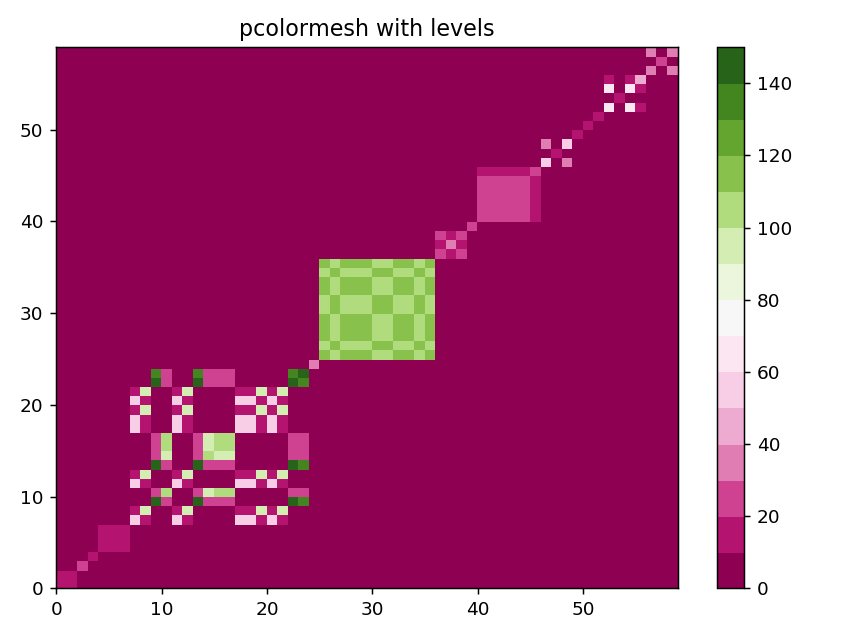

In [188]:
drawhist2(some_changes, metrics)

<IPython.core.display.Javascript object>


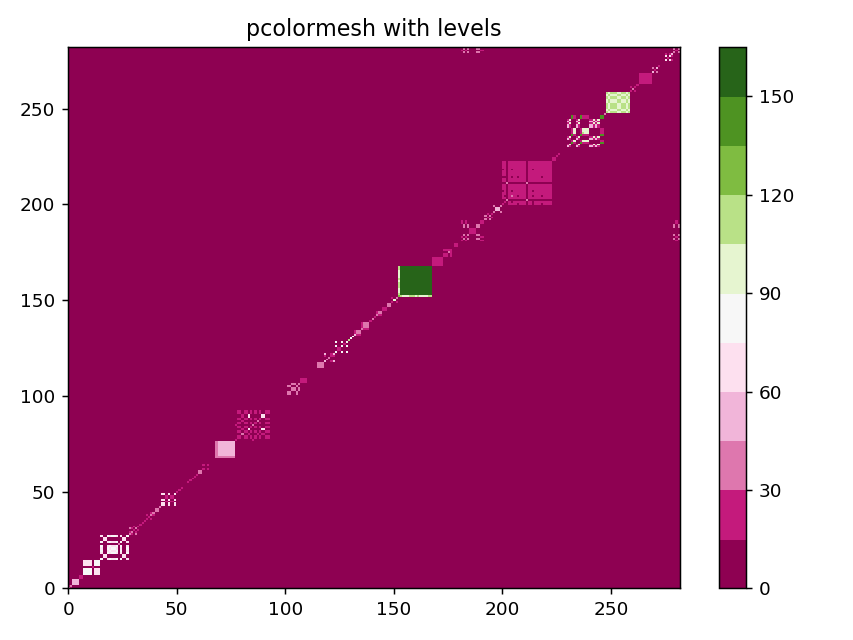

In [197]:
drawhist2(some_changes, metrics)

<IPython.core.display.Javascript object>


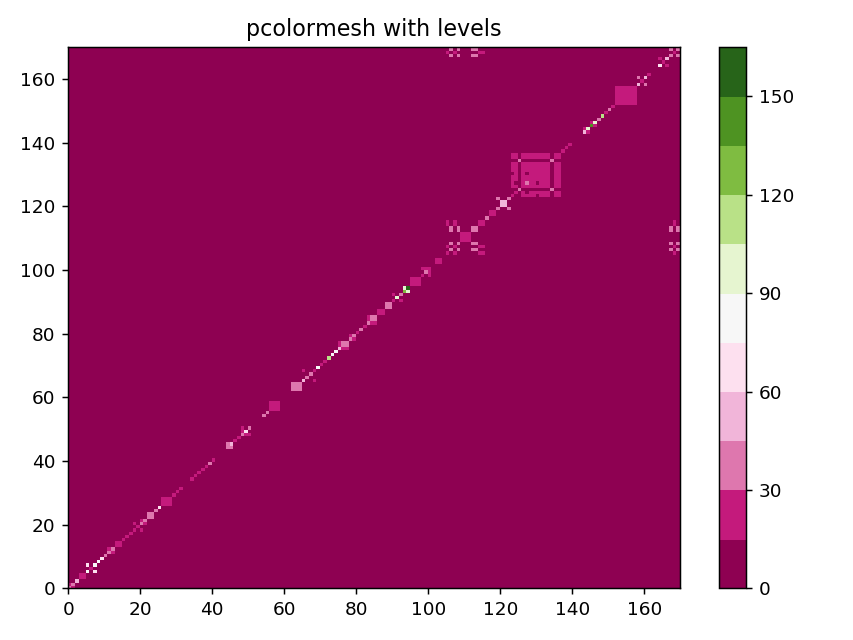

In [216]:
drawhist2(some_changes, metrics) # 50 patterns with different fragments

<IPython.core.display.Javascript object>


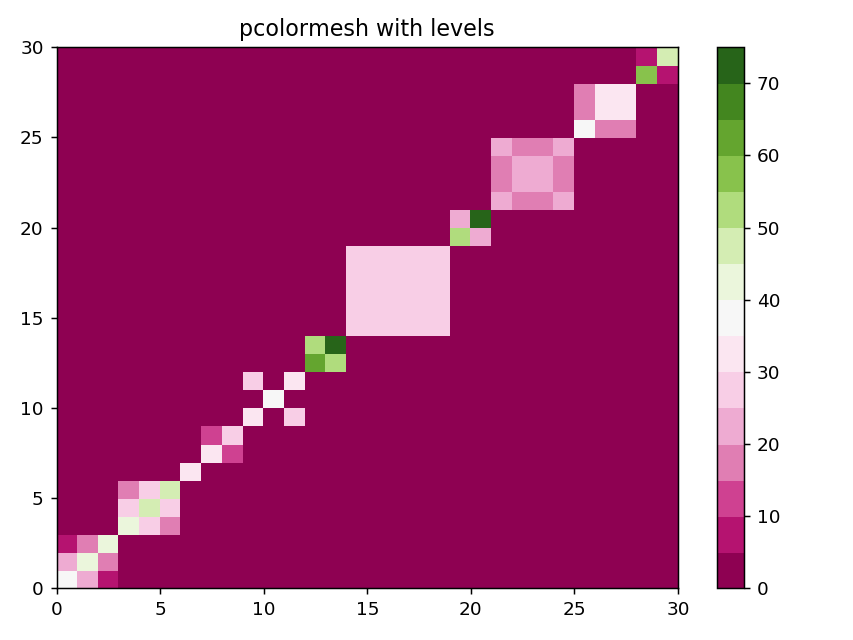

In [223]:
drawhist2(some_changes, metrics) # 10 patterns with different fragments

In [225]:
(19, 4767, 1)
(19, 4767, 2)
(19, 4767, 3)

(19, 4834, 1)
(19, 4834, 2)
(19, 4834, 3)

(19, 4968, 1)
(19, 4968, 2)
(19, 4968, 3)
(19, 4974, 1)
(19, 4974, 2)
(19, 4974, 5)
(19, 5234, 1)
(19, 5234, 2)
(19, 6167, 1)
(19, 6167, 2)
(19, 6167, 3)
(19, 6167, 4)
(19, 6167, 5)
(19, 6479, 1)
(19, 6479, 3)
(19, 6480, 1)
(19, 6480, 2)
(19, 6480, 3)
(19, 6480, 4)
(19, 6657, 1)
(19, 6657, 2)
(19, 6657, 4)
(19, 7314, 1)
(19, 7314, 2)
(19, 7314, 4)

(19, 7314, 4)

<IPython.core.display.Javascript object>


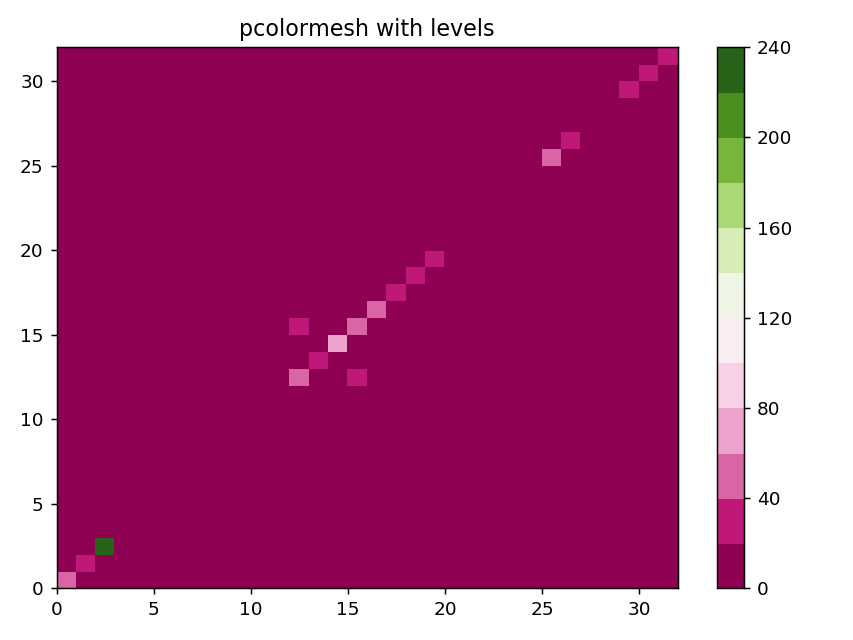

In [230]:
drawhist2(some_changes, metrics) # 10 patterns with different fragments

In [ ]:
(10, 6441, 1)
(10, 6441, 2)
(10, 6441, 3)
(10, 6489, 1)
(10, 6489, 2)
(10, 6489, 3)
(10, 6489, 4)
(10, 6489, 5)
(10, 6489, 6)
(10, 6515, 1)
(10, 6515, 2)
(10, 6515, 3)
(10, 6538, 1)
(10, 6538, 2)
(10, 6538, 3)
(10, 6538, 4)
(10, 6538, 5)
(10, 6646, 1)
(10, 6646, 2)
(10, 6646, 3)
(10, 6660, 1)
(10, 6660, 2)
(10, 6660, 3)
(10, 6660, 4)
(10, 6660, 5)
(10, 6754, 1)
(10, 6754, 2)
(10, 6764, 1)
(10, 6764, 3)
(10, 6843, 1)
(10, 6843, 2)
(10, 6881, 1)
(10, 6881, 4)

<IPython.core.display.Javascript object>


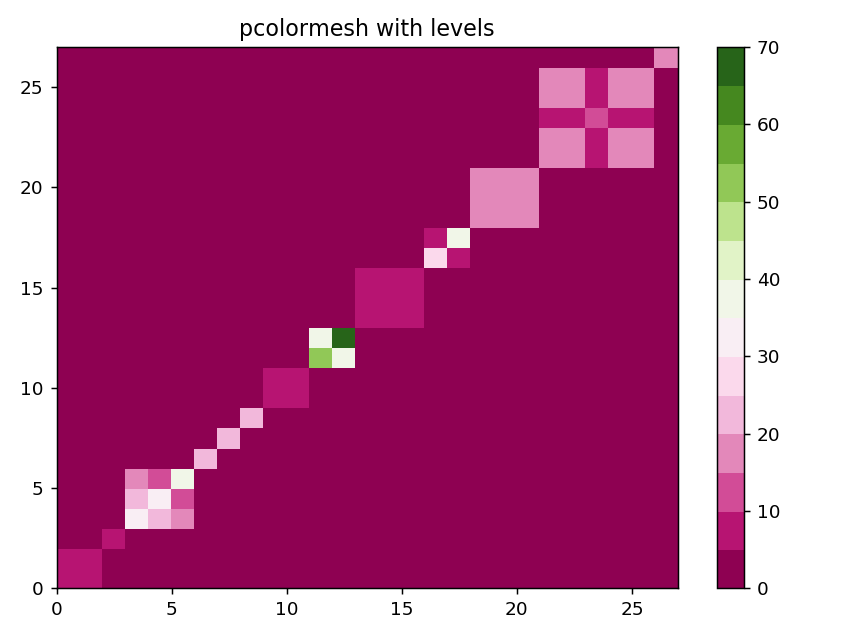

In [236]:
drawhist2(some_changes, metrics) # 10 patterns with different fragments

<IPython.core.display.Javascript object>


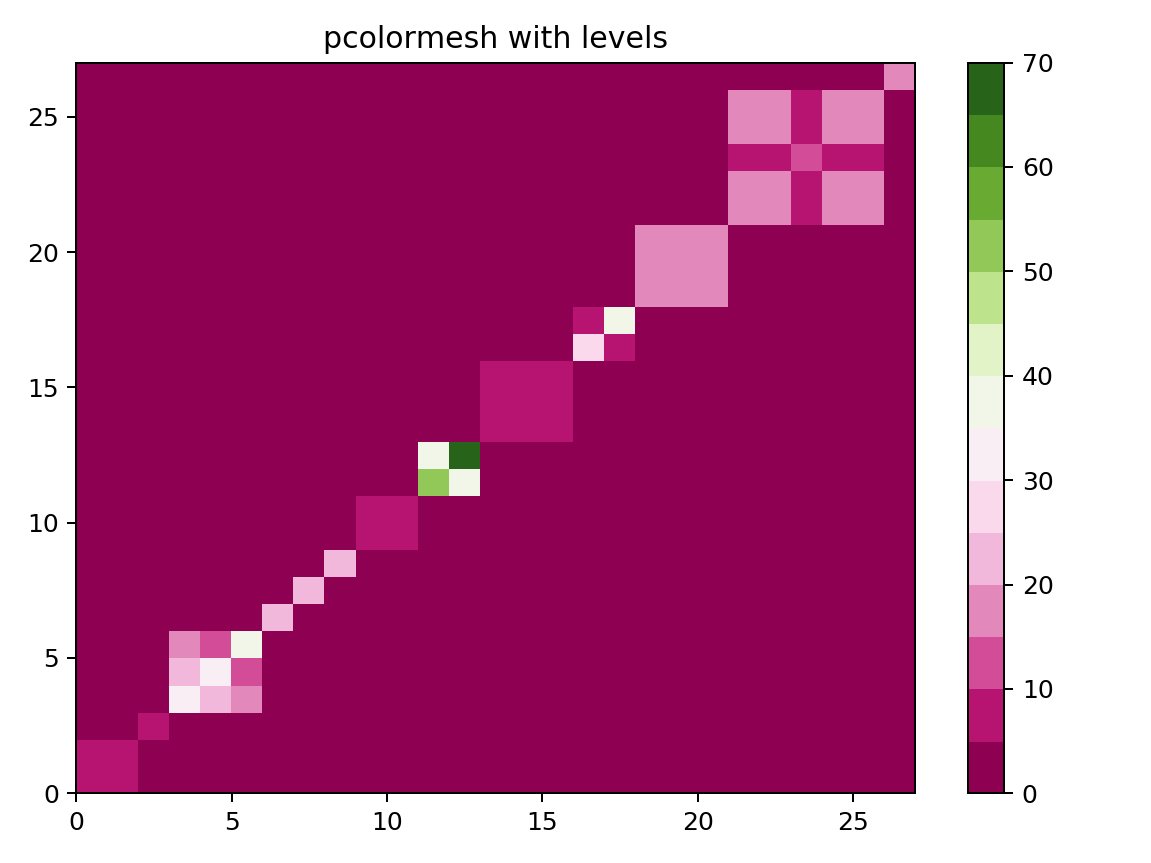

In [47]:
drawhist2(some_changes, metrics)

<IPython.core.display.Javascript object>


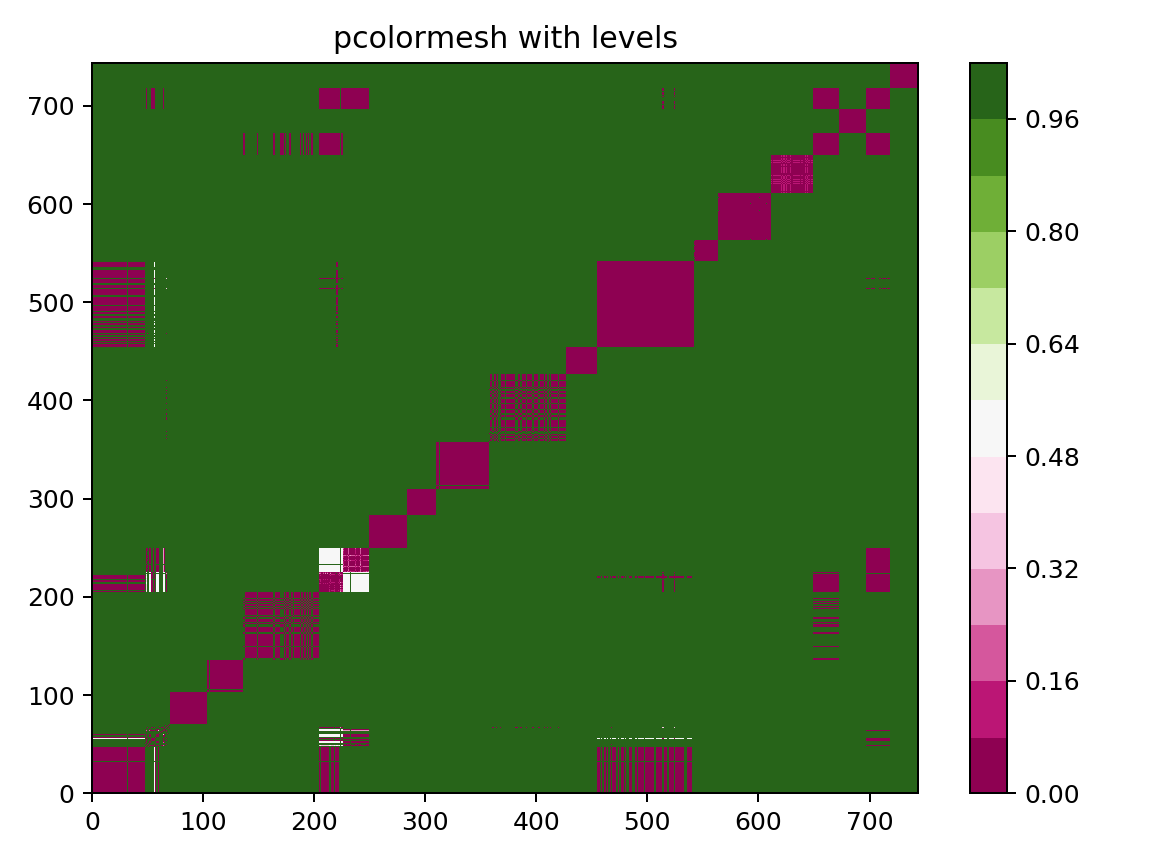

In [119]:
drawhist2(some_changes, dists_for_tops)

<IPython.core.display.Javascript object>


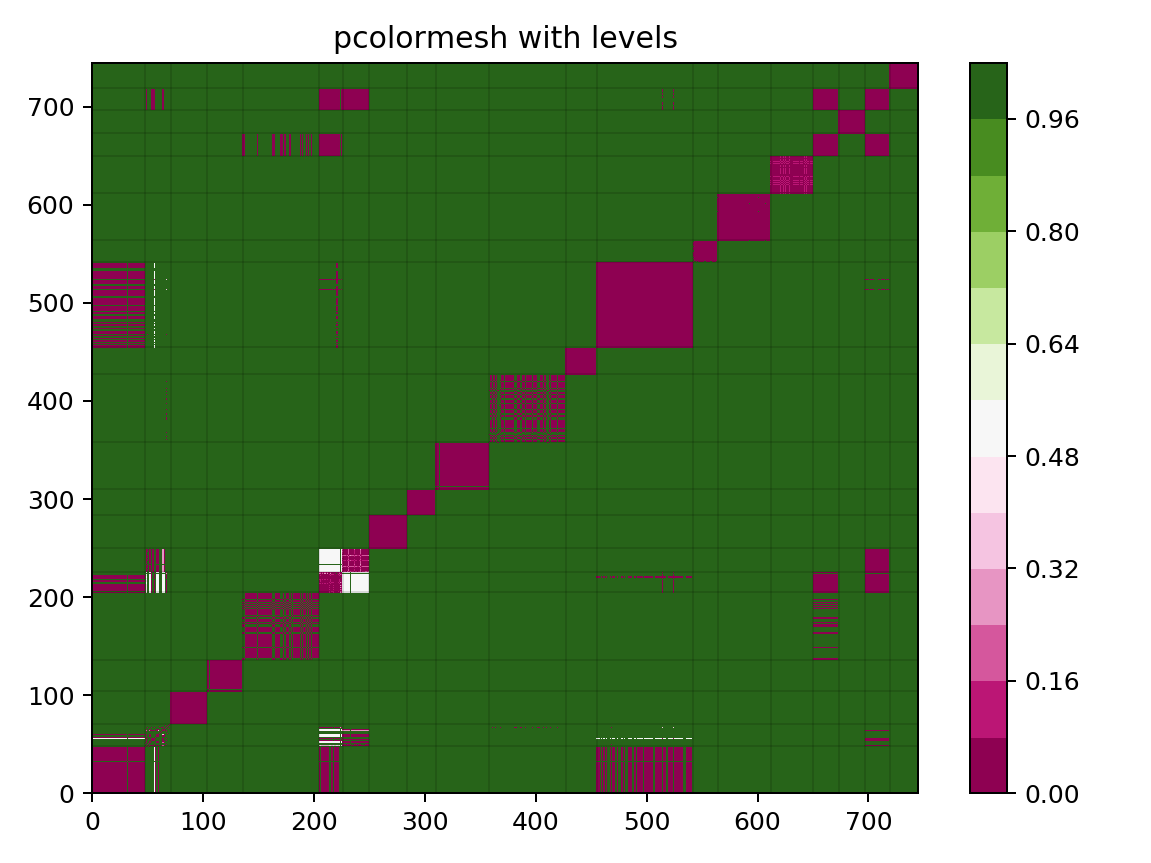

In [198]:
drawhist2(some_changes, dists_for_tops, True)

### Наблюдения:
1. Данные не такие уж плохие (т. е., не идентичные пределах паттерна), так как некоторые изменения из разных паттернов близки, а внутри паттернов — нет
2. У паттернов (5, 2013) и (9, 6293) много близких изменений. Например, у двух изменений (5, 2013, 16) и (9, 6293, 54) два общих n-грамма ([(14, 1, 1), (17, 1, 1)]):

        DEL SimpleName@@ DEL SimpleName@@ DEL MethodInvocation@@ DEL SimpleName@@ DEL SimpleName@@
        DEL SimpleName@@ DEL MethodInvocation@@ DEL SimpleName@@ DEL SimpleName@@ DEL MethodInvocation@@

(удаление вызова метода, в аргументах которого вызывался ещё один метод)

При этом у (9, 6293, 54) и (9, 6293, 52) тоже два общих n-грамма ([(354, 1, 1), (3666, 1, 1)]):

        DEL Block@@ DEL SimpleName@@ DEL SimpleType@@ DEL SimpleName@@ DEL SingleVariableDeclaration@@
        DEL SimpleName@@ DEL Block@@ DEL SimpleName@@ DEL SimpleType@@ DEL SimpleName@@
(удаление **catch (AssertionError e) {}**)
3. У паттерна (8, 2266) много далёких изменений


In [180]:
dists_for_tops[15][508]
print(hists[15])
print(hists[508])
print("Intersections:", get_intersections(hists[15], hists[508]))
print("Intersections:", get_intersections(hists[506], hists[508]))
print(some_changes[15], some_changes[508], some_changes[506])

[(14, 1), (17, 1), (201, 1), (288, 1), (303, 1), (442, 1), (1152, 1), (5441, 1)]
[(14, 1), (17, 1), (302, 1), (354, 1), (601, 1), (622, 1), (1141, 1), (3116, 1), (3666, 1), (3794, 1), (3816, 1), (4248, 1), (4285, 1), (18081, 1), (29234, 1), (30600, 1), (30955, 1), (34899, 1)]
Intersections: [(14, 1, 1), (17, 1, 1)]
Intersections: [(354, 1, 1), (3666, 1, 1)]
(5, 2013, 16) (9, 6293, 54) (9, 6293, 52)


In [ ]:
Dictionary of possible labels

1 AnonymousClassDeclaration
2 ArrayAccess
3 ArrayCreation
4 ArrayInitializer
5 ArrayType
6 AssertStatement
7 Assignment
8 Block
9 BooleanLiteral
10 BreakStatement
11 CastExpression
12 CatchClause
13 CharacterLiteral
14 ClassInstanceCreation
15 CompilationUnit
16 ConditionalExpression
17 ConstructorInvocation
18 ContinueStatement
19 DoStatement
20 EmptyStatement
21 ExpressionStatement
22 FieldAccess
23 FieldDeclaration
24 ForStatement
25 IfStatement
26 ImportDeclaration
27 InfixExpression
28 Initializer
29 Javadoc
30 LabeledStatement
31 MethodDeclaration
32 MethodInvocation
33 NullLiteral
34 NumberLiteral
35 PackageDeclaration
36 ParenthesizedExpression
37 PostfixExpression
38 PrefixExpression
39 PrimitiveType
40 QualifiedName
41 ReturnStatement
42 SimpleName
43 SimpleType
44 SingleVariableDeclaration
45 StringLiteral
46 SuperConstructorInvocation
47 SuperFieldAccess
48 SuperMethodInvocation
49 SwitchCase
50 SwitchStatement
51 SynchronizedStatement
52 ThisExpression
53 ThrowStatement
54 TryStatement
55 TypeDeclaration

57 TypeLiteral
58 VariableDeclarationExpression
59 VariableDeclarationFragment
60 VariableDeclarationStatement
61 WhileStatement
62 InstanceofExpression

65 TagElement
66 TextElement
67 MemberRef
68 MethodRef
69 MethodRefParameter
70 EnhancedForStatement
71 EnumDeclaration
72 EnumConstantDeclaration
73 TypeParameter
74 ParameterizedType

76 WildcardType
77 NormalAnnotation
78 MarkerAnnotation
79 SingleMemberAnnotation
80 MemberValuePair

83 Modifier
84 UnionType
85 Dimension
86 LambdaExpression

90 ExpressionMethodReference

In [159]:
some_changes_nums

[((5, 2013), 48, 0),
 ((5, 2065), 23, 48),
 ((5, 6537), 33, 71),
 ((6, 628), 32, 104),
 ((6, 3264), 69, 136),
 ((6, 4656), 21, 205),
 ((6, 12580), 24, 226),
 ((6, 14540), 34, 250),
 ((8, 111), 26, 284),
 ((8, 1486), 48, 310),
 ((8, 2266), 69, 358),
 ((8, 8667), 28, 427),
 ((9, 6293), 87, 455),
 ((9, 9750), 22, 542),
 ((10, 3256), 48, 564),
 ((10, 11483), 38, 612),
 ((11, 6085), 23, 650),
 ((11, 9826), 24, 673),
 ((19, 7496), 22, 697),
 ((19, 13424), 26, 719)]

In [184]:
noise = []
noisy_patterns = set()

clusters = collections.defaultdict(list)
num_changes = len(some_changes)

for i in range(num_changes):
    el = clustering.labels_[i]
    if (el == -1):
        noise.append(some_changes[i])
        noisy_patterns.add((some_changes[i][0], some_changes[i][1]))
    else:
        clusters[el].append(some_changes[i])

for key in clusters:
    print(clusters[key])
    print("\n")
print("NOISE:", noise)

dict_res = collections.defaultdict(int)

print("\n")
for key in clusters:
    if_noisy = ""
    if ((clusters[key][0][0], clusters[key][0][1]) in noisy_patterns):
        if_noisy = "noisy"
    print(clusters[key][0], if_noisy)
    
print(noisy_patterns)

[(5, 2013, 1), (5, 2013, 2), (5, 2013, 3), (5, 2013, 4), (5, 2013, 5), (5, 2013, 6), (5, 2013, 7), (5, 2013, 8), (5, 2013, 9), (5, 2013, 10), (5, 2013, 11), (5, 2013, 12), (5, 2013, 13), (5, 2013, 14), (5, 2013, 15), (5, 2013, 16), (5, 2013, 17), (5, 2013, 18), (5, 2013, 19), (5, 2013, 20), (5, 2013, 21), (5, 2013, 22), (5, 2013, 23), (5, 2013, 24), (5, 2013, 25), (5, 2013, 26), (5, 2013, 27), (5, 2013, 28), (5, 2013, 29), (5, 2013, 30), (5, 2013, 31), (5, 2013, 32), (5, 2013, 34), (5, 2013, 35), (5, 2013, 36), (5, 2013, 37), (5, 2013, 38), (5, 2013, 39), (5, 2013, 40), (5, 2013, 41), (5, 2013, 42), (5, 2013, 43), (5, 2013, 44), (5, 2013, 45), (5, 2013, 46), (5, 2013, 47), (5, 2013, 48)]


[(5, 2065, 1), (5, 2065, 4)]


[(5, 2065, 5), (5, 2065, 6), (5, 2065, 11), (5, 2065, 12), (5, 2065, 18)]


[(5, 2065, 14), (5, 2065, 21)]


[(5, 2065, 19), (5, 2065, 22)]


[(5, 6537, 1), (5, 6537, 2), (5, 6537, 3), (5, 6537, 4), (5, 6537, 5), (5, 6537, 6), (5, 6537, 7), (5, 6537, 8), (5, 6537, 9), (

### Результаты кластеризации:
1. Все кластеры содержат изменения только из одного паттерна
2. **8** паттернов кластеризовались идеально   
**3** паттерна кластеризовались с шумом (какие-то эл-ты были откинуты)  
**2** паттерна кластеризовались на несколько кластеров без шума  
**7** — на несколько кластеров с шумом

In [123]:
some_changes[205:249]

[(6, 4656, 1),
 (6, 4656, 2),
 (6, 4656, 3),
 (6, 4656, 4),
 (6, 4656, 5),
 (6, 4656, 6),
 (6, 4656, 7),
 (6, 4656, 8),
 (6, 4656, 9),
 (6, 4656, 10),
 (6, 4656, 11),
 (6, 4656, 12),
 (6, 4656, 13),
 (6, 4656, 14),
 (6, 4656, 15),
 (6, 4656, 16),
 (6, 4656, 17),
 (6, 4656, 18),
 (6, 4656, 19),
 (6, 4656, 20),
 (6, 4656, 21),
 (6, 12580, 1),
 (6, 12580, 2),
 (6, 12580, 3),
 (6, 12580, 4),
 (6, 12580, 5),
 (6, 12580, 6),
 (6, 12580, 7),
 (6, 12580, 9),
 (6, 12580, 10),
 (6, 12580, 11),
 (6, 12580, 12),
 (6, 12580, 13),
 (6, 12580, 14),
 (6, 12580, 15),
 (6, 12580, 17),
 (6, 12580, 18),
 (6, 12580, 19),
 (6, 12580, 20),
 (6, 12580, 21),
 (6, 12580, 22),
 (6, 12580, 24),
 (6, 12580, 25),
 (6, 12580, 26)]

In [ ]:
(10, 13553, 1)
(10, 13553, 2)
(10, 13553, 3)
(10, 13714, 1)
(10, 13714, 2)
(10, 13714, 3)
(10, 13751, 1)
(10, 13751, 2)
(10, 13751, 3)
(10, 13987, 1)
(10, 13987, 2)
(10, 14021, 1)
(10, 14021, 2)
(10, 14030, 1)
(10, 14030, 2)
(10, 14030, 3)
(10, 14076, 1)
(10, 14076, 2)
(10, 14084, 1)
(10, 14084, 2)
(10, 14084, 3)
(10, 14189, 1)
(10, 14189, 2)
(10, 14189, 3)
(10, 14189, 4)
(10, 14189, 5)
(10, 14204, 1)
(10, 14204, 3)

# Analyzing tops 20 from final dataset (5 gram)

## First metric (Jaccard distance): $\sum_{i \in intersection}\frac{min(hist1[i], hist2[i])}{max(hist1[i], hist2[i])}$

<IPython.core.display.Javascript object>


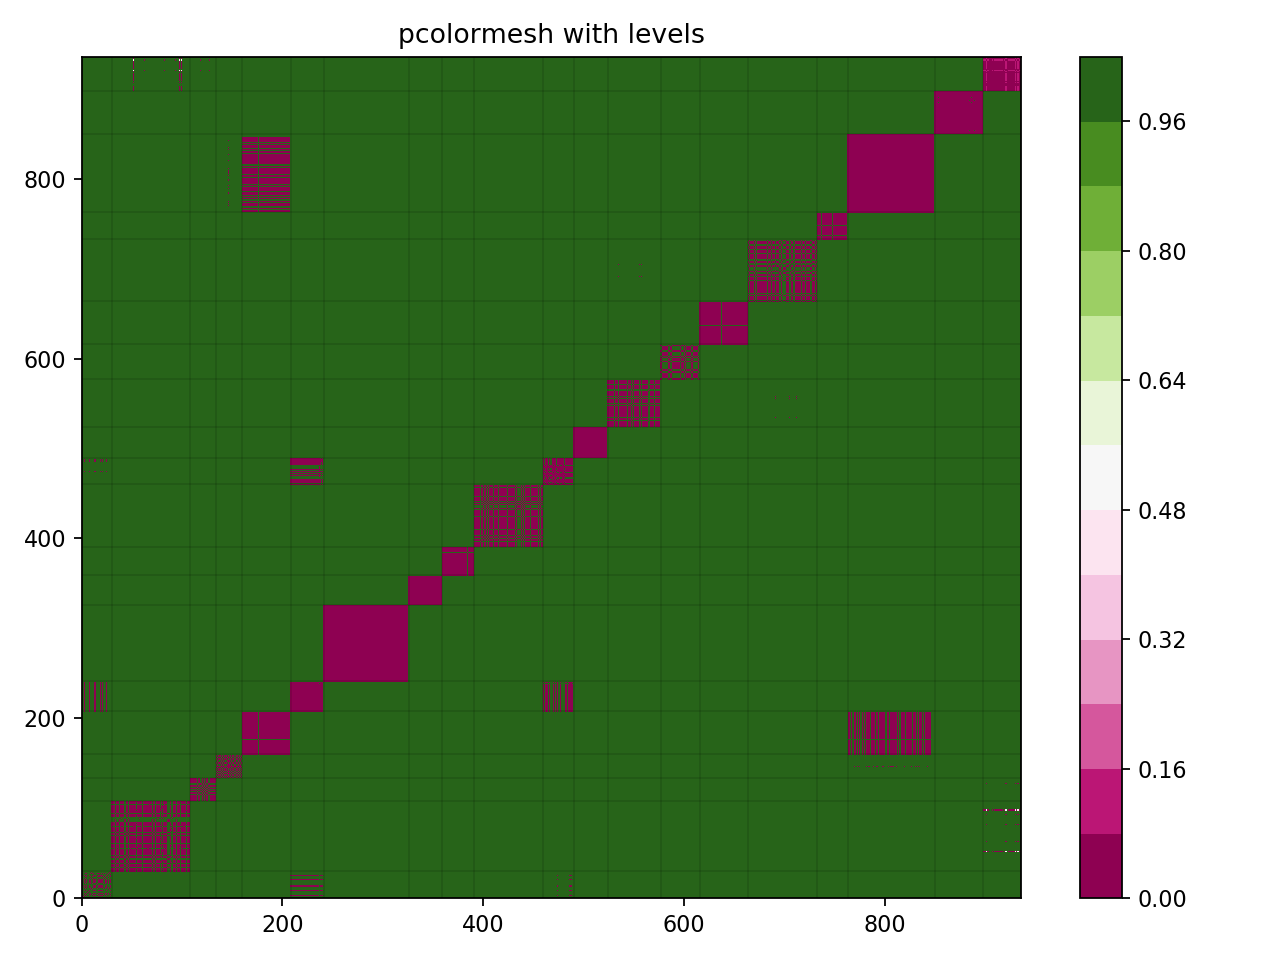

In [38]:
dists_for_tops = get_dists(hists, jaccard_metric, hist_len_5gram)
drawhist2(some_changes, dists_for_tops, True)

In [39]:
some_changes_nums

[((3, 6789), 30, 0),
 ((4, 1645), 78, 30),
 ((4, 8462), 26, 108),
 ((4, 13964), 26, 134),
 ((5, 2013), 48, 160),
 ((5, 4912), 33, 208),
 ((5, 5396), 85, 241),
 ((5, 6537), 33, 326),
 ((6, 628), 32, 359),
 ((6, 3264), 69, 391),
 ((6, 4703), 30, 460),
 ((6, 14540), 34, 490),
 ((6, 14981), 53, 524),
 ((7, 10354), 39, 577),
 ((8, 1486), 48, 616),
 ((8, 2266), 69, 664),
 ((8, 8667), 30, 733),
 ((9, 6293), 87, 763),
 ((10, 3256), 48, 850),
 ((10, 11483), 38, 898)]

In [43]:
# Clustering


clustering = sklearn.cluster.DBSCAN(eps=0.85, min_samples=2, metric='precomputed').fit(dists_for_tops)

In [44]:
def print_clustering_results(clustering, some_changes):
    noise = []
    noisy_patterns = set()
    patterns = set()
    
    ideal_clustered = []
    
    from_pattern_to_num = collections.defaultdict(int)
    
    clusters_only_one_pattern = []

    clusters = collections.defaultdict(list)
    num_changes = len(some_changes)

    for i in range(num_changes):
        pattern = (some_changes[i][0], some_changes[i][1])
        
        patterns.add(pattern)
        from_pattern_to_num[pattern] += 1
        
        el = clustering.labels_[i]
        if (el == -1):
            noise.append(some_changes[i])
            noisy_patterns.add(pattern)
        else:
            clusters[el].append(some_changes[i])

    for key in clusters:
        print(clusters[key])
        
        patterns_in_cluster = set()
        for elem in clusters[key]:
            patterns_in_cluster.add((elem[0], elem[1]))
        if len(patterns_in_cluster) == 1:
            clusters_only_one_pattern.append(key)
            
            pattern = (clusters[key][0][0], clusters[key][0][1])
            print(len(clusters[key]))
            print(from_pattern_to_num[pattern])
            
            if len(clusters[key]) == from_pattern_to_num[pattern]:
                ideal_clustered.append((clusters[key][0][0], clusters[key][0][1]))
        
        print("\n")
        
    print("NOISE:", noise)

    dict_res = collections.defaultdict(int)

    print("\n")
    for key in clusters:
        if_noisy = ""
        if ((clusters[key][0][0], clusters[key][0][1]) in noisy_patterns):
            if_noisy = "noisy"
        print(clusters[key][0], if_noisy)
    
    print("\n")
    
    print("NUM CHANGES:", num_changes)
    print("NUM PATTERNS:", len(patterns))
    print("NUM CLUSTERS:", len(clusters))
    print("\n")
    
    percent_ideal = round(len(ideal_clustered) / len(patterns) * 100, 2)
    print("IDEAL CLUSTERED PATTERNS:", len(ideal_clustered), "(" + str(percent_ideal) + "%)")
    print("Ideal clustered:", ideal_clustered, "\n")
    
    percent_clusters_only_one_pattern = round(len(clusters_only_one_pattern) / len(clusters) * 100, 2)
    print("CLUSTERS WITH ELEMENTS FROM ONLY ONE PATTERN:", 
          len(clusters_only_one_pattern), "(" + str(percent_clusters_only_one_pattern) + "%)")
    print("\n")
    
    percent_noise = round(len(noise) / num_changes * 100, 2)
    print("NUMBER OF NOISE (CHANGES):", len(noise), "(" + str(percent_noise) + "%)")
    print("Noisy patterns:", noisy_patterns)
    
print_clustering_results(clustering, some_changes)

[(3, 6789, 3), (3, 6789, 4), (3, 6789, 6), (3, 6789, 7), (3, 6789, 8), (3, 6789, 12), (3, 6789, 13), (3, 6789, 15), (3, 6789, 16), (3, 6789, 17), (3, 6789, 19), (3, 6789, 22), (3, 6789, 23), (3, 6789, 24), (3, 6789, 25), (3, 6789, 28), (3, 6789, 30), (3, 6789, 31), (3, 6789, 33), (3, 6789, 34), (3, 6789, 36), (3, 6789, 38), (5, 4912, 1), (5, 4912, 2), (5, 4912, 3), (5, 4912, 4), (5, 4912, 5), (5, 4912, 6), (5, 4912, 7), (5, 4912, 8), (5, 4912, 9), (5, 4912, 10), (5, 4912, 11), (5, 4912, 12), (5, 4912, 13), (5, 4912, 14), (5, 4912, 15), (5, 4912, 16), (5, 4912, 17), (5, 4912, 18), (5, 4912, 19), (5, 4912, 20), (5, 4912, 21), (5, 4912, 22), (5, 4912, 23), (5, 4912, 24), (5, 4912, 25), (5, 4912, 26), (5, 4912, 27), (5, 4912, 28), (5, 4912, 29), (5, 4912, 30), (5, 4912, 31), (5, 4912, 32), (5, 4912, 33), (6, 4703, 1), (6, 4703, 2), (6, 4703, 3), (6, 4703, 4), (6, 4703, 5), (6, 4703, 6), (6, 4703, 7), (6, 4703, 8), (6, 4703, 9), (6, 4703, 10), (6, 4703, 11), (6, 4703, 12), (6, 4703, 13), (6

In [45]:
# Let's try to shuffle
import sklearn.cluster

import random

shuffled_some_changes = some_changes.copy()
random.shuffle(shuffled_some_changes)

shuffled_hists = get_hists(shuffled_some_changes, RESULTS_FOR_HIST_PATH_5GRAM, "5gram")
dists_for_shuffled = get_dists(shuffled_hists, jaccard_metric, hist_len_5gram)

In [46]:
clustering_for_shuffled = sklearn.cluster.DBSCAN(eps=0.85, min_samples=2, metric='precomputed').fit(dists_for_shuffled)
print_clustering_results(clustering_for_shuffled, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 48), (9, 6293, 36), (9, 6293, 66), (5, 2013, 12), (4, 13964, 13), (4, 13964, 17), (9, 6293, 63), (9, 6293, 73), (5, 2013, 45), (5, 2013, 6), (5, 2013, 7), (5, 2013, 35), (5, 2013, 9), (5, 2013, 14), (9, 6293, 77), (9, 6293, 28), (9, 6293, 61), (9, 6293, 38), (5, 2013, 20), (5, 2013, 11), (9, 6293, 50), (9, 6293, 69), (9, 6293, 43), (9, 6293, 71), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (5, 2013, 8), (9, 6293, 52), (9, 6293, 29), (9, 6293, 55), (9, 6293, 59), (9, 6293, 8), (5, 2013, 18), (9, 6293, 45), (4, 13964, 3), (9, 6293, 2), (9, 6293, 17), (5, 2013, 21), (9, 6293, 81), (9, 6293, 9), (9, 6293, 70), (5, 2013, 2), (9, 6293, 31), (9, 6293, 27), (5, 2013, 32), (9, 6293, 46), (9, 6293, 12), (4, 13964, 10), (9, 62

## Canberra metric: $\sum_i\frac{|p_i - q_i|}{|p_i| + |q_i|} / |union(p, q)|$

<IPython.core.display.Javascript object>


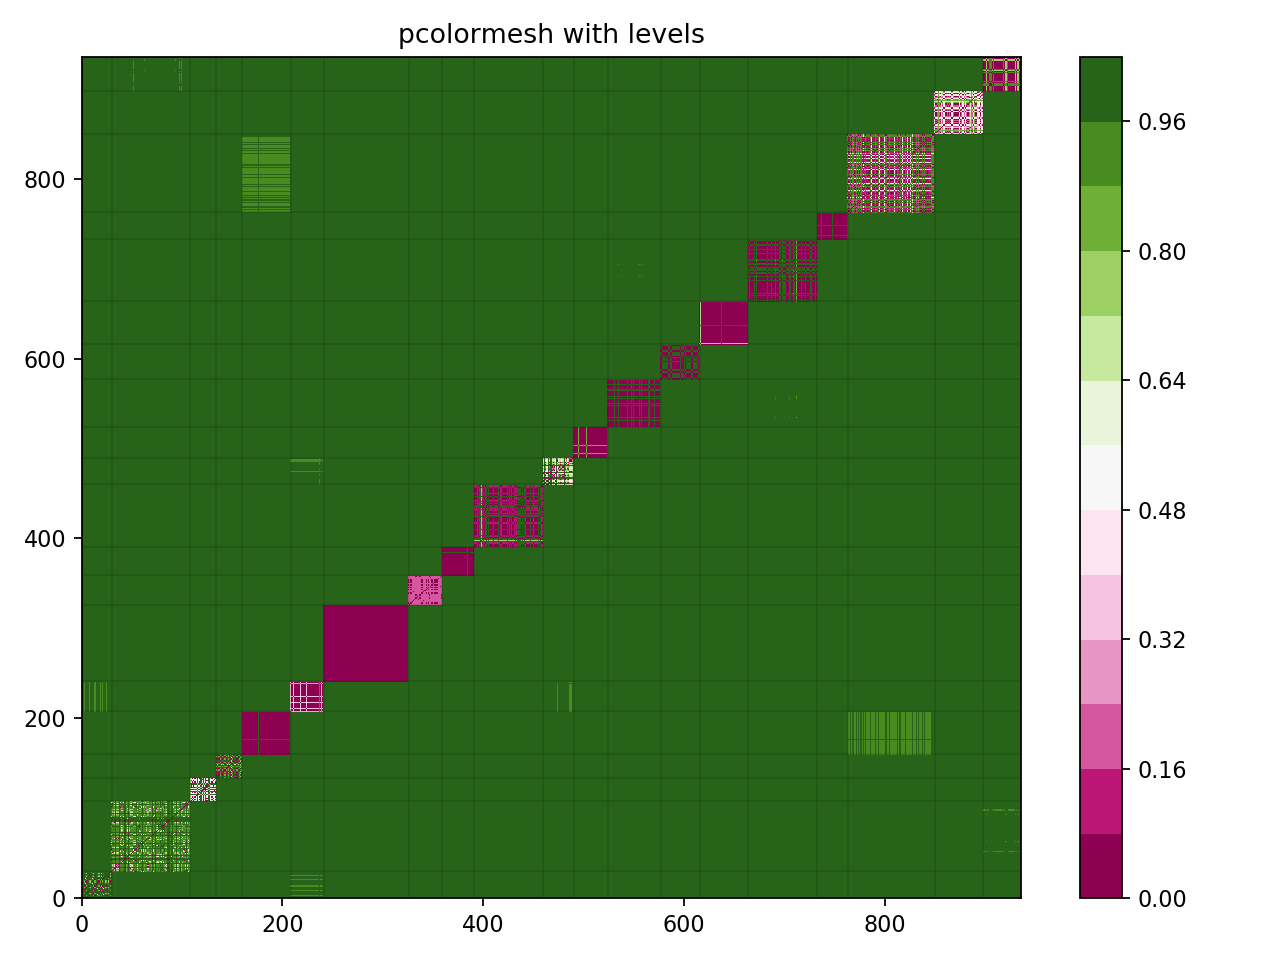

In [47]:
canberra_dists = get_dists(hists, canberra_metric, hist_len_5gram)
drawhist2(some_changes, canberra_dists, True)

In [145]:
print(numpy.array(canberra_dists)[500:524][:,500:524])

[[0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.8 0.8 0.8 0.  0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8
  0.8 0.8 0.8 0.8 0.8 0.8]
 [0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. ]

<IPython.core.display.Javascript object>


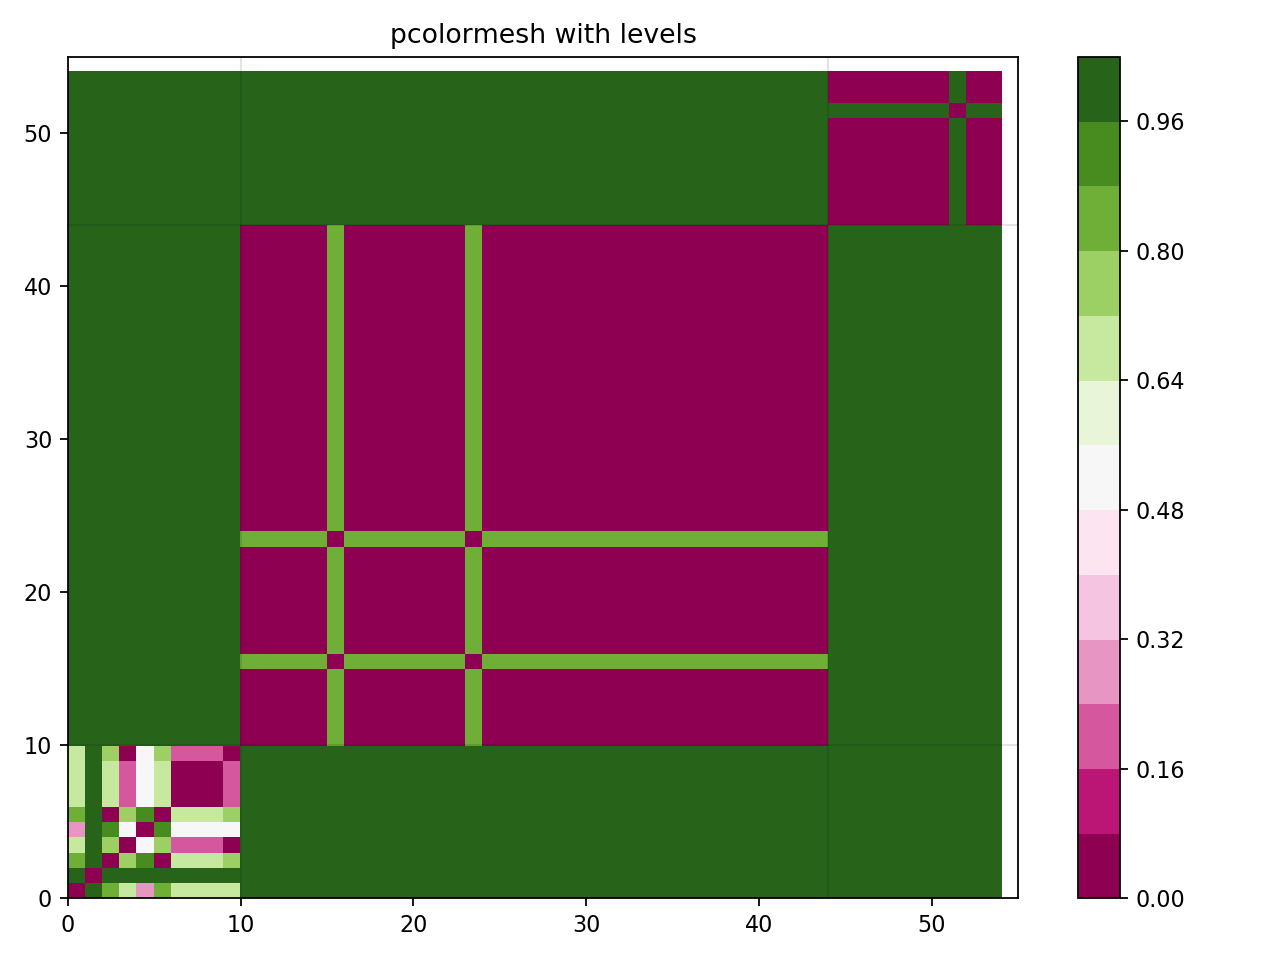

[(6, 14540, 1), (6, 14540, 2), (6, 14540, 3), (6, 14540, 4), (6, 14540, 5), (6, 14540, 6), (6, 14540, 7), (6, 14540, 8), (6, 14540, 9), (6, 14540, 10), (6, 14540, 11), (6, 14540, 12), (6, 14540, 13), (6, 14540, 14), (6, 14540, 15), (6, 14540, 16), (6, 14540, 17), (6, 14540, 18), (6, 14540, 19), (6, 14540, 20), (6, 14540, 21), (6, 14540, 22), (6, 14540, 23), (6, 14540, 24), (6, 14540, 25), (6, 14540, 26), (6, 14540, 27), (6, 14540, 28), (6, 14540, 29), (6, 14540, 30), (6, 14540, 31), (6, 14540, 32), (6, 14540, 33), (6, 14540, 34)]
34
34


NOISE: []


(6, 14540, 1) 


NUM CHANGES: 34
NUM PATTERNS: 1
NUM CLUSTERS: 1


IDEAL CLUSTERED PATTERNS: 1 (100.0%)
Ideal clustered: [(6, 14540)] 

CLUSTERS WITH ELEMENTS FROM ONLY ONE PATTERN: 1 (100.0%)


NUMBER OF NOISE (CHANGES): 0 (0.0%)
Noisy patterns: set()


In [163]:
import numpy

# Example I need to think about !!!
# Why DBSCAN doesn't take two green lines (corresponding changes) to the cluster?
# SOLVED (metric='precomputed')

ds = numpy.array(canberra_dists)[490:524][:,490:524]

drawhist2(some_changes[480:535], numpy.array(canberra_dists)[480:535][:,480:535], True)

clustering_tmp = sklearn.cluster.DBSCAN(eps=0.8, min_samples=1, metric='precomputed').fit(ds)
print_clustering_results(clustering_tmp, some_changes[490:524])

In [48]:
# Using shuffled some_changes

dists_canberra = get_dists(shuffled_hists, canberra_metric, hist_len_5gram)

In [49]:
clustering_canberra = sklearn.cluster.DBSCAN(eps=0.85, min_samples=2, metric='precomputed').fit(dists_canberra)
print_clustering_results(clustering_canberra, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 66), (9, 6293, 43), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (9, 6293, 29), (9, 6293, 59), (9, 6293, 17), (9, 6293, 70), (9, 6293, 12), (9, 6293, 4), (9, 6293, 86), (9, 6293, 85), (9, 6293, 19), (9, 6293, 7), (9, 6293, 72), (9, 6293, 51), (9, 6293, 76), (9, 6293, 14), (9, 6293, 78), (9, 6293, 24), (9, 6293, 1), (9, 6293, 54), (9, 6293, 87), (9, 6293, 39), (9, 6293, 53), (9, 6293, 15)]
28
87


[(8, 2266, 29), (8, 2266, 74), (8, 2266, 2), (8, 2266, 24), (8, 2266, 40), (8, 2266, 68), (8, 2266, 53), (8, 2266, 37), (8, 2266, 46), (8, 2266, 88), (8, 2266, 59), (8, 2266, 94), (8, 2266, 86), (8, 2266, 45), (8, 2266, 8), (8, 2266, 43)]
16
69


[(9, 6293, 48), (9, 6293, 36), (9, 6293, 63), (9, 6293, 73), (9, 6293, 77), (9,

In [ ]:
# MeanShift doesn't have metric='precomputed' option

'''
clustering_canberra = sklearn.cluster.MeanShift(bandwidth=2).fit(dists_canberra)
print_clustering_results(clustering_canberra, shuffled_some_changes)
'''

In [50]:
dists_canberra = get_dists(shuffled_hists, canberra_metric, hist_len_5gram)
clustering_canberra = sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric='precomputed').fit(dists_canberra)
print_clustering_results(clustering_canberra, shuffled_some_changes)


[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 43), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (9, 6293, 29), (9, 6293, 59), (9, 6293, 70), (9, 6293, 12), (9, 6293, 4), (9, 6293, 86), (9, 6293, 85), (9, 6293, 19), (9, 6293, 7), (9, 6293, 72), (9, 6293, 51), (9, 6293, 76), (9, 6293, 14), (9, 6293, 78), (9, 6293, 24), (9, 6293, 1), (9, 6293, 54), (9, 6293, 87), (9, 6293, 39), (9, 6293, 15)]
25
87


[(8, 2266, 29), (8, 2266, 74), (8, 2266, 2), (8, 2266, 24), (8, 2266, 40), (8, 2266, 68), (8, 2266, 53), (8, 2266, 37), (8, 2266, 46), (8, 2266, 88), (8, 2266, 59), (8, 2266, 94), (8, 2266, 86), (8, 2266, 45), (8, 2266, 8), (8, 2266, 43)]
16
69


[(9, 6293, 48), (9, 6293, 36), (9, 6293, 63), (9, 6293, 73), (9, 6293, 77), (9, 6293, 28), (9, 6293, 61), (9, 6293, 38), (9

<IPython.core.display.Javascript object>


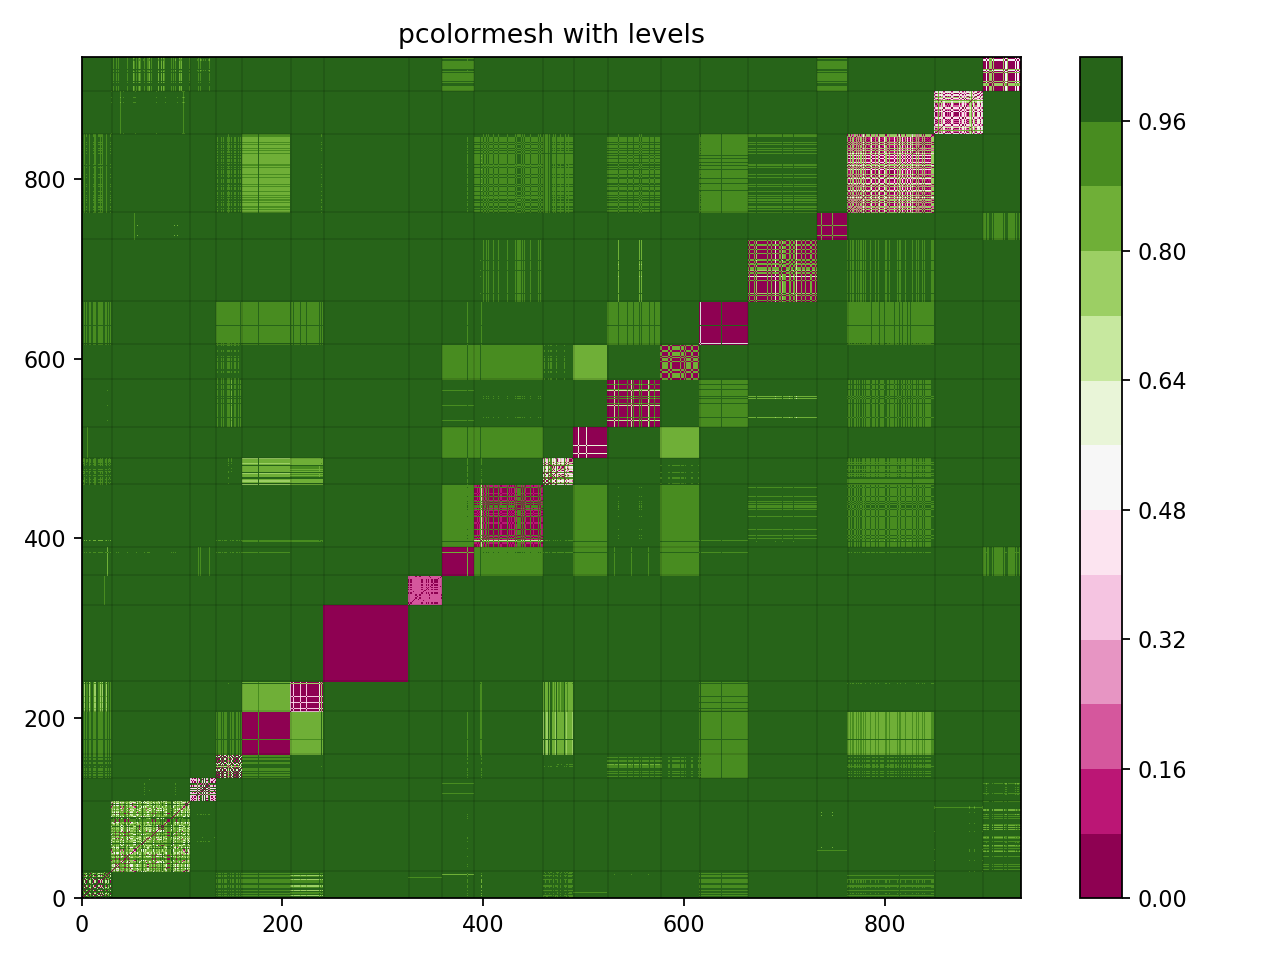

In [51]:
canberra_dists_3gram = get_dists(hists_3gram, canberra_metric, hist_len_3gram)
drawhist2(some_changes, canberra_dists_3gram, True)

## Pearson's Correlation Coefficient: $\frac{\sum_i(h_1(i) - \frac{1}{n})(h_2(i) - \frac{1}{n})}{\sqrt{\sum_i(h_1(i) - \frac{1}{n})^2 \sum_i(h_2(i) - \frac{1}{n})^2}}$

In [52]:
pearson_dists = get_dists(hists, pearsons_correlation, hist_len_5gram)

<IPython.core.display.Javascript object>


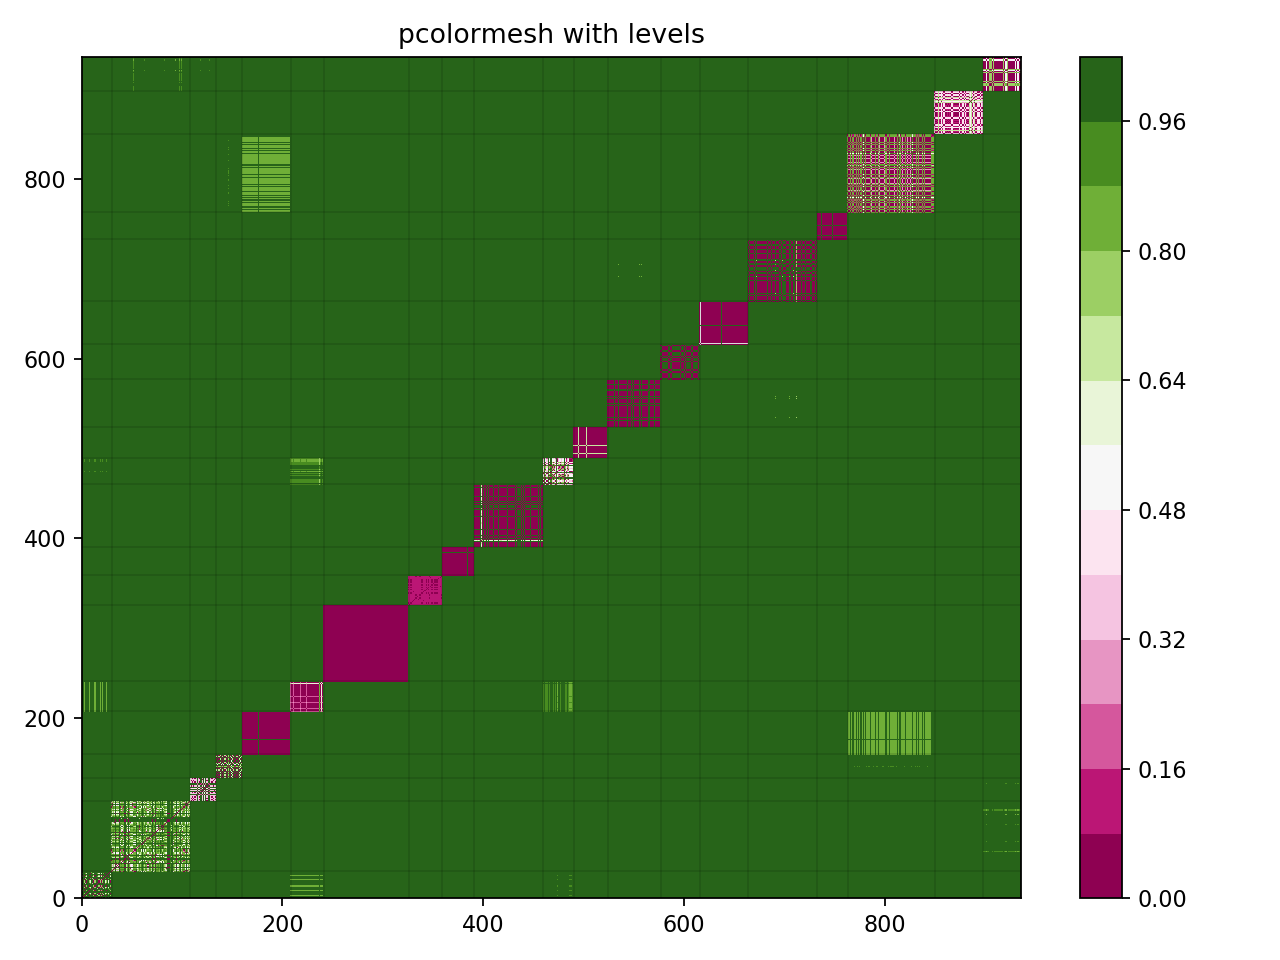

In [53]:
drawhist2(some_changes, pearson_dists, True)

In [54]:
some_changes_nums

[((3, 6789), 30, 0),
 ((4, 1645), 78, 30),
 ((4, 8462), 26, 108),
 ((4, 13964), 26, 134),
 ((5, 2013), 48, 160),
 ((5, 4912), 33, 208),
 ((5, 5396), 85, 241),
 ((5, 6537), 33, 326),
 ((6, 628), 32, 359),
 ((6, 3264), 69, 391),
 ((6, 4703), 30, 460),
 ((6, 14540), 34, 490),
 ((6, 14981), 53, 524),
 ((7, 10354), 39, 577),
 ((8, 1486), 48, 616),
 ((8, 2266), 69, 664),
 ((8, 8667), 30, 733),
 ((9, 6293), 87, 763),
 ((10, 3256), 48, 850),
 ((10, 11483), 38, 898)]

In [ ]:
# Research and think about Pearson dists

print(numpy.array(canberra_dists)[33:40][:,33:40])
print(numpy.array(pearson_dists)[33:40][:,33:40])
print(numpy.array(pearson_dists)[243:260][:,33:40])

In [55]:
# Using shuffled some_changes

dists_pearson = get_dists(shuffled_hists, pearsons_correlation, hist_len_5gram)

In [56]:
clustering_pearson = sklearn.cluster.DBSCAN(eps=0.7, min_samples=7, metric='precomputed').fit(dists_pearson)
print_clustering_results(clustering_pearson, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 66), (9, 6293, 43), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (9, 6293, 29), (9, 6293, 59), (9, 6293, 17), (9, 6293, 70), (9, 6293, 12), (9, 6293, 4), (9, 6293, 86), (9, 6293, 85), (9, 6293, 19), (9, 6293, 7), (9, 6293, 72), (9, 6293, 51), (9, 6293, 76), (9, 6293, 14), (9, 6293, 78), (9, 6293, 24), (9, 6293, 1), (9, 6293, 54), (9, 6293, 87), (9, 6293, 39), (9, 6293, 53), (9, 6293, 15)]
28
87


[(8, 2266, 29), (8, 2266, 74), (8, 2266, 2), (8, 2266, 24), (8, 2266, 40), (8, 2266, 68), (8, 2266, 53), (8, 2266, 37), (8, 2266, 46), (8, 2266, 88), (8, 2266, 59), (8, 2266, 94), (8, 2266, 86), (8, 2266, 45), (8, 2266, 8), (8, 2266, 43)]
16
69


[(9, 6293, 48), (9, 6293, 36), (9, 6293, 63), (9, 6293, 73), (9, 6293, 77), (9,

In [57]:
#dists_pearson = get_dists(shuffled_hists)
clustering_pearson = sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric='precomputed').fit(dists_pearson)
print_clustering_results(clustering_pearson, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 66), (9, 6293, 43), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (9, 6293, 29), (9, 6293, 59), (9, 6293, 17), (9, 6293, 70), (9, 6293, 12), (9, 6293, 4), (9, 6293, 86), (9, 6293, 85), (9, 6293, 19), (9, 6293, 7), (9, 6293, 72), (9, 6293, 51), (9, 6293, 76), (9, 6293, 14), (9, 6293, 78), (9, 6293, 24), (9, 6293, 1), (9, 6293, 54), (9, 6293, 87), (9, 6293, 39), (9, 6293, 15)]
27
87


[(8, 2266, 29), (8, 2266, 74), (8, 2266, 2), (8, 2266, 24), (8, 2266, 40), (8, 2266, 68), (8, 2266, 53), (8, 2266, 37), (8, 2266, 46), (8, 2266, 88), (8, 2266, 59), (8, 2266, 94), (8, 2266, 86), (8, 2266, 45), (8, 2266, 8), (8, 2266, 43)]
16
69


[(9, 6293, 48), (9, 6293, 36), (9, 6293, 63), (9, 6293, 73), (9, 6293, 77), (9, 6293, 28), (9,

In [58]:
agglomerative = sklearn.cluster.AgglomerativeClustering(n_clusters=35, affinity='precomputed', linkage='average')
agglomerative = agglomerative.fit(dists_pearson)
print_clustering_results(agglomerative, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 48), (9, 6293, 36), (9, 6293, 66), (5, 2013, 12), (4, 13964, 13), (4, 13964, 17), (9, 6293, 63), (9, 6293, 73), (5, 2013, 45), (5, 2013, 6), (5, 2013, 7), (5, 2013, 35), (5, 2013, 9), (5, 2013, 14), (9, 6293, 77), (9, 6293, 28), (9, 6293, 61), (9, 6293, 38), (5, 2013, 20), (5, 2013, 11), (9, 6293, 50), (9, 6293, 69), (9, 6293, 43), (9, 6293, 71), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (5, 2013, 8), (9, 6293, 52), (9, 6293, 29), (9, 6293, 55), (9, 6293, 59), (9, 6293, 8), (5, 2013, 18), (9, 6293, 45), (4, 13964, 3), (9, 6293, 2), (9, 6293, 17), (5, 2013, 21), (9, 6293, 81), (9, 6293, 9), (9, 6293, 70), (5, 2013, 2), (9, 6293, 31), (9, 6293, 27), (5, 2013, 32), (9, 6293, 46), (9, 6293, 12), (4, 13964, 10), (9, 62

In [59]:
dists_pearson_np = np.array(dists_pearson)
spectral = sklearn.cluster.SpectralClustering(n_clusters=30, affinity='precomputed', 
                        assign_labels="discretize", random_state=0).fit(dists_pearson_np.max() - dists_pearson_np)
print_clustering_results(spectral, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 48), (9, 6293, 36), (9, 6293, 66), (5, 2013, 12), (9, 6293, 63), (9, 6293, 73), (5, 2013, 45), (5, 2013, 6), (5, 2013, 7), (5, 2013, 35), (5, 2013, 9), (5, 2013, 14), (9, 6293, 77), (9, 6293, 28), (9, 6293, 61), (9, 6293, 38), (5, 2013, 20), (5, 2013, 11), (9, 6293, 50), (9, 6293, 69), (9, 6293, 43), (9, 6293, 71), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (5, 2013, 8), (9, 6293, 52), (9, 6293, 29), (9, 6293, 55), (9, 6293, 59), (9, 6293, 8), (5, 2013, 18), (9, 6293, 45), (9, 6293, 2), (9, 6293, 17), (5, 2013, 21), (9, 6293, 81), (9, 6293, 9), (9, 6293, 70), (5, 2013, 2), (9, 6293, 31), (9, 6293, 27), (5, 2013, 32), (9, 6293, 46), (9, 6293, 12), (9, 6293, 79), (5, 2013, 23), (5, 2013, 38), (5, 2013, 29), (5, 2013,

# Researching particular changes

In [60]:
some_changes_nums

[((3, 6789), 30, 0),
 ((4, 1645), 78, 30),
 ((4, 8462), 26, 108),
 ((4, 13964), 26, 134),
 ((5, 2013), 48, 160),
 ((5, 4912), 33, 208),
 ((5, 5396), 85, 241),
 ((5, 6537), 33, 326),
 ((6, 628), 32, 359),
 ((6, 3264), 69, 391),
 ((6, 4703), 30, 460),
 ((6, 14540), 34, 490),
 ((6, 14981), 53, 524),
 ((7, 10354), 39, 577),
 ((8, 1486), 48, 616),
 ((8, 2266), 69, 664),
 ((8, 8667), 30, 733),
 ((9, 6293), 87, 763),
 ((10, 3256), 48, 850),
 ((10, 11483), 38, 898)]

<IPython.core.display.Javascript object>


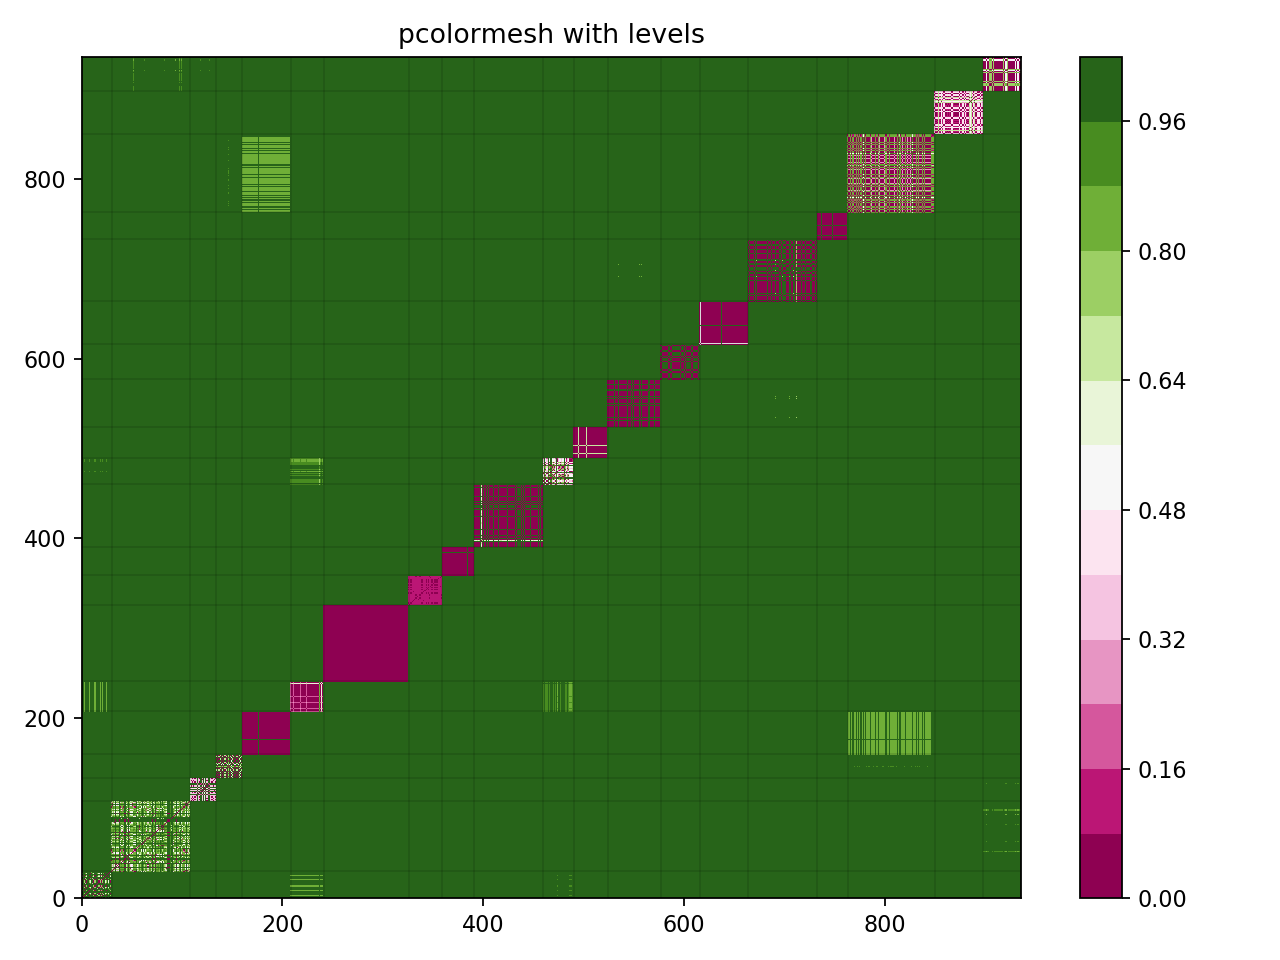

In [61]:
drawhist2(some_changes, pearson_dists, True)

<IPython.core.display.Javascript object>


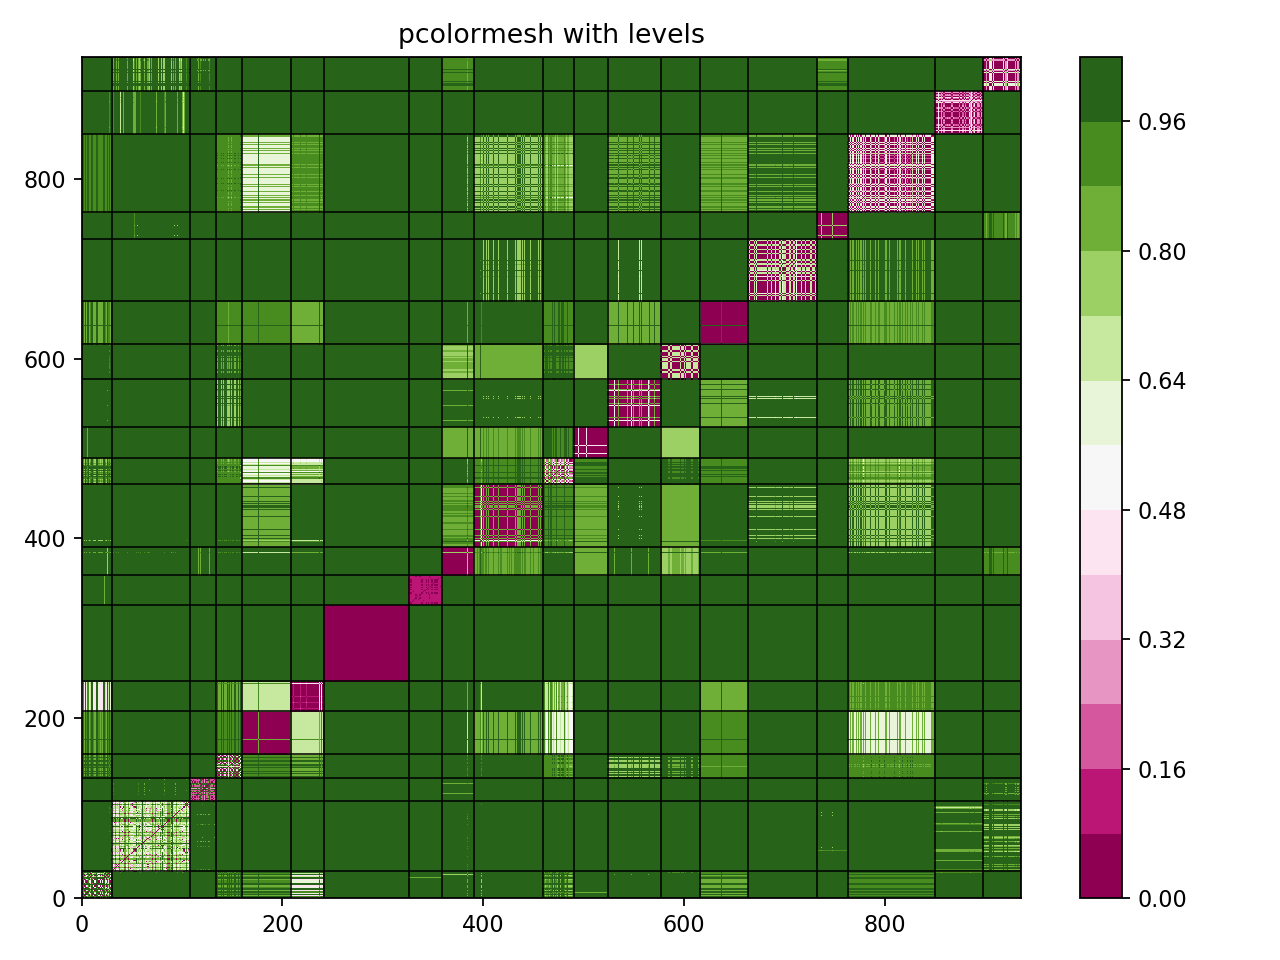

In [62]:
hists_3gram = get_hists(some_changes, hists_path=RESULTS_FOR_HIST_PATH_3GRAM, gram_path="3gram")
pearson_dists_3gram = get_dists(hists_3gram, pearsons_correlation, hist_len_3gram)
drawhist2(some_changes, pearson_dists_3gram, True, lw=0.7)

In [175]:
clustering_pearson_3gram = sklearn.cluster.DBSCAN(eps=0.61, min_samples=2, metric='precomputed').fit(pearson_dists_3gram)
print_clustering_results(clustering_pearson_3gram, some_changes)


[(3, 6789, 3), (3, 6789, 4), (3, 6789, 6), (3, 6789, 8), (3, 6789, 12), (3, 6789, 13), (3, 6789, 16), (3, 6789, 17), (3, 6789, 19), (3, 6789, 23), (3, 6789, 24), (3, 6789, 25), (3, 6789, 28), (3, 6789, 30), (3, 6789, 33), (3, 6789, 34), (3, 6789, 36), (3, 6789, 38), (5, 2013, 1), (5, 2013, 2), (5, 2013, 3), (5, 2013, 4), (5, 2013, 5), (5, 2013, 6), (5, 2013, 7), (5, 2013, 8), (5, 2013, 9), (5, 2013, 10), (5, 2013, 11), (5, 2013, 12), (5, 2013, 13), (5, 2013, 14), (5, 2013, 15), (5, 2013, 16), (5, 2013, 18), (5, 2013, 19), (5, 2013, 20), (5, 2013, 21), (5, 2013, 22), (5, 2013, 23), (5, 2013, 24), (5, 2013, 25), (5, 2013, 26), (5, 2013, 27), (5, 2013, 28), (5, 2013, 29), (5, 2013, 30), (5, 2013, 31), (5, 2013, 32), (5, 2013, 33), (5, 2013, 34), (5, 2013, 35), (5, 2013, 36), (5, 2013, 37), (5, 2013, 38), (5, 2013, 39), (5, 2013, 40), (5, 2013, 41), (5, 2013, 42), (5, 2013, 43), (5, 2013, 44), (5, 2013, 45), (5, 2013, 46), (5, 2013, 47), (5, 2013, 48), (5, 4912, 1), (5, 4912, 2), (5, 4912,

<IPython.core.display.Javascript object>


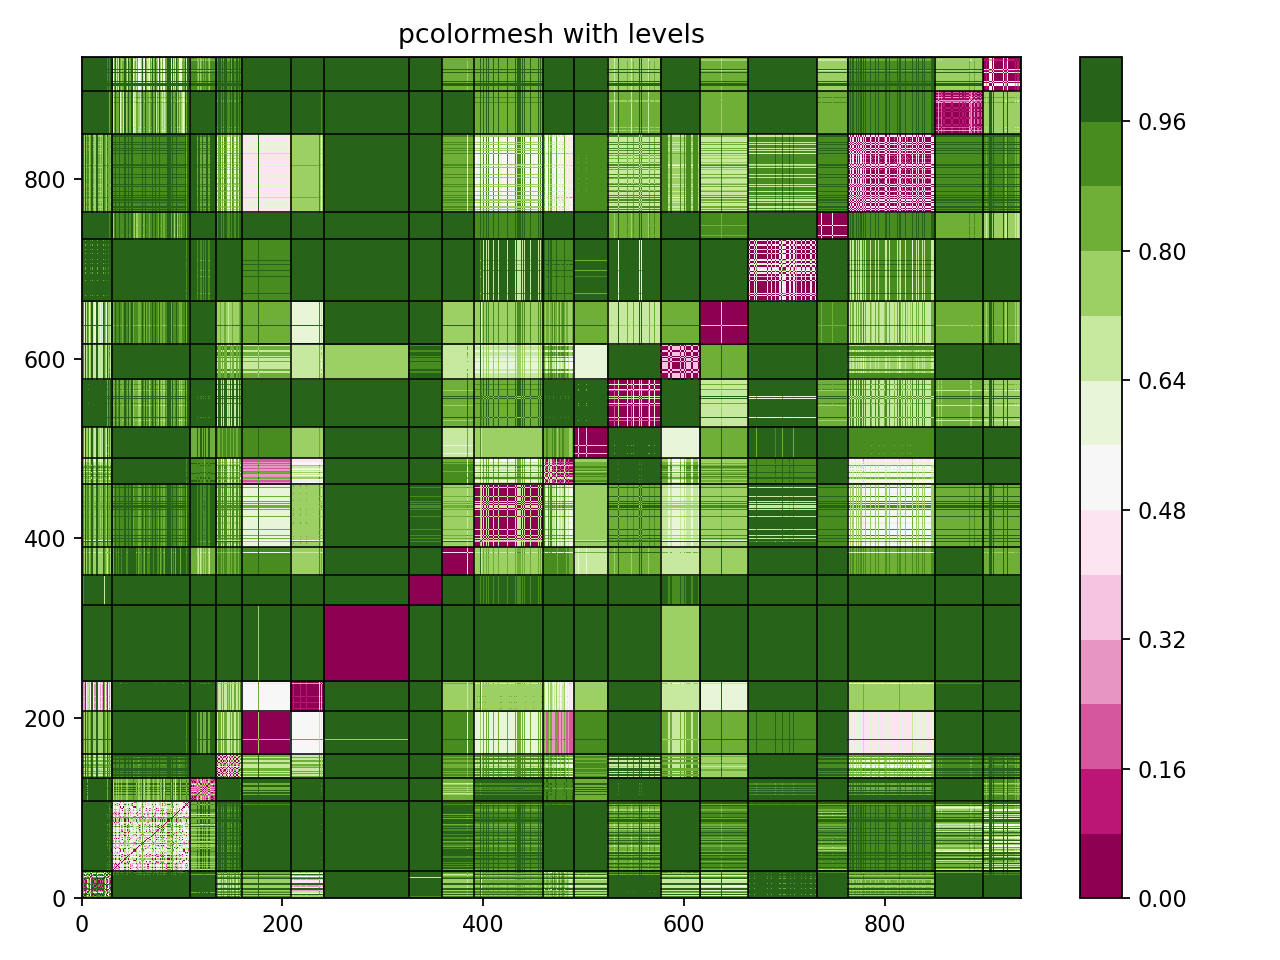

In [63]:
hists_2gram = get_hists(some_changes, hists_path=RESULTS_FOR_HIST_PATH_2GRAM, gram_path="2gram")
pearson_dists_2gram = get_dists(hists_2gram, pearsons_correlation, hist_len_2gram)
drawhist2(some_changes, pearson_dists_2gram, True, lw=0.7)

In [64]:
clustering_pearson_2gram = sklearn.cluster.DBSCAN(eps=0.48, min_samples=2, metric='precomputed').fit(pearson_dists_2gram)
print_clustering_results(clustering_pearson_2gram, some_changes)


[(3, 6789, 3), (3, 6789, 4), (3, 6789, 6), (3, 6789, 8), (3, 6789, 12), (3, 6789, 13), (3, 6789, 16), (3, 6789, 17), (3, 6789, 19), (3, 6789, 23), (3, 6789, 24), (3, 6789, 25), (3, 6789, 28), (3, 6789, 30), (3, 6789, 33), (3, 6789, 34), (3, 6789, 36), (3, 6789, 38), (5, 2013, 1), (5, 2013, 2), (5, 2013, 3), (5, 2013, 4), (5, 2013, 5), (5, 2013, 6), (5, 2013, 7), (5, 2013, 8), (5, 2013, 9), (5, 2013, 10), (5, 2013, 11), (5, 2013, 12), (5, 2013, 13), (5, 2013, 14), (5, 2013, 15), (5, 2013, 16), (5, 2013, 18), (5, 2013, 19), (5, 2013, 20), (5, 2013, 21), (5, 2013, 22), (5, 2013, 23), (5, 2013, 24), (5, 2013, 25), (5, 2013, 26), (5, 2013, 27), (5, 2013, 28), (5, 2013, 29), (5, 2013, 30), (5, 2013, 31), (5, 2013, 32), (5, 2013, 33), (5, 2013, 34), (5, 2013, 35), (5, 2013, 36), (5, 2013, 37), (5, 2013, 38), (5, 2013, 39), (5, 2013, 40), (5, 2013, 41), (5, 2013, 42), (5, 2013, 43), (5, 2013, 44), (5, 2013, 45), (5, 2013, 46), (5, 2013, 47), (5, 2013, 48), (5, 4912, 1), (5, 4912, 2), (5, 4912,

<IPython.core.display.Javascript object>


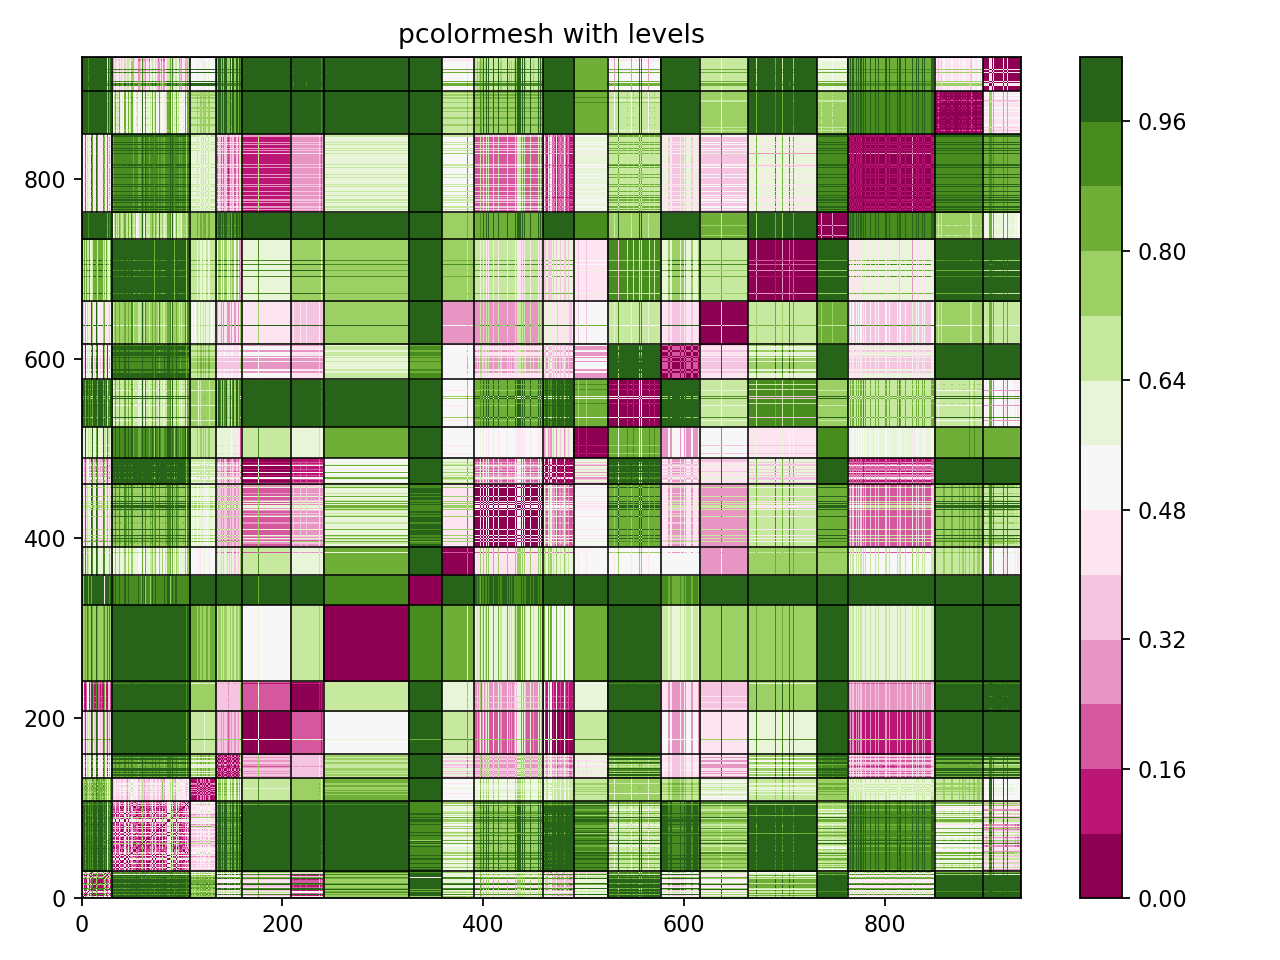

In [65]:
hists_1gram = get_hists(some_changes, hists_path=RESULTS_FOR_HIST_PATH_1GRAM, gram_path="1gram")
pearson_dists_1gram = get_dists(hists_1gram, pearsons_correlation, hist_len_1gram)
drawhist2(some_changes, pearson_dists_1gram, True, lw=0.7)

In [66]:
clustering_pearson_1gram = sklearn.cluster.DBSCAN(eps=0.2, min_samples=2, metric='precomputed').fit(pearson_dists_1gram)
print_clustering_results(clustering_pearson_1gram, some_changes)

[(3, 6789, 3), (3, 6789, 4), (3, 6789, 6), (3, 6789, 8), (3, 6789, 12), (3, 6789, 16), (3, 6789, 17), (3, 6789, 19), (3, 6789, 23), (3, 6789, 24), (3, 6789, 25), (3, 6789, 28), (3, 6789, 30), (3, 6789, 34), (3, 6789, 38), (4, 13964, 1), (4, 13964, 2), (4, 13964, 3), (4, 13964, 4), (4, 13964, 5), (4, 13964, 6), (4, 13964, 7), (4, 13964, 8), (4, 13964, 9), (4, 13964, 10), (4, 13964, 11), (4, 13964, 12), (4, 13964, 13), (4, 13964, 14), (4, 13964, 15), (4, 13964, 16), (4, 13964, 17), (4, 13964, 18), (4, 13964, 19), (4, 13964, 20), (4, 13964, 21), (4, 13964, 22), (4, 13964, 23), (4, 13964, 24), (4, 13964, 26), (5, 2013, 1), (5, 2013, 2), (5, 2013, 3), (5, 2013, 4), (5, 2013, 5), (5, 2013, 6), (5, 2013, 7), (5, 2013, 8), (5, 2013, 9), (5, 2013, 10), (5, 2013, 11), (5, 2013, 12), (5, 2013, 13), (5, 2013, 14), (5, 2013, 15), (5, 2013, 16), (5, 2013, 18), (5, 2013, 19), (5, 2013, 20), (5, 2013, 21), (5, 2013, 22), (5, 2013, 23), (5, 2013, 24), (5, 2013, 25), (5, 2013, 26), (5, 2013, 27), (5, 20

In [67]:
ind = 0

for elem in some_changes:
    print(elem, "<->", ind)
    ind += 1

(3, 6789, 3) <-> 0
(3, 6789, 4) <-> 1
(3, 6789, 5) <-> 2
(3, 6789, 6) <-> 3
(3, 6789, 7) <-> 4
(3, 6789, 8) <-> 5
(3, 6789, 9) <-> 6
(3, 6789, 10) <-> 7
(3, 6789, 12) <-> 8
(3, 6789, 13) <-> 9
(3, 6789, 14) <-> 10
(3, 6789, 15) <-> 11
(3, 6789, 16) <-> 12
(3, 6789, 17) <-> 13
(3, 6789, 19) <-> 14
(3, 6789, 21) <-> 15
(3, 6789, 22) <-> 16
(3, 6789, 23) <-> 17
(3, 6789, 24) <-> 18
(3, 6789, 25) <-> 19
(3, 6789, 28) <-> 20
(3, 6789, 30) <-> 21
(3, 6789, 31) <-> 22
(3, 6789, 32) <-> 23
(3, 6789, 33) <-> 24
(3, 6789, 34) <-> 25
(3, 6789, 35) <-> 26
(3, 6789, 36) <-> 27
(3, 6789, 37) <-> 28
(3, 6789, 38) <-> 29
(4, 1645, 1) <-> 30
(4, 1645, 2) <-> 31
(4, 1645, 3) <-> 32
(4, 1645, 4) <-> 33
(4, 1645, 5) <-> 34
(4, 1645, 6) <-> 35
(4, 1645, 7) <-> 36
(4, 1645, 8) <-> 37
(4, 1645, 9) <-> 38
(4, 1645, 10) <-> 39
(4, 1645, 11) <-> 40
(4, 1645, 12) <-> 41
(4, 1645, 14) <-> 42
(4, 1645, 15) <-> 43
(4, 1645, 16) <-> 44
(4, 1645, 17) <-> 45
(4, 1645, 18) <-> 46
(4, 1645, 19) <-> 47
(4, 1645, 20) <-> 

(8, 1486, 43) <-> 658
(8, 1486, 44) <-> 659
(8, 1486, 45) <-> 660
(8, 1486, 46) <-> 661
(8, 1486, 47) <-> 662
(8, 1486, 48) <-> 663
(8, 2266, 1) <-> 664
(8, 2266, 2) <-> 665
(8, 2266, 3) <-> 666
(8, 2266, 4) <-> 667
(8, 2266, 5) <-> 668
(8, 2266, 6) <-> 669
(8, 2266, 8) <-> 670
(8, 2266, 11) <-> 671
(8, 2266, 12) <-> 672
(8, 2266, 13) <-> 673
(8, 2266, 14) <-> 674
(8, 2266, 15) <-> 675
(8, 2266, 16) <-> 676
(8, 2266, 18) <-> 677
(8, 2266, 19) <-> 678
(8, 2266, 20) <-> 679
(8, 2266, 21) <-> 680
(8, 2266, 22) <-> 681
(8, 2266, 23) <-> 682
(8, 2266, 24) <-> 683
(8, 2266, 25) <-> 684
(8, 2266, 26) <-> 685
(8, 2266, 27) <-> 686
(8, 2266, 29) <-> 687
(8, 2266, 30) <-> 688
(8, 2266, 31) <-> 689
(8, 2266, 32) <-> 690
(8, 2266, 33) <-> 691
(8, 2266, 34) <-> 692
(8, 2266, 35) <-> 693
(8, 2266, 36) <-> 694
(8, 2266, 37) <-> 695
(8, 2266, 40) <-> 696
(8, 2266, 41) <-> 697
(8, 2266, 42) <-> 698
(8, 2266, 43) <-> 699
(8, 2266, 45) <-> 700
(8, 2266, 46) <-> 701
(8, 2266, 47) <-> 702
(8, 2266, 48) <->

In [ ]:
(8, 2266, 12) <-> 672

(8, 2266, 40) <-> 696

In [68]:
pearson_dists[672][696]
get_intersections(hists[672], hists[696])

[]

In [69]:
clustering_pearson = sklearn.cluster.DBSCAN(eps=0.8, min_samples=2, metric='precomputed').fit(dists_pearson)
print_clustering_results(clustering_pearson, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 66), (9, 6293, 43), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (9, 6293, 29), (9, 6293, 59), (9, 6293, 17), (9, 6293, 70), (9, 6293, 12), (9, 6293, 4), (9, 6293, 86), (9, 6293, 85), (9, 6293, 19), (9, 6293, 7), (9, 6293, 72), (9, 6293, 51), (9, 6293, 76), (9, 6293, 14), (9, 6293, 78), (9, 6293, 24), (9, 6293, 1), (9, 6293, 54), (9, 6293, 87), (9, 6293, 39), (9, 6293, 53), (9, 6293, 15)]
28
87


[(8, 2266, 29), (8, 2266, 74), (8, 2266, 2), (8, 2266, 24), (8, 2266, 40), (8, 2266, 68), (8, 2266, 53), (8, 2266, 37), (8, 2266, 46), (8, 2266, 88), (8, 2266, 59), (8, 2266, 94), (8, 2266, 86), (8, 2266, 45), (8, 2266, 8), (8, 2266, 43)]
16
69


[(9, 6293, 48), (9, 6293, 36), (9, 6293, 63), (9, 6293, 73), (9, 6293, 77), (9,

<IPython.core.display.Javascript object>


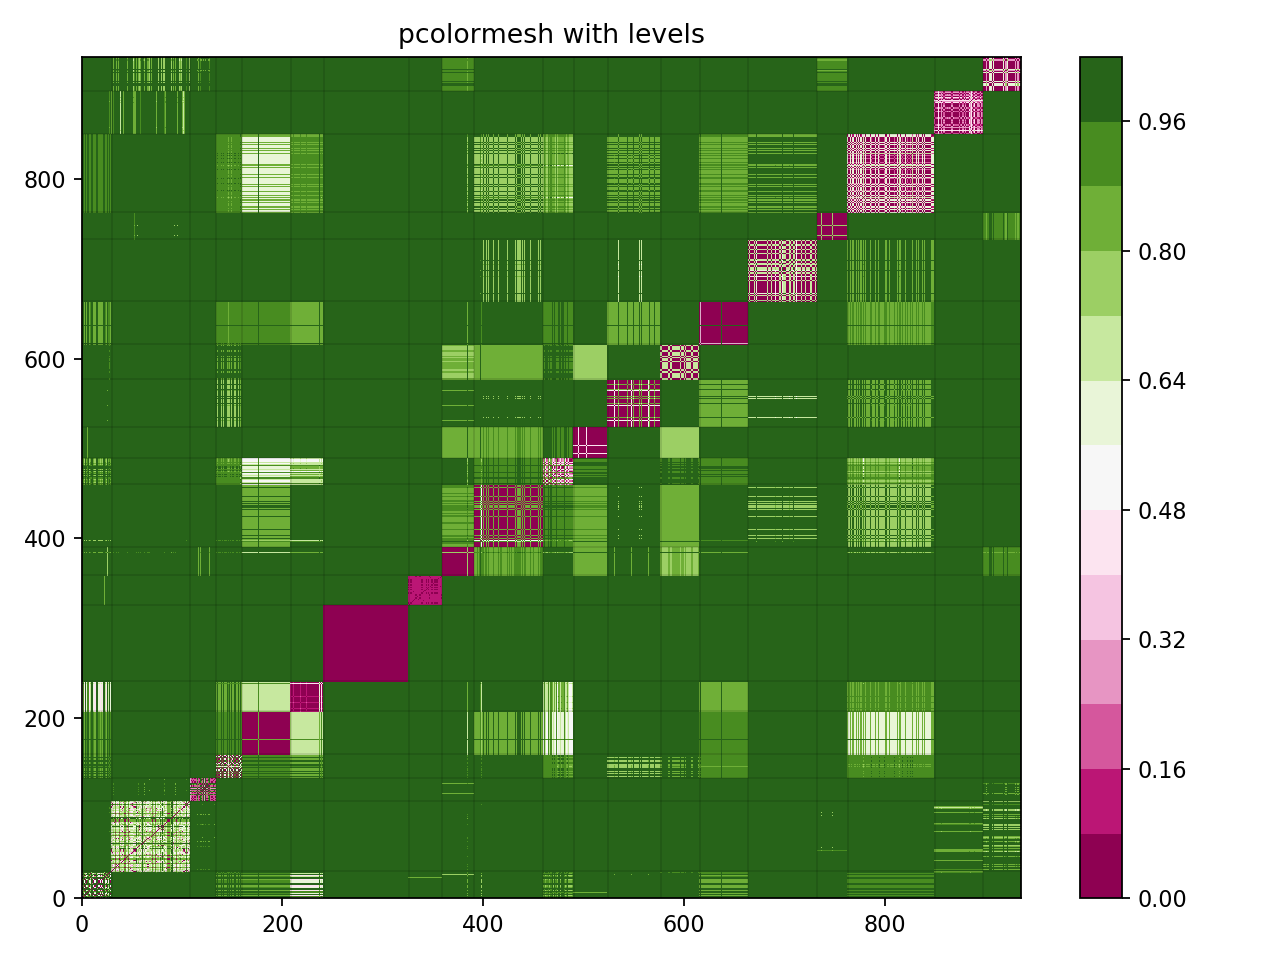

In [70]:
pearson_dists_3gram = get_dists(hists_3gram, pearsons_correlation, hist_len_3gram)
drawhist2(some_changes, pearson_dists_3gram, True)

In [71]:
# Using shuffled some_changes

shuffled_hists_3gram = get_hists(shuffled_some_changes, hists_path=RESULTS_FOR_HIST_PATH_3GRAM, gram_path="3gram")
dists_pearson_3gram = get_dists(shuffled_hists_3gram, pearsons_correlation, hist_len_3gram)

In [72]:
clustering_pearson_3gram = sklearn.cluster.DBSCAN(eps=0.65, min_samples=2, metric='precomputed').fit(dists_pearson_3gram)
print_clustering_results(clustering_pearson_3gram, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 48), (9, 6293, 36), (5, 4912, 11), (9, 6293, 66), (5, 2013, 12), (3, 6789, 3), (3, 6789, 6), (6, 4703, 13), (9, 6293, 63), (9, 6293, 73), (5, 4912, 33), (3, 6789, 30), (5, 2013, 45), (3, 6789, 8), (5, 2013, 6), (5, 2013, 7), (5, 2013, 35), (5, 2013, 9), (5, 2013, 14), (9, 6293, 77), (9, 6293, 28), (6, 4703, 17), (3, 6789, 15), (9, 6293, 61), (9, 6293, 38), (5, 2013, 20), (5, 2013, 11), (9, 6293, 50), (5, 4912, 4), (9, 6293, 69), (9, 6293, 43), (5, 4912, 18), (6, 4703, 25), (9, 6293, 71), (9, 6293, 40), (5, 4912, 32), (9, 6293, 32), (6, 4703, 24), (9, 6293, 6), (5, 2013, 8), (6, 4703, 26), (9, 6293, 52), (9, 6293, 29), (9, 6293, 55), (9, 6293, 59), (9, 6293, 8), (5, 4912, 6), (5, 4912, 24), (5, 2013, 18), (9, 6293, 4

In [73]:
clustering_pearson_3gram = sklearn.cluster.DBSCAN(eps=0.6, min_samples=2, metric='precomputed').fit(dists_pearson_3gram)
print_clustering_results(clustering_pearson_3gram, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
16
69


[(9, 6293, 10), (9, 6293, 48), (9, 6293, 36), (5, 4912, 11), (9, 6293, 66), (5, 2013, 12), (3, 6789, 3), (3, 6789, 6), (6, 4703, 13), (9, 6293, 63), (9, 6293, 73), (5, 4912, 33), (3, 6789, 30), (5, 2013, 45), (3, 6789, 8), (5, 2013, 6), (5, 2013, 7), (5, 2013, 35), (5, 2013, 9), (5, 2013, 14), (9, 6293, 77), (9, 6293, 28), (6, 4703, 17), (9, 6293, 61), (9, 6293, 38), (5, 2013, 20), (5, 2013, 11), (9, 6293, 50), (5, 4912, 4), (9, 6293, 69), (9, 6293, 43), (5, 4912, 18), (6, 4703, 25), (9, 6293, 71), (9, 6293, 40), (5, 4912, 32), (9, 6293, 32), (6, 4703, 24), (9, 6293, 6), (5, 2013, 8), (6, 4703, 26), (9, 6293, 52), (9, 6293, 29), (9, 6293, 55), (9, 6293, 59), (9, 6293, 8), (5, 4912, 6), (5, 4912, 24), (5, 2013, 18), (9, 6293, 45), (5, 4912, 1

In [ ]:
# KMeans doesn't have metric='precomputed' option (consider KMedoids from pyclustering)
'''
kmeans = sklearn.cluster.KMeans(n_clusters=30, random_state=0).fit(dists_pearson_3gram)
print_clustering_results(kmeans, shuffled_some_changes)
'''

In [74]:
agglomerative = sklearn.cluster.AgglomerativeClustering(n_clusters=20, affinity='precomputed', linkage = 'average')
agglomerative = agglomerative.fit(dists_pearson_3gram)
print_clustering_results(agglomerative, shuffled_some_changes)

[(6, 3264, 10), (8, 2266, 29), (8, 2266, 74), (6, 3264, 15), (8, 2266, 61), (6, 3264, 67), (8, 2266, 2), (8, 2266, 89), (6, 3264, 51), (6, 14981, 35), (6, 3264, 34), (8, 2266, 73), (8, 2266, 27), (8, 2266, 22), (8, 2266, 5), (6, 3264, 49), (8, 2266, 19), (8, 2266, 24), (6, 3264, 25), (8, 2266, 26), (8, 2266, 52), (8, 2266, 75), (8, 2266, 4), (6, 3264, 57), (8, 2266, 97), (8, 2266, 78), (8, 2266, 64), (8, 2266, 11), (8, 2266, 42), (6, 3264, 65), (8, 2266, 32), (8, 2266, 40), (6, 3264, 7), (8, 2266, 15), (8, 2266, 68), (8, 2266, 48), (8, 2266, 31), (8, 2266, 56), (8, 2266, 55), (8, 2266, 18), (8, 2266, 53), (8, 2266, 25), (8, 2266, 47), (8, 2266, 83), (6, 3264, 13), (8, 2266, 3), (6, 14981, 33), (8, 2266, 37), (8, 2266, 46), (6, 3264, 20), (8, 2266, 90), (8, 2266, 20), (8, 2266, 58), (8, 2266, 62), (8, 2266, 36), (6, 3264, 44), (8, 2266, 79), (8, 2266, 41), (6, 3264, 42), (8, 2266, 72), (8, 2266, 88), (8, 2266, 1), (8, 2266, 16), (8, 2266, 50), (8, 2266, 71), (8, 2266, 59), (8, 2266, 13)

In [75]:
dists_pearson_3gram_np = np.array(dists_pearson_3gram)
spectral = sklearn.cluster.SpectralClustering(n_clusters=28, affinity='precomputed', 
                        assign_labels="discretize", random_state=0).fit(dists_pearson_3gram_np.max()-dists_pearson_3gram_np)
print_clustering_results(spectral, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 7), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
17
69


[(9, 6293, 10), (9, 6293, 66), (9, 6293, 43), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (9, 6293, 29), (9, 6293, 59), (9, 6293, 17), (9, 6293, 70), (9, 6293, 12), (9, 6293, 4), (9, 6293, 86), (9, 6293, 85), (9, 6293, 19), (9, 6293, 7), (9, 6293, 72), (9, 6293, 51), (9, 6293, 76), (9, 6293, 14), (9, 6293, 78), (9, 6293, 24), (9, 6293, 1), (9, 6293, 54), (9, 6293, 87), (9, 6293, 39), (9, 6293, 53), (9, 6293, 15)]
28
87


[(8, 2266, 29), (8, 2266, 74), (8, 2266, 2), (6, 14981, 35), (8, 2266, 24), (8, 2266, 52), (8, 2266, 40), (8, 2266, 68), (8, 2266, 53), (6, 14981, 33), (8, 2266, 37), (8, 2266, 46), (8, 2266, 62), (8, 2266, 88), (8, 2266, 59), (8, 2266, 94), (8, 2266, 86), (8, 2266, 45), (8, 2266, 8), (6, 14981, 12), (8, 2266, 

In [ ]:
# MeanShift doesn't have metric='precomputed' option
'''
mean_shift = sklearn.cluster.MeanShift(bandwidth=5).fit(dists_pearson_3gram)
print_clustering_results(mean_shift, shuffled_some_changes)
'''

In [76]:
dists_pearson_3gram_np = np.array(dists_pearson_3gram)
pearson_affinity_3gram = dists_pearson_3gram_np.max() - dists_pearson_3gram_np

affinity = sklearn.cluster.AffinityPropagation(damping=0.9, affinity='precomputed').fit(pearson_affinity_3gram)
print_clustering_results(affinity, shuffled_some_changes)

[(6, 3264, 10), (6, 3264, 15), (6, 3264, 67), (6, 3264, 51), (6, 3264, 34), (6, 3264, 49), (6, 3264, 25), (6, 3264, 57), (6, 3264, 65), (6, 3264, 7), (6, 3264, 13), (6, 3264, 20), (6, 3264, 44), (6, 3264, 42), (6, 3264, 47), (6, 3264, 46), (6, 3264, 45)]
17
69


[(9, 6293, 10), (9, 6293, 66), (9, 6293, 43), (9, 6293, 40), (9, 6293, 32), (9, 6293, 6), (9, 6293, 29), (9, 6293, 59), (9, 6293, 17), (9, 6293, 70), (9, 6293, 12), (9, 6293, 4), (9, 6293, 86), (9, 6293, 85), (9, 6293, 19), (9, 6293, 7), (9, 6293, 72), (9, 6293, 51), (9, 6293, 76), (9, 6293, 14), (9, 6293, 78), (9, 6293, 24), (9, 6293, 1), (9, 6293, 54), (9, 6293, 87), (9, 6293, 39), (9, 6293, 53), (9, 6293, 15)]
28
87


[(8, 2266, 29), (8, 2266, 74), (8, 2266, 2), (8, 2266, 24), (8, 2266, 52), (8, 2266, 40), (8, 2266, 68), (8, 2266, 53), (6, 14981, 33), (8, 2266, 37), (8, 2266, 46), (8, 2266, 62), (8, 2266, 88), (8, 2266, 59), (8, 2266, 94), (8, 2266, 86), (8, 2266, 45), (8, 2266, 8), (8, 2266, 43)]


[(9, 6293, 48), (9, 6293,

<IPython.core.display.Javascript object>


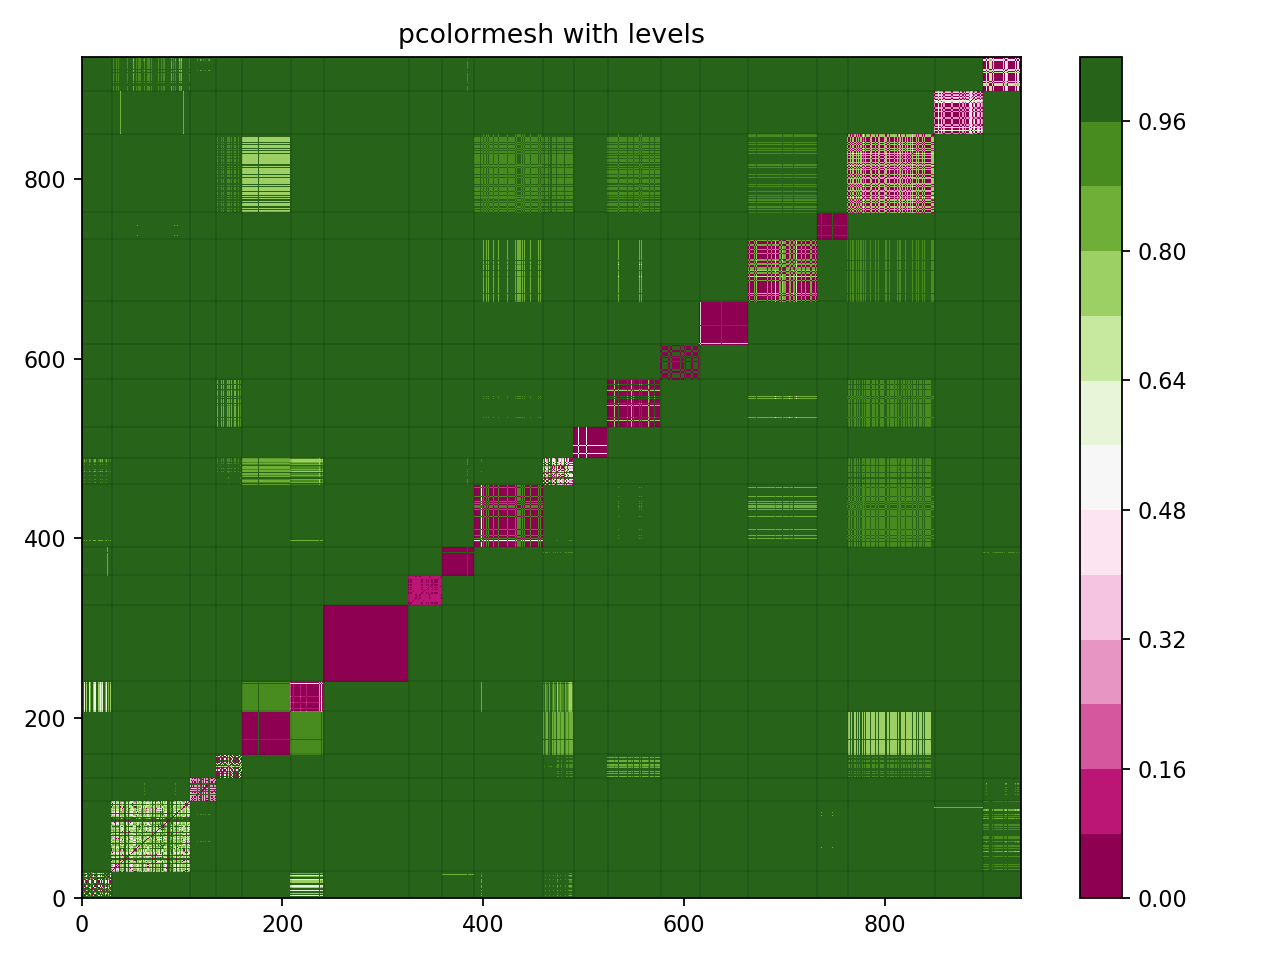

In [77]:
pearson_dists_4gram = get_dists(hists_4gram, pearsons_correlation, hist_len_4gram)
drawhist2(some_changes, pearson_dists_4gram, True)

## Exploring changes from different projects

In [ ]:
RESULTS_FOR_HIST_PATH = RESULTS_FOR_HIST_PATH_5GRAM
gram_path = "/5gram"


results_for_hist_dir = os.fsencode(RESULTS_FOR_HIST_PATH)
patterns = [os.fsdecode(el) for el in os.listdir(results_for_hist_dir) 
               if os.path.isdir(RESULTS_FOR_HIST_PATH + "/" + os.fsdecode(el)) and len(os.fsdecode(el)) < 10]
patterns = [(int(el.split(' ')[0]), int(el.split(' ')[1])) for el in patterns]
patterns.sort()

# Changes for which hists exist
read_changes_names_5gram = []

for el in tqdm_notebook(patterns):
    size, id = el[0], el[1]
    
    #if (size, id) not in set_of_patterns_with_different_projects:
    #    continue
    
    path_to_pattern = RESULTS_FOR_HIST_PATH + "/" + str(size) + " " + str(id) + gram_path
    files = [int(os.fsdecode(el)[12:-9]) for el in os.listdir(path_to_pattern) if os.fsdecode(el).startswith("sampleChange")]
    files.sort()
    
    for file in files:
        read_changes_names_5gram.append((size, id, file))
                        
print(read_changes_names_5gram)


In [79]:
# For faster computation

read_changes_names_5gram_set = set(read_changes_names_5gram)

In [ ]:
# CHECKING PATTERNS WITH DIFFERENT PROJECTS

# We consider only changes for which hist exists

patterns_path = "/Users/aliscafo/Downloads/CPatMiner-master 2/SemanticChangeGraphMiner/output/patterns/repos-hybrid/1"

patterns_dir = os.fsencode(patterns_path)
sorted_size_dirs = [int(os.fsdecode(el)) for el in os.listdir(patterns_dir) if os.fsdecode(el).isnumeric()]
sorted_size_dirs.sort()

final_ok_num = 0
all_patterns = 0

set_of_patterns_with_different_projects = set()
changes_with_different_projects = []

for size_dir in sorted_size_dirs:
    size_dir_str = str(size_dir)
    sorted_id_dirs = [int(os.fsdecode(el)) for el in os.listdir(patterns_path + os.sep + size_dir_str) if os.fsdecode(el).isnumeric()]
    sorted_id_dirs.sort()
            
    num_ids = 0

    for id_dir in sorted_id_dirs:
        path = patterns_path + os.sep + size_dir_str + os.sep + str(id_dir) + os.sep + "details.html"

        num_ids += 1
        
        if not os.path.exists(path):
            continue

        with open(path, 'r', encoding="latin-1") as file:
            content = file.read()
                    
        last_ind = 0
        
        print(size_dir_str, str(id_dir))
        
        all_patterns += 1
        
        set_of_projects = set()
        
        num_change = 0
        
        while True:
            num_change += 1
            
            start = 0
            end = 0
            
            try:
                start = content.index("<div id='method'>", last_ind) + len("<div id='method'>") 
                end = content.index("</div><BR>", start)
            except:
                break
            
            name = content[start:end]
            parts = name.split(',')
            project_name = parts[0]
            file_name = parts[2]
            nickname = project_name.split('/')[0]
            
            last_ind = end
            
            print(project_name)
            
            change_tuple = (size_dir, id_dir, num_change)
            
            if project_name not in set_of_projects and change_tuple in read_changes_names_5gram_set and "src/test/java" not in file_name:
                print("Added", change_tuple)
                set_of_projects.add(project_name)
                changes_with_different_projects.append((size_dir, id_dir, num_change))
        
        print(len(set_of_projects))
        if len(set_of_projects) > 1:
            final_ok_num += 1
            set_of_patterns_with_different_projects.add((size_dir, id_dir))
            print("OK")
        elif len(set_of_projects) == 1:
            changes_with_different_projects.pop()
            

print(final_ok_num)
print(all_patterns)


In [81]:
percent = len(set_of_patterns_with_different_projects) / all_patterns
print(len(set_of_patterns_with_different_projects), str(percent * 100) + " %")

print(len(changes_with_different_projects))

1692 20.33898305084746 %
4651


In [82]:
pattern_to_remained_num_projects = collections.defaultdict(int)

for el in changes_with_different_projects:
    pattern_to_remained_num_projects[(el[0], el[1])] += 1
    
# read changes with different projects which was filtered so that length of patterns is more than 1
real_changes_projects = [el for el in changes_with_different_projects
                if pattern_to_remained_num_projects[(el[0], el[1])] > 1]

print(len(real_changes_projects))

4651


In [83]:
sorted_dict_projects = {k: v for k, v in sorted(pattern_to_remained_num_projects.items(), key=lambda item: item[1], reverse=True)}
print(list(sorted_dict_projects.items())[:100])


[((4, 1645), 54), ((5, 2065), 20), ((5, 4237), 13), ((6, 784), 11), ((3, 12991), 10), ((6, 6635), 10), ((3, 2556), 9), ((5, 3117), 9), ((5, 5266), 9), ((5, 10237), 9), ((3, 15195), 8), ((4, 4652), 8), ((5, 1904), 8), ((5, 9144), 8), ((5, 9446), 8), ((6, 815), 8), ((6, 10572), 8), ((3, 3069), 7), ((3, 3080), 7), ((3, 3237), 7), ((3, 5939), 7), ((3, 6476), 7), ((3, 10773), 7), ((3, 13635), 7), ((4, 5012), 7), ((4, 14747), 7), ((5, 6346), 7), ((5, 9633), 7), ((5, 12527), 7), ((5, 14373), 7), ((6, 6369), 7), ((6, 10044), 7), ((6, 14162), 7), ((6, 14860), 7), ((7, 6974), 7), ((7, 11638), 7), ((3, 874), 6), ((3, 2177), 6), ((3, 2206), 6), ((3, 3756), 6), ((3, 4256), 6), ((3, 4970), 6), ((3, 5629), 6), ((3, 9219), 6), ((4, 4280), 6), ((4, 9682), 6), ((4, 9917), 6), ((4, 10244), 6), ((4, 13305), 6), ((4, 14225), 6), ((5, 2555), 6), ((5, 9818), 6), ((5, 10220), 6), ((5, 10893), 6), ((5, 11149), 6), ((5, 13829), 6), ((6, 543), 6), ((6, 889), 6), ((6, 5764), 6), ((6, 6937), 6), ((6, 12209), 6), (

In [84]:
tops = list(sorted_dict_projects.items())[:40]
tops2 = list(sorted_dict_projects.items())[40:80]
tops3 = list(sorted_dict_projects.items())[80:130]
tops4 = list(sorted_dict_projects.items())[130:160]
print(tops)
print("\n")
print(tops2)
print("\n")
print(tops3)
print("\n")
print(tops4)
selected_patterns = [el[0] for el in tops]
selected_patterns2 = [el[0] for el in tops2]
selected_patterns3 = [el[0] for el in tops3]
selected_patterns4 = [el[0] for el in tops4]

[((4, 1645), 54), ((5, 2065), 20), ((5, 4237), 13), ((6, 784), 11), ((3, 12991), 10), ((6, 6635), 10), ((3, 2556), 9), ((5, 3117), 9), ((5, 5266), 9), ((5, 10237), 9), ((3, 15195), 8), ((4, 4652), 8), ((5, 1904), 8), ((5, 9144), 8), ((5, 9446), 8), ((6, 815), 8), ((6, 10572), 8), ((3, 3069), 7), ((3, 3080), 7), ((3, 3237), 7), ((3, 5939), 7), ((3, 6476), 7), ((3, 10773), 7), ((3, 13635), 7), ((4, 5012), 7), ((4, 14747), 7), ((5, 6346), 7), ((5, 9633), 7), ((5, 12527), 7), ((5, 14373), 7), ((6, 6369), 7), ((6, 10044), 7), ((6, 14162), 7), ((6, 14860), 7), ((7, 6974), 7), ((7, 11638), 7), ((3, 874), 6), ((3, 2177), 6), ((3, 2206), 6), ((3, 3756), 6)]


[((3, 4256), 6), ((3, 4970), 6), ((3, 5629), 6), ((3, 9219), 6), ((4, 4280), 6), ((4, 9682), 6), ((4, 9917), 6), ((4, 10244), 6), ((4, 13305), 6), ((4, 14225), 6), ((5, 2555), 6), ((5, 9818), 6), ((5, 10220), 6), ((5, 10893), 6), ((5, 11149), 6), ((5, 13829), 6), ((6, 543), 6), ((6, 889), 6), ((6, 5764), 6), ((6, 6937), 6), ((6, 12209), 6)

In [85]:
some_patterns_proj = selected_patterns

some_changes_proj = [el for el in real_changes_projects if (el[0], el[1]) in some_patterns_proj and
                (el[0], el[1]) != (14, 1319)]
print(len(some_changes_proj))

367


In [86]:
some_patterns_proj2 = selected_patterns2

some_changes_proj2 = [el for el in real_changes_projects if (el[0], el[1]) in some_patterns_proj2 and
                (el[0], el[1]) != (14, 1319)]
print(len(some_changes_proj2))

236


In [87]:
some_patterns_proj3 = selected_patterns3

some_changes_proj3 = [el for el in real_changes_projects if (el[0], el[1]) in some_patterns_proj3 and
                (el[0], el[1]) != (14, 1319)]
print(len(some_changes_proj3))

237


In [88]:
some_patterns_proj4 = selected_patterns4

some_changes_proj4 = [el for el in real_changes_projects if (el[0], el[1]) in some_patterns_proj4 and
                (el[0], el[1]) != (14, 1319)]
print(len(some_changes_proj4))

120


In [89]:
tops5 = list(sorted_dict_projects.items())[160:200]
print(tops5, '\n')
selected_patterns5 = [el[0] for el in tops5]

some_patterns_proj5 = selected_patterns5

some_changes_proj5 = [el for el in real_changes_projects if (el[0], el[1]) in some_patterns_proj5 and
                (el[0], el[1]) != (14, 1319)]
print(len(some_changes_proj5))





# Counting patterns' positions on the chart

some_changes_proj_nums5 = []

i = 0
n = len(some_changes_proj5)
common_sum_proj5 = 0

while (i < n):
    j = i
    while j < n and (some_changes_proj5[i][0], some_changes_proj5[i][1]) == (some_changes_proj5[j][0], some_changes_proj5[j][1]):
        j += 1
    common_sum_proj5 += (j - i)
    some_changes_proj_nums5.append(((some_changes_proj5[i][0], some_changes_proj5[i][1]), j - i, i))
    i = j
    
    

[((4, 8690), 4), ((4, 9019), 4), ((4, 9362), 4), ((4, 10155), 4), ((4, 10828), 4), ((4, 11631), 4), ((4, 11677), 4), ((4, 12139), 4), ((4, 12155), 4), ((4, 12440), 4), ((4, 12753), 4), ((4, 13510), 4), ((4, 13597), 4), ((4, 13695), 4), ((4, 14300), 4), ((4, 14726), 4), ((4, 14811), 4), ((5, 86), 4), ((5, 264), 4), ((5, 1085), 4), ((5, 1889), 4), ((5, 2583), 4), ((5, 2869), 4), ((5, 3498), 4), ((5, 3524), 4), ((5, 3569), 4), ((5, 3660), 4), ((5, 3691), 4), ((5, 4159), 4), ((5, 4353), 4), ((5, 5015), 4), ((5, 5121), 4), ((5, 5515), 4), ((5, 5547), 4), ((5, 5584), 4), ((5, 6137), 4), ((5, 6381), 4), ((5, 6505), 4), ((5, 7487), 4), ((5, 7513), 4)] 

160


In [90]:
tops6 = list(sorted_dict_projects.items())[200:1300]
tops6 = [el for el in tops6 if int(el[0][0]) >= 9]

print(tops6, '\n')
selected_patterns6 = [el[0] for el in tops6]

some_patterns_proj6 = selected_patterns6

some_changes_proj6 = [el for el in real_changes_projects if (el[0], el[1]) in some_patterns_proj6 and
                (el[0], el[1]) != (14, 1319)]
print(len(some_changes_proj6))





# Counting patterns' positions on the chart

some_changes_proj_nums6 = []

i = 0
n = len(some_changes_proj6)
common_sum_proj6 = 0

while (i < n):
    j = i
    while j < n and (some_changes_proj6[i][0], some_changes_proj6[i][1]) == (some_changes_proj6[j][0], some_changes_proj6[j][1]):
        j += 1
    common_sum_proj6 += (j - i)
    some_changes_proj_nums6.append(((some_changes_proj6[i][0], some_changes_proj6[i][1]), j - i, i))
    i = j
    
    

[((9, 10783), 4), ((9, 13659), 4), ((13, 4774), 4), ((15, 5879), 4), ((15, 13381), 4), ((9, 132), 3), ((9, 713), 3), ((9, 1093), 3), ((9, 2813), 3), ((9, 3297), 3), ((9, 4723), 3), ((9, 6993), 3), ((9, 7485), 3), ((9, 9859), 3), ((9, 11380), 3), ((9, 11627), 3), ((9, 11926), 3), ((9, 12224), 3), ((9, 12587), 3), ((9, 13616), 3), ((9, 14088), 3), ((9, 14800), 3), ((10, 292), 3), ((10, 1113), 3), ((10, 1356), 3), ((10, 1755), 3), ((10, 2336), 3), ((10, 2732), 3), ((10, 3161), 3), ((10, 4742), 3), ((10, 4885), 3), ((10, 6441), 3), ((10, 10818), 3), ((10, 11337), 3), ((11, 4267), 3), ((11, 8292), 3), ((12, 8887), 3), ((12, 9895), 3), ((12, 14920), 3), ((13, 13891), 3), ((15, 2712), 3), ((15, 6539), 3), ((15, 7062), 3), ((15, 7972), 3), ((15, 10648), 3), ((15, 12354), 3), ((16, 7766), 3), ((16, 10802), 3), ((18, 10762), 3), ((19, 9933), 3), ((21, 2114), 3), ((22, 5923), 3), ((25, 14513), 3), ((26, 7684), 3), ((50, 705), 3)] 

170


In [91]:
# Counting patterns' positions on the chart

some_changes_proj_nums = []

i = 0
n = len(some_changes_proj)
common_sum_proj = 0

while (i < n):
    j = i
    while j < n and (some_changes_proj[i][0], some_changes_proj[i][1]) == (some_changes_proj[j][0], some_changes_proj[j][1]):
        j += 1
    common_sum_proj += (j - i)
    some_changes_proj_nums.append(((some_changes_proj[i][0], some_changes_proj[i][1]), j - i, i))
    i = j

In [92]:
some_changes_proj_nums

[((3, 874), 6, 0),
 ((3, 2177), 6, 6),
 ((3, 2206), 6, 12),
 ((3, 2556), 9, 18),
 ((3, 3069), 7, 27),
 ((3, 3080), 7, 34),
 ((3, 3237), 7, 41),
 ((3, 3756), 6, 48),
 ((3, 5939), 7, 54),
 ((3, 6476), 7, 61),
 ((3, 10773), 7, 68),
 ((3, 12991), 10, 75),
 ((3, 13635), 7, 85),
 ((3, 15195), 8, 92),
 ((4, 1645), 54, 100),
 ((4, 4652), 8, 154),
 ((4, 5012), 7, 162),
 ((4, 14747), 7, 169),
 ((5, 1904), 8, 176),
 ((5, 2065), 20, 184),
 ((5, 3117), 9, 204),
 ((5, 4237), 13, 213),
 ((5, 5266), 9, 226),
 ((5, 6346), 7, 235),
 ((5, 9144), 8, 242),
 ((5, 9446), 8, 250),
 ((5, 9633), 7, 258),
 ((5, 10237), 9, 265),
 ((5, 12527), 7, 274),
 ((5, 14373), 7, 281),
 ((6, 784), 11, 288),
 ((6, 815), 8, 299),
 ((6, 6369), 7, 307),
 ((6, 6635), 10, 314),
 ((6, 10044), 7, 324),
 ((6, 10572), 8, 331),
 ((6, 14162), 7, 339),
 ((6, 14860), 7, 346),
 ((7, 6974), 7, 353),
 ((7, 11638), 7, 360)]

In [93]:
# Counting patterns' positions on the chart

some_changes_proj_nums2 = []

i = 0
n = len(some_changes_proj2)
common_sum_proj2 = 0

while (i < n):
    j = i
    while j < n and (some_changes_proj2[i][0], some_changes_proj2[i][1]) == (some_changes_proj2[j][0], some_changes_proj2[j][1]):
        j += 1
    common_sum_proj2 += (j - i)
    some_changes_proj_nums2.append(((some_changes_proj2[i][0], some_changes_proj2[i][1]), j - i, i))
    i = j

In [94]:
some_changes_proj_nums2

[((3, 207), 5, 0),
 ((3, 2658), 5, 5),
 ((3, 4256), 6, 10),
 ((3, 4970), 6, 16),
 ((3, 5629), 6, 22),
 ((3, 6120), 5, 28),
 ((3, 6808), 5, 33),
 ((3, 9219), 6, 38),
 ((4, 4280), 6, 44),
 ((4, 9682), 6, 50),
 ((4, 9917), 6, 56),
 ((4, 10244), 6, 62),
 ((4, 13305), 6, 68),
 ((4, 14225), 6, 74),
 ((5, 2555), 6, 80),
 ((5, 9818), 6, 86),
 ((5, 10220), 6, 92),
 ((5, 10893), 6, 98),
 ((5, 11149), 6, 104),
 ((5, 13829), 6, 110),
 ((6, 543), 6, 116),
 ((6, 889), 6, 122),
 ((6, 5764), 6, 128),
 ((6, 6937), 6, 134),
 ((6, 12209), 6, 140),
 ((7, 841), 6, 146),
 ((7, 892), 6, 152),
 ((7, 6093), 6, 158),
 ((8, 10809), 6, 164),
 ((9, 4011), 6, 170),
 ((9, 12637), 6, 176),
 ((10, 2848), 6, 182),
 ((10, 6489), 6, 188),
 ((13, 3304), 6, 194),
 ((13, 8959), 6, 200),
 ((13, 13228), 6, 206),
 ((19, 8828), 6, 212),
 ((19, 11964), 6, 218),
 ((21, 3149), 6, 224),
 ((27, 4304), 6, 230)]

In [95]:
# Counting patterns' positions on the chart

some_changes_proj_nums3 = []

i = 0
n = len(some_changes_proj3)
common_sum_proj3 = 0

while (i < n):
    j = i
    while j < n and (some_changes_proj3[i][0], some_changes_proj3[i][1]) == (some_changes_proj3[j][0], some_changes_proj3[j][1]):
        j += 1
    common_sum_proj3 += (j - i)
    some_changes_proj_nums3.append(((some_changes_proj3[i][0], some_changes_proj3[i][1]), j - i, i))
    i = j

In [96]:
some_changes_proj_nums3

[((3, 94), 4, 0),
 ((3, 818), 4, 4),
 ((3, 1394), 4, 8),
 ((3, 1941), 4, 12),
 ((3, 2023), 4, 16),
 ((3, 2058), 4, 20),
 ((3, 2150), 4, 24),
 ((3, 2212), 4, 28),
 ((3, 3337), 4, 32),
 ((3, 3365), 4, 36),
 ((3, 3521), 4, 40),
 ((3, 3967), 4, 44),
 ((3, 4708), 4, 48),
 ((3, 11728), 5, 52),
 ((3, 12246), 5, 57),
 ((3, 13558), 5, 62),
 ((3, 14330), 5, 67),
 ((4, 2772), 5, 72),
 ((4, 2909), 5, 77),
 ((4, 3084), 5, 82),
 ((4, 4133), 5, 87),
 ((4, 4404), 5, 92),
 ((4, 4582), 5, 97),
 ((4, 6915), 5, 102),
 ((4, 6954), 5, 107),
 ((4, 7618), 5, 112),
 ((4, 9213), 5, 117),
 ((4, 9306), 5, 122),
 ((4, 10254), 5, 127),
 ((4, 11057), 5, 132),
 ((4, 11491), 5, 137),
 ((4, 12485), 5, 142),
 ((4, 12924), 5, 147),
 ((4, 12982), 5, 152),
 ((5, 2496), 5, 157),
 ((5, 2649), 5, 162),
 ((5, 3919), 5, 167),
 ((5, 7538), 5, 172),
 ((5, 11714), 5, 177),
 ((5, 15231), 5, 182),
 ((6, 4024), 5, 187),
 ((6, 6772), 5, 192),
 ((6, 13596), 5, 197),
 ((6, 14447), 5, 202),
 ((6, 14512), 5, 207),
 ((6, 14648), 5, 212),
 

In [97]:
# Counting patterns' positions on the chart

some_changes_proj_nums4 = []

i = 0
n = len(some_changes_proj4)
common_sum_proj4 = 0

while (i < n):
    j = i
    while j < n and (some_changes_proj4[i][0], some_changes_proj4[i][1]) == (some_changes_proj4[j][0], some_changes_proj4[j][1]):
        j += 1
    common_sum_proj4 += (j - i)
    some_changes_proj_nums4.append(((some_changes_proj4[i][0], some_changes_proj4[i][1]), j - i, i))
    i = j

In [98]:
hists_proj = get_hists(some_changes_proj, hists_path=RESULTS_FOR_HIST_PATH_5GRAM, gram_path="5gram")

<IPython.core.display.Javascript object>


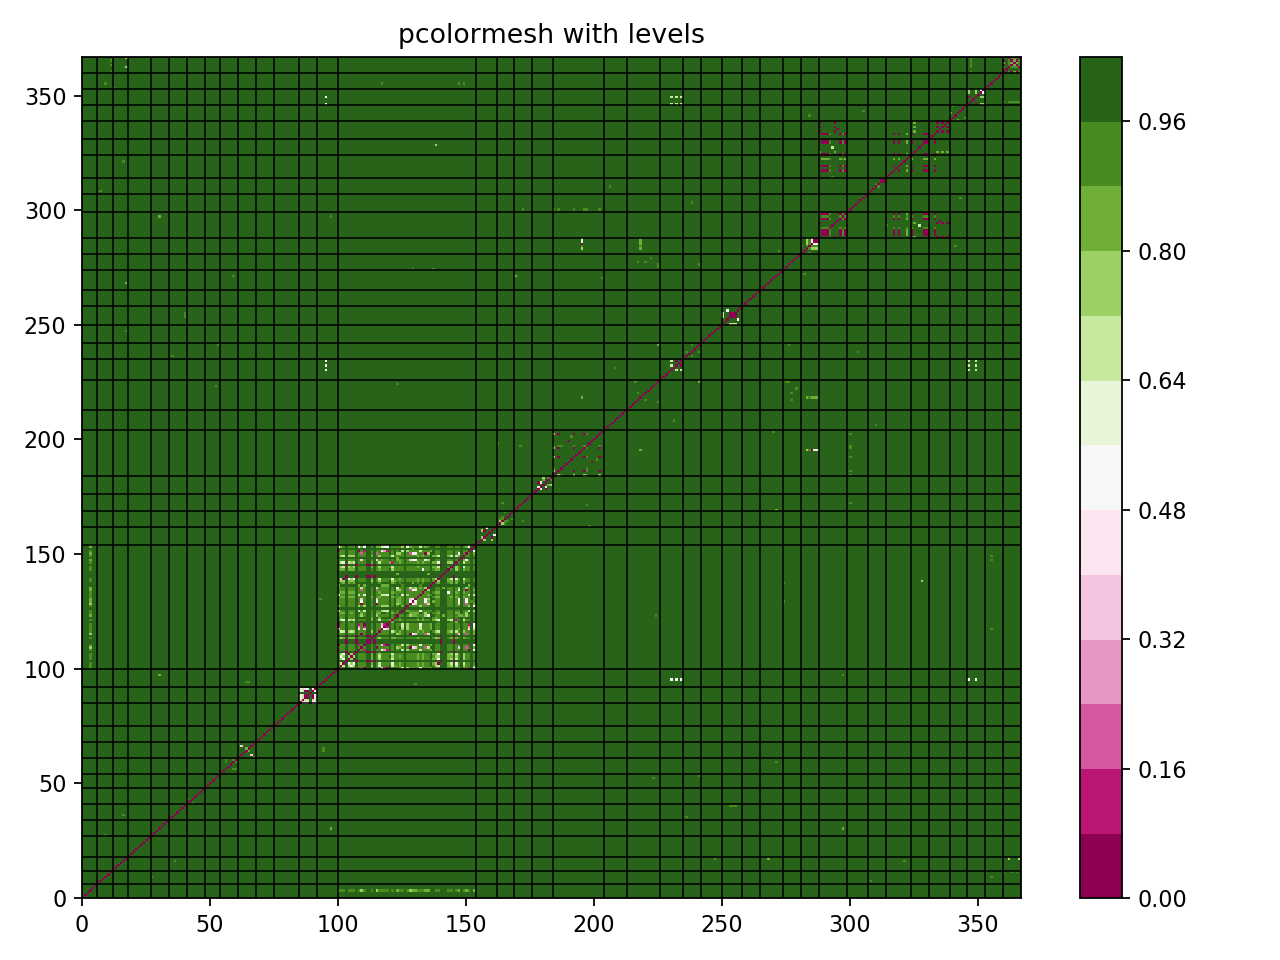

In [99]:
canberra_dists_proj = get_dists(hists_proj, canberra_metric, hist_len_5gram)
drawhist2(some_changes_proj, canberra_dists_proj, True, lw=0.7)

<IPython.core.display.Javascript object>


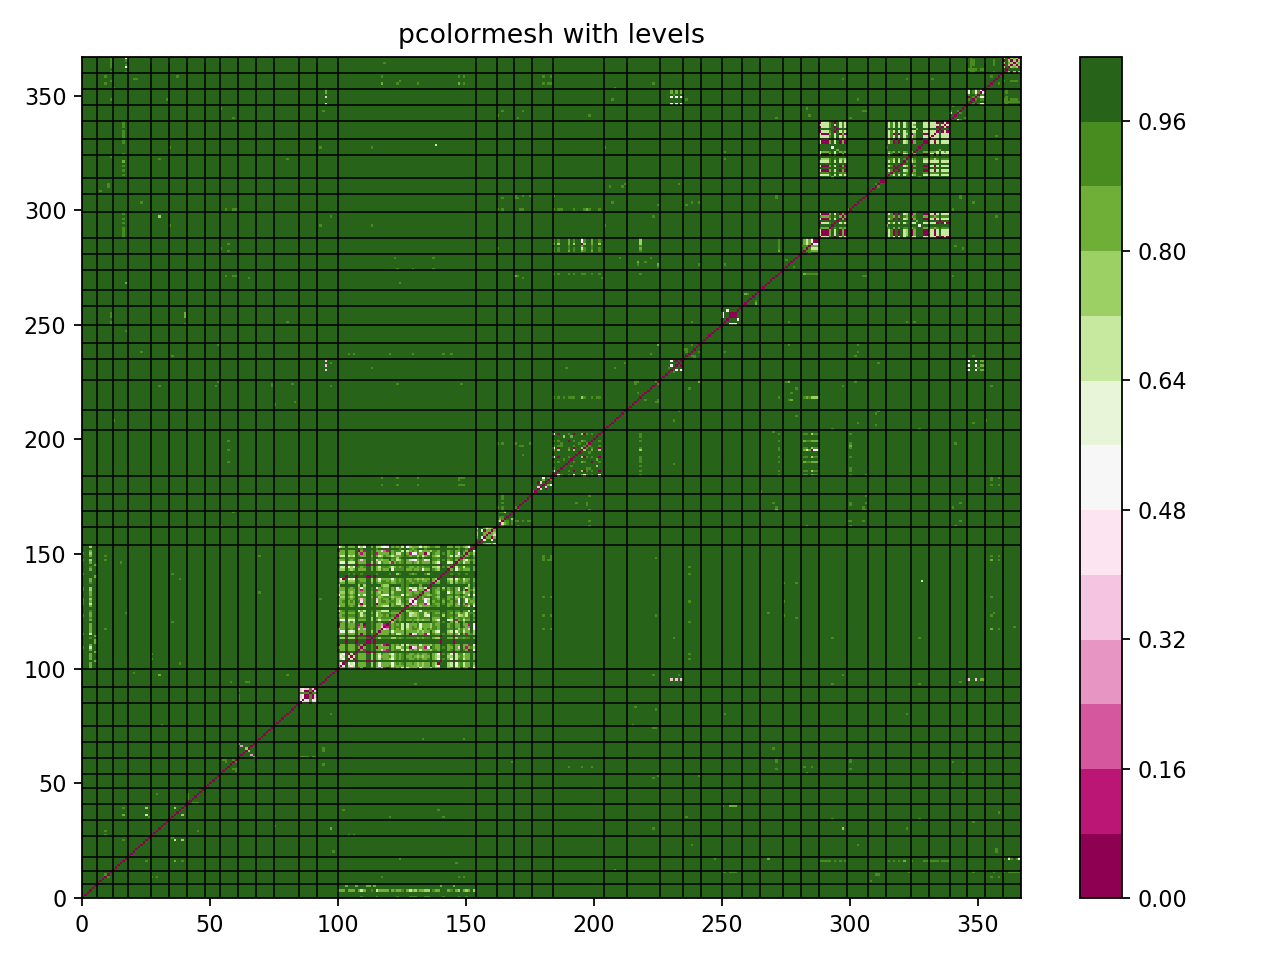

In [100]:
hists_proj_4gram = get_hists(some_changes_proj, hists_path=RESULTS_FOR_HIST_PATH_4GRAM, gram_path="4gram")
canberra_dists_proj_4gram = get_dists(hists_proj_4gram, canberra_metric, hist_len_4gram)
drawhist2(some_changes_proj, canberra_dists_proj_4gram, True, lw=0.7)

<IPython.core.display.Javascript object>


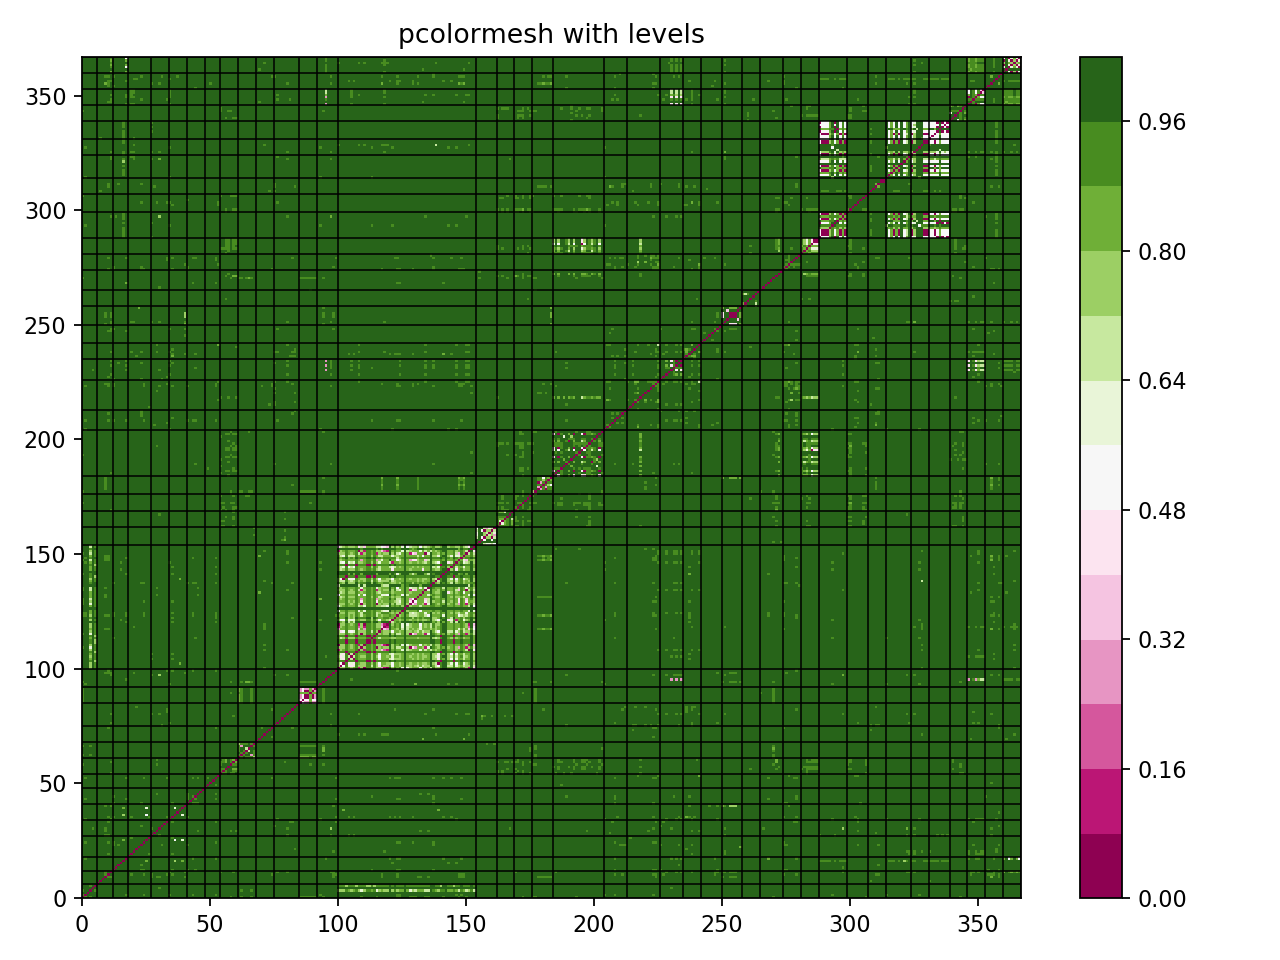

In [101]:
hists_proj_3gram = get_hists(some_changes_proj, hists_path=RESULTS_FOR_HIST_PATH_3GRAM, gram_path="3gram")
canberra_dists_proj_3gram = get_dists(hists_proj_3gram, canberra_metric, hist_len_3gram)
drawhist2(some_changes_proj, canberra_dists_proj_3gram, True, lw=0.7)

<IPython.core.display.Javascript object>


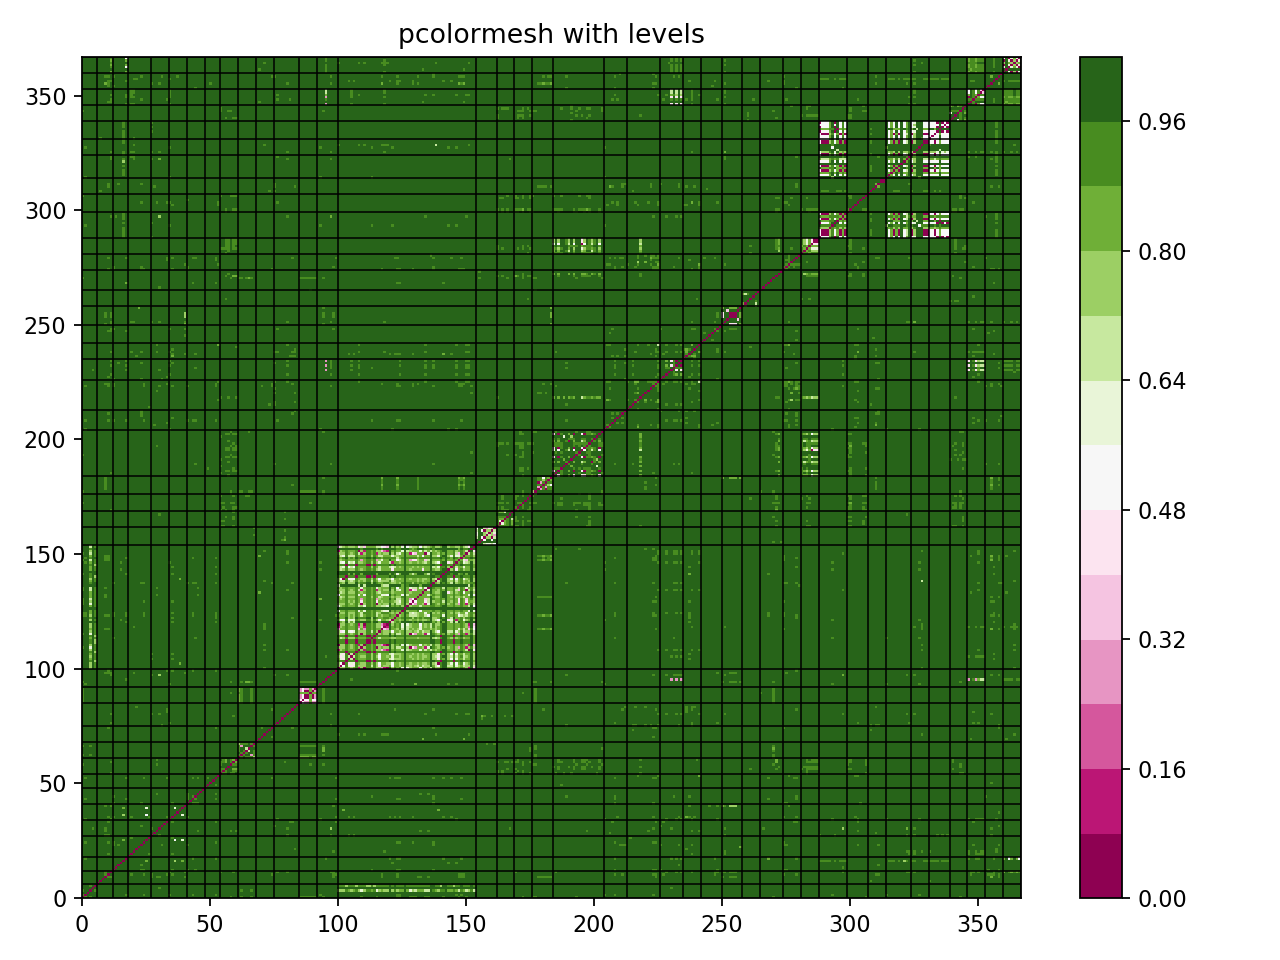

In [102]:
hists_proj_3gram = get_hists(some_changes_proj, hists_path=RESULTS_FOR_HIST_PATH_3GRAM, gram_path="3gram")
canberra_dists_proj_3gram = get_dists(hists_proj_3gram, canberra_metric, hist_len_3gram)
drawhist2(some_changes_proj, canberra_dists_proj_3gram, True, lw=0.7)

In [103]:
clustering_canb_3gram = sklearn.cluster.DBSCAN(eps=0.6, min_samples=2, metric='precomputed').fit(canberra_dists_proj_3gram)
print_clustering_results(clustering_canb_3gram, some_changes_proj)


[(3, 2206, 7), (7, 11638, 1), (7, 11638, 4), (7, 11638, 7), (7, 11638, 9), (7, 11638, 11)]


[(3, 2556, 12), (3, 3080, 4), (3, 3080, 7)]


[(3, 6476, 2), (3, 6476, 7)]
2
7


[(3, 13635, 1), (3, 13635, 2), (3, 13635, 11), (3, 13635, 15), (3, 13635, 29), (3, 13635, 30)]
6
7


[(3, 15195, 6), (5, 5266, 6), (5, 5266, 12), (5, 5266, 16), (6, 14860, 1), (6, 14860, 7), (6, 14860, 10), (6, 14860, 11)]


[(4, 1645, 1), (4, 1645, 10), (4, 1645, 12), (4, 1645, 14), (4, 1645, 20), (4, 1645, 24), (4, 1645, 25), (4, 1645, 26), (4, 1645, 30), (4, 1645, 31), (4, 1645, 32), (4, 1645, 36), (4, 1645, 37), (4, 1645, 39), (4, 1645, 41), (4, 1645, 44), (4, 1645, 47), (4, 1645, 48), (4, 1645, 70), (4, 1645, 73), (4, 1645, 74), (4, 1645, 79)]
22
54


[(4, 1645, 2), (4, 1645, 4), (4, 1645, 6), (4, 1645, 7), (4, 1645, 8), (4, 1645, 22), (4, 1645, 28), (4, 1645, 45), (4, 1645, 57), (4, 1645, 65), (4, 1645, 66), (4, 1645, 68), (4, 1645, 72)]
13
54


[(4, 1645, 5), (4, 1645, 9), (4, 1645, 15), (4, 1645, 16), (4, 1

<IPython.core.display.Javascript object>


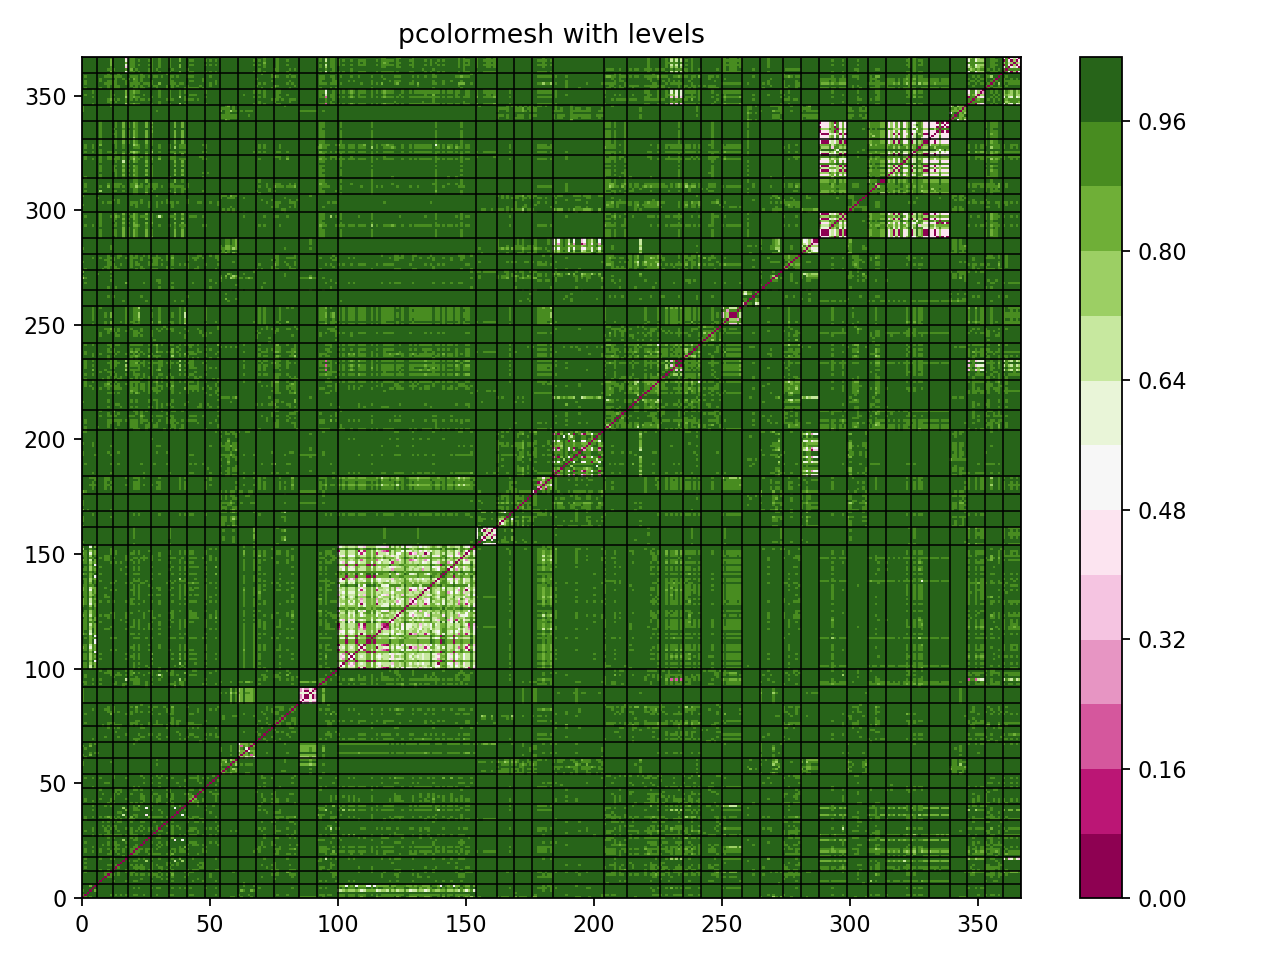

In [104]:
hists_proj_2gram = get_hists(some_changes_proj, hists_path=RESULTS_FOR_HIST_PATH_2GRAM, gram_path="2gram")
canberra_dists_proj_2gram = get_dists(hists_proj_2gram, canberra_metric, hist_len_2gram)
drawhist2(some_changes_proj, canberra_dists_proj_2gram, True, lw=0.7)

In [105]:
clustering_canb_2gram = sklearn.cluster.DBSCAN(eps=0.7, min_samples=2, metric='precomputed').fit(canberra_dists_proj_2gram)
print_clustering_results(clustering_canb_2gram, some_changes_proj)


[(3, 874, 4), (3, 3069, 5), (3, 15195, 8), (4, 1645, 1), (4, 1645, 2), (4, 1645, 4), (4, 1645, 6), (4, 1645, 7), (4, 1645, 8), (4, 1645, 10), (4, 1645, 12), (4, 1645, 14), (4, 1645, 17), (4, 1645, 20), (4, 1645, 22), (4, 1645, 24), (4, 1645, 25), (4, 1645, 26), (4, 1645, 27), (4, 1645, 28), (4, 1645, 29), (4, 1645, 30), (4, 1645, 31), (4, 1645, 32), (4, 1645, 36), (4, 1645, 37), (4, 1645, 39), (4, 1645, 41), (4, 1645, 42), (4, 1645, 44), (4, 1645, 45), (4, 1645, 47), (4, 1645, 48), (4, 1645, 53), (4, 1645, 55), (4, 1645, 56), (4, 1645, 57), (4, 1645, 62), (4, 1645, 65), (4, 1645, 66), (4, 1645, 68), (4, 1645, 70), (4, 1645, 71), (4, 1645, 72), (4, 1645, 73), (4, 1645, 74), (4, 1645, 79), (5, 1904, 5), (5, 1904, 8), (6, 784, 1), (6, 784, 2), (6, 784, 3), (6, 784, 4), (6, 784, 7), (6, 784, 9), (6, 784, 13), (6, 784, 21), (6, 784, 25), (6, 784, 26), (6, 6635, 2), (6, 6635, 4), (6, 6635, 5), (6, 6635, 6), (6, 6635, 8), (6, 6635, 9), (6, 10044, 2), (6, 10044, 4), (6, 10044, 7), (6, 10044, 8

<IPython.core.display.Javascript object>


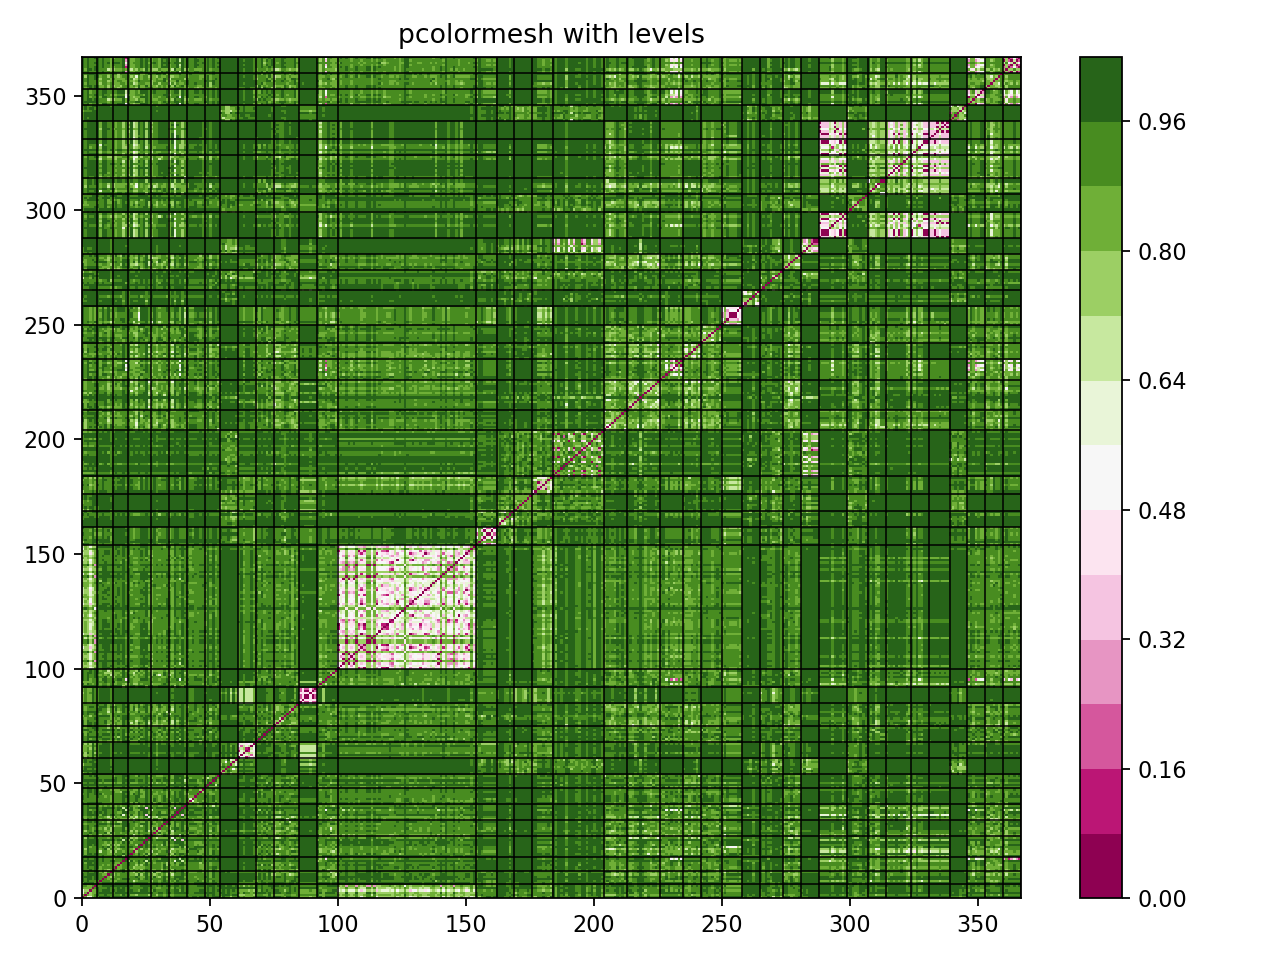

In [106]:
hists_proj_1gram = get_hists(some_changes_proj, hists_path=RESULTS_FOR_HIST_PATH_1GRAM, gram_path="1gram")
canberra_dists_proj_1gram = get_dists(hists_proj_1gram, canberra_metric, hist_len_1gram)
drawhist2(some_changes_proj, canberra_dists_proj_1gram, True, lw=0.7)

In [107]:
clustering_canb_1gram = sklearn.cluster.DBSCAN(eps=0.58, min_samples=2, metric='precomputed').fit(canberra_dists_proj_1gram)
print_clustering_results(clustering_canb_1gram, some_changes_proj)


[(3, 874, 4), (4, 1645, 1), (4, 1645, 2), (4, 1645, 4), (4, 1645, 6), (4, 1645, 7), (4, 1645, 8), (4, 1645, 10), (4, 1645, 12), (4, 1645, 14), (4, 1645, 17), (4, 1645, 20), (4, 1645, 22), (4, 1645, 24), (4, 1645, 25), (4, 1645, 26), (4, 1645, 27), (4, 1645, 28), (4, 1645, 29), (4, 1645, 30), (4, 1645, 31), (4, 1645, 32), (4, 1645, 36), (4, 1645, 37), (4, 1645, 39), (4, 1645, 41), (4, 1645, 42), (4, 1645, 44), (4, 1645, 45), (4, 1645, 47), (4, 1645, 48), (4, 1645, 53), (4, 1645, 55), (4, 1645, 56), (4, 1645, 57), (4, 1645, 62), (4, 1645, 65), (4, 1645, 66), (4, 1645, 68), (4, 1645, 70), (4, 1645, 71), (4, 1645, 72), (4, 1645, 73), (4, 1645, 74), (4, 1645, 79)]


[(3, 874, 6), (4, 1645, 5), (4, 1645, 9), (4, 1645, 15), (4, 1645, 16), (4, 1645, 19), (4, 1645, 33), (4, 1645, 59), (4, 1645, 67)]


[(3, 2177, 2), (3, 2206, 6), (3, 2206, 7), (3, 2556, 4), (3, 2556, 6), (3, 2556, 12), (3, 2556, 14), (3, 3080, 4), (3, 3080, 6), (3, 3080, 7), (3, 15195, 6), (5, 3117, 2), (5, 3117, 3), (5, 3117, 

In [108]:
clustering_pearson_1gram = sklearn.cluster.DBSCAN(eps=0.6, min_samples=2, metric='precomputed').fit(canberra_dists_proj_1gram)
print_clustering_results(clustering_pearson_1gram, some_changes_proj)


[(3, 874, 1), (3, 874, 4), (3, 2177, 2), (3, 2206, 6), (3, 2206, 7), (3, 2556, 4), (3, 2556, 6), (3, 2556, 12), (3, 2556, 14), (3, 3080, 4), (3, 3080, 6), (3, 3080, 7), (3, 15195, 6), (4, 1645, 1), (4, 1645, 2), (4, 1645, 4), (4, 1645, 6), (4, 1645, 7), (4, 1645, 8), (4, 1645, 10), (4, 1645, 12), (4, 1645, 14), (4, 1645, 17), (4, 1645, 20), (4, 1645, 22), (4, 1645, 24), (4, 1645, 25), (4, 1645, 26), (4, 1645, 27), (4, 1645, 28), (4, 1645, 29), (4, 1645, 30), (4, 1645, 31), (4, 1645, 32), (4, 1645, 36), (4, 1645, 37), (4, 1645, 39), (4, 1645, 41), (4, 1645, 42), (4, 1645, 44), (4, 1645, 45), (4, 1645, 47), (4, 1645, 48), (4, 1645, 53), (4, 1645, 55), (4, 1645, 56), (4, 1645, 57), (4, 1645, 62), (4, 1645, 65), (4, 1645, 66), (4, 1645, 68), (4, 1645, 70), (4, 1645, 71), (4, 1645, 72), (4, 1645, 73), (4, 1645, 74), (4, 1645, 79), (5, 3117, 2), (5, 3117, 3), (5, 3117, 5), (5, 4237, 4), (5, 4237, 5), (5, 4237, 9), (5, 4237, 10), (5, 4237, 19), (5, 5266, 3), (5, 5266, 6), (5, 5266, 8), (5, 52

<IPython.core.display.Javascript object>


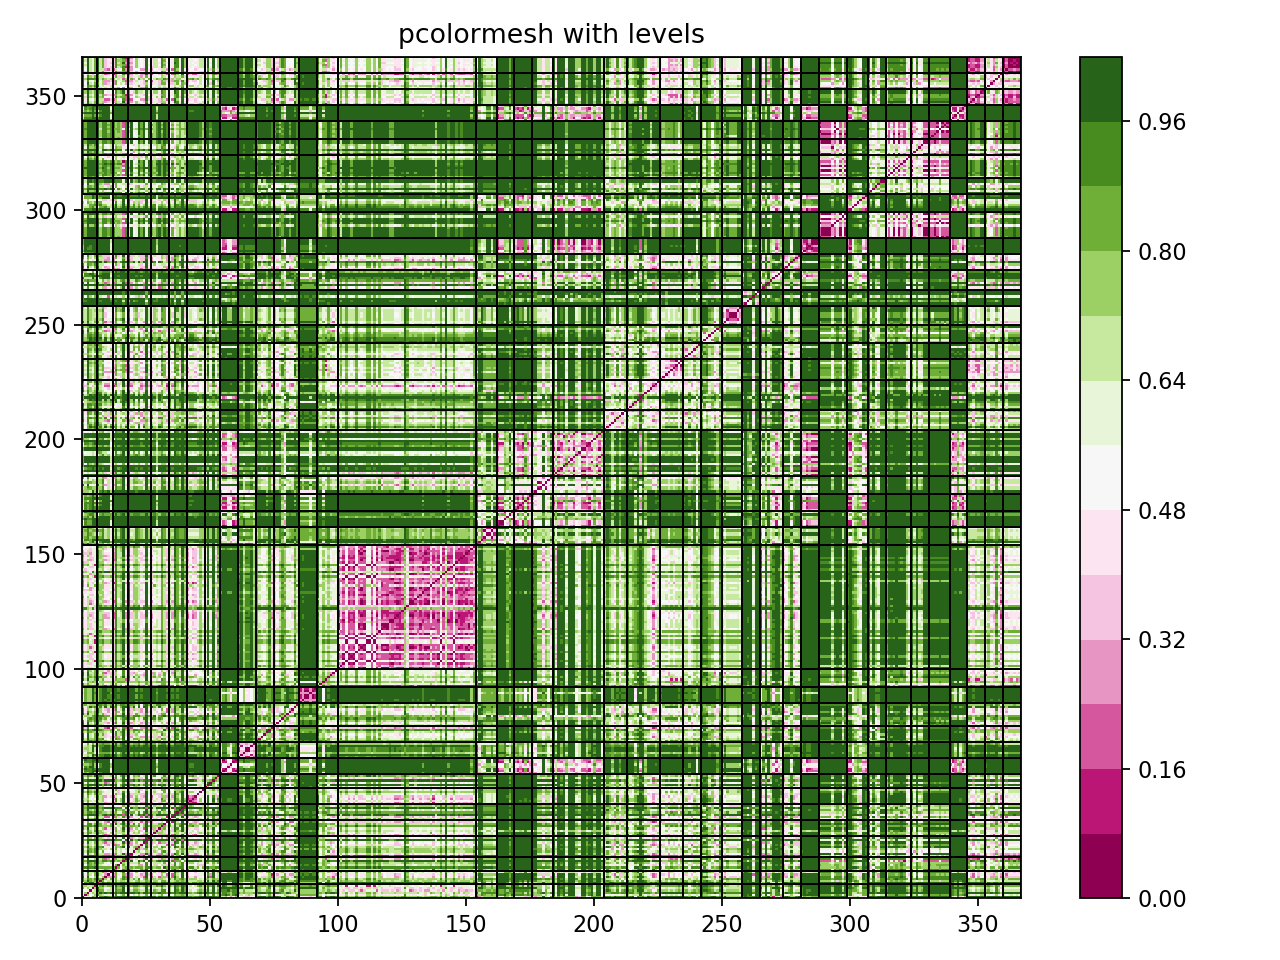

In [109]:
pearsons_dists_proj_1gram = get_dists(hists_proj_1gram, pearsons_correlation, hist_len_1gram)
drawhist2(some_changes_proj, pearsons_dists_proj_1gram, True, lw=0.9)

In [110]:
hists_proj2 = get_hists(some_changes_proj2, hists_path=RESULTS_FOR_HIST_PATH_5GRAM, gram_path="5gram")

<IPython.core.display.Javascript object>


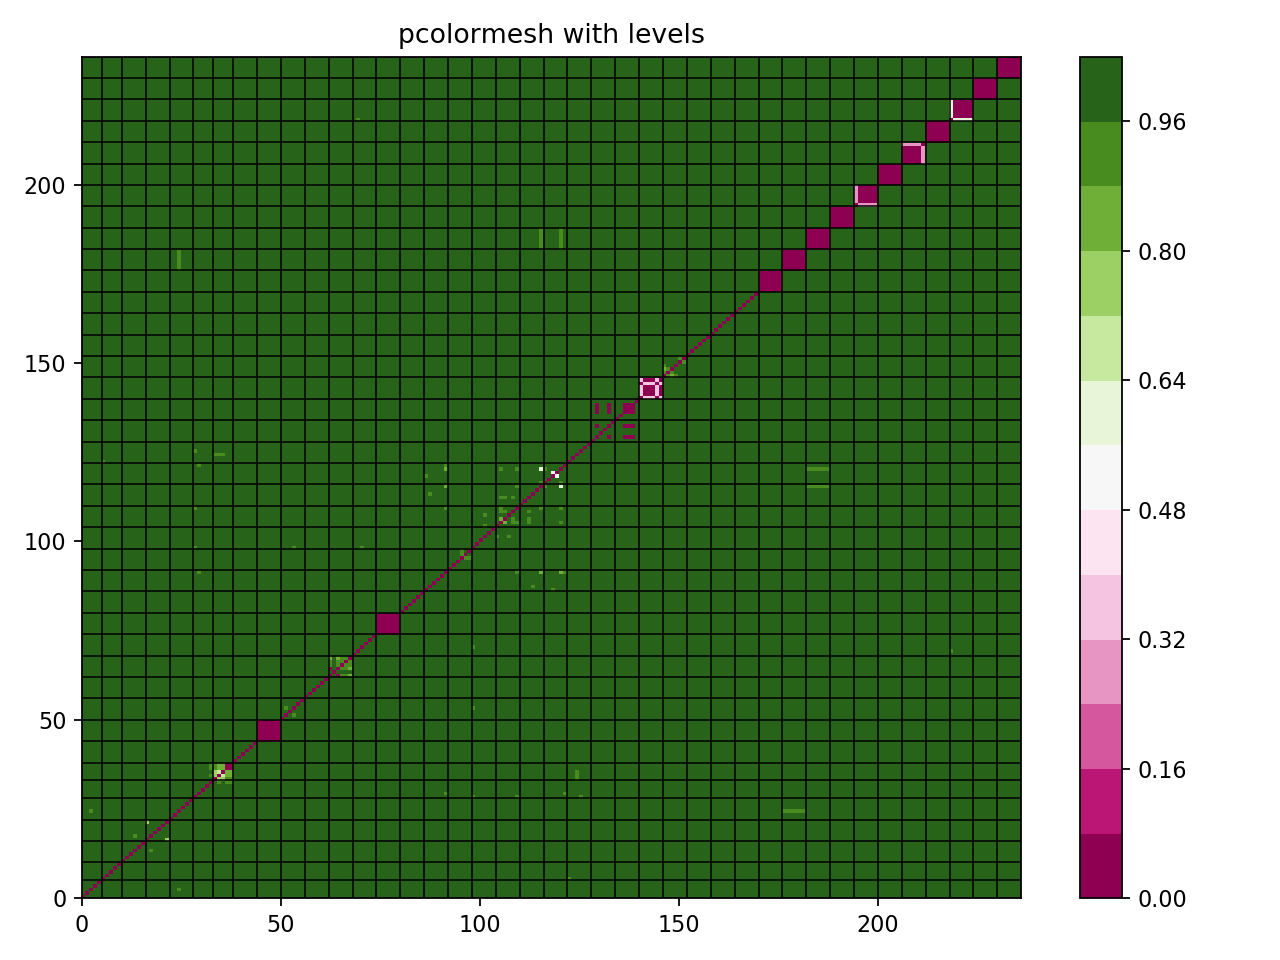

In [111]:
canberra_dists_proj2 = get_dists(hists_proj2, canberra_metric, hist_len_5gram)
drawhist2(some_changes_proj2, canberra_dists_proj2, True, lw=0.7)

<IPython.core.display.Javascript object>


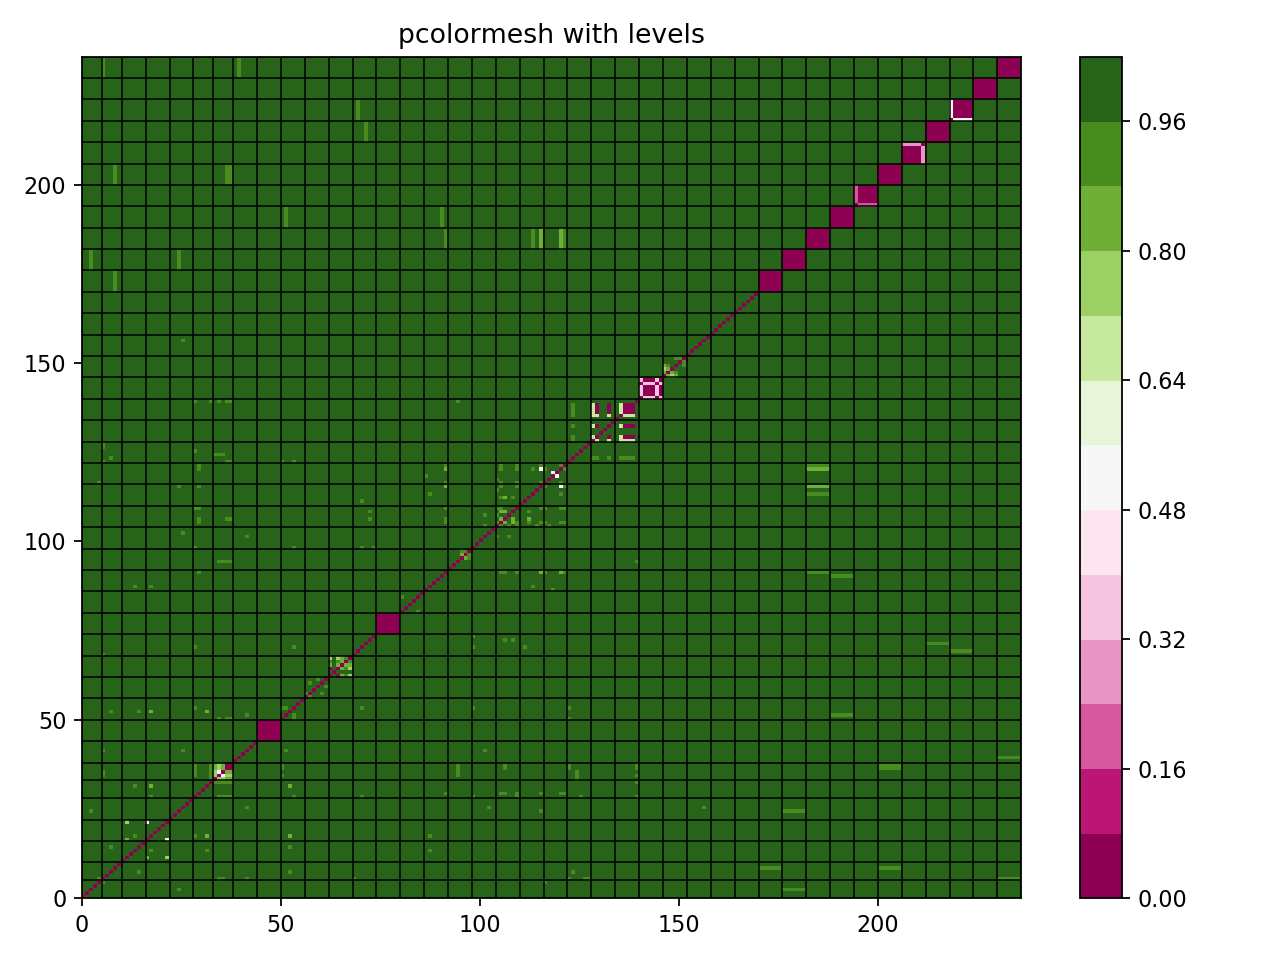

In [112]:
hists_proj2_4gram = get_hists(some_changes_proj2, hists_path=RESULTS_FOR_HIST_PATH_4GRAM, gram_path="4gram")
canberra_dists_proj2_4gram = get_dists(hists_proj2_4gram, canberra_metric, hist_len_4gram)
drawhist2(some_changes_proj2, canberra_dists_proj2_4gram, True, lw=0.7)

<IPython.core.display.Javascript object>


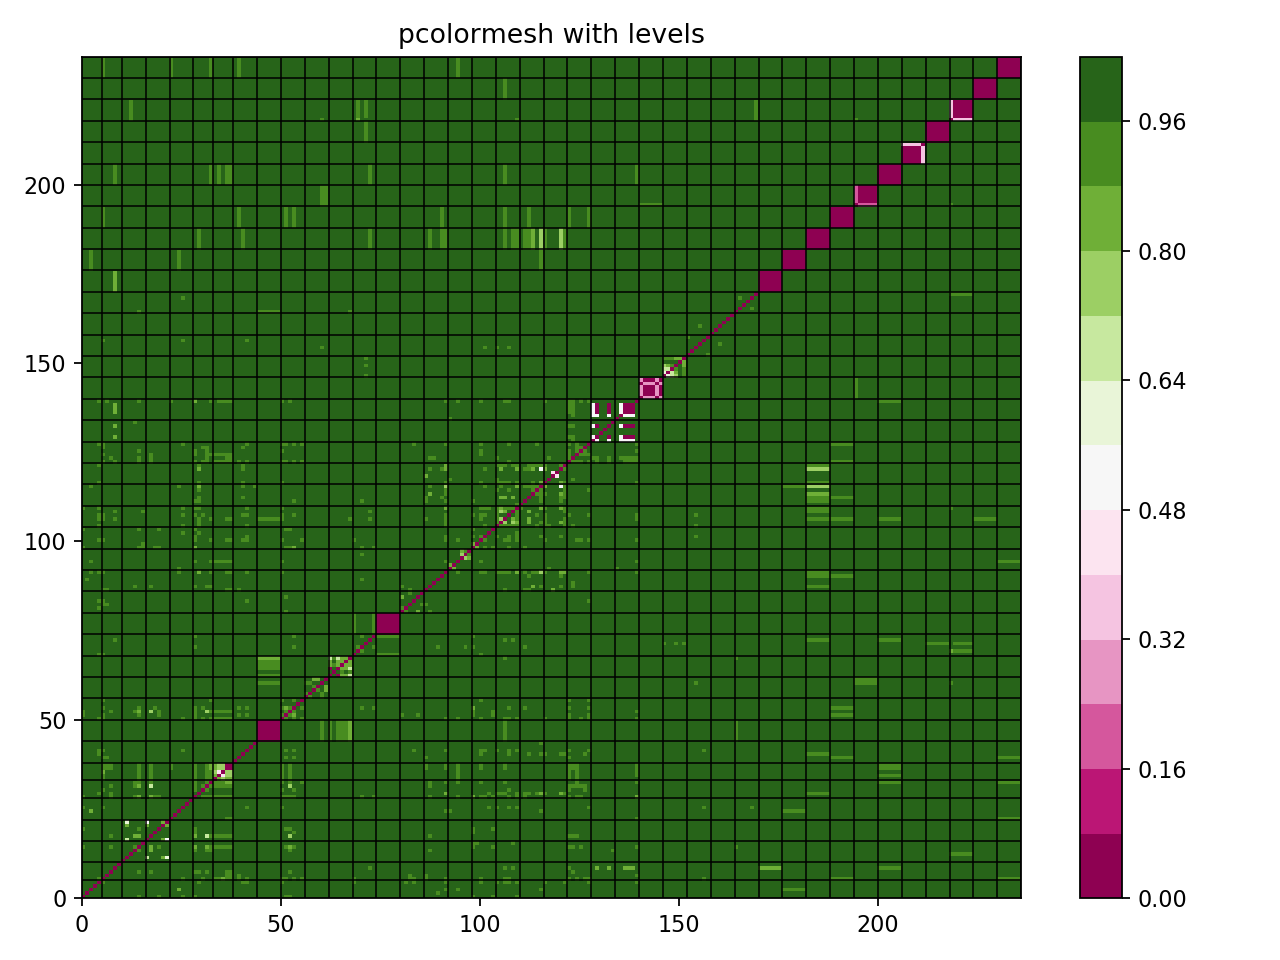

In [113]:
hists_proj2_3gram = get_hists(some_changes_proj2, hists_path=RESULTS_FOR_HIST_PATH_3GRAM, gram_path="3gram")
canberra_dists_proj2_3gram = get_dists(hists_proj2_3gram, canberra_metric, hist_len_3gram)
drawhist2(some_changes_proj2, canberra_dists_proj2_3gram, True, lw=0.7)

In [114]:
clustering_canb_proj2_2gram = sklearn.cluster.DBSCAN(eps=0.4, min_samples=2, metric='precomputed').fit(canberra_dists_proj2_3gram)
print_clustering_results(clustering_canb_proj2_2gram, some_changes_proj2)


[(3, 6808, 6), (3, 6808, 8)]
2
5


[(4, 4280, 1), (4, 4280, 2), (4, 4280, 3), (4, 4280, 4), (4, 4280, 5), (4, 4280, 6)]
6
6


[(4, 10244, 2), (4, 10244, 4)]
2
6


[(4, 14225, 1), (4, 14225, 2), (4, 14225, 3), (4, 14225, 4), (4, 14225, 5), (4, 14225, 6)]
6
6


[(6, 5764, 3), (6, 5764, 6), (6, 6937, 3), (6, 6937, 5), (6, 6937, 6)]


[(6, 12209, 1), (6, 12209, 2), (6, 12209, 3), (6, 12209, 7), (6, 12209, 8), (6, 12209, 10)]
6
6


[(9, 4011, 1), (9, 4011, 2), (9, 4011, 3), (9, 4011, 4), (9, 4011, 5), (9, 4011, 6)]
6
6


[(9, 12637, 1), (9, 12637, 2), (9, 12637, 3), (9, 12637, 4), (9, 12637, 5), (9, 12637, 6)]
6
6


[(10, 2848, 1), (10, 2848, 2), (10, 2848, 3), (10, 2848, 4), (10, 2848, 5), (10, 2848, 6)]
6
6


[(10, 6489, 1), (10, 6489, 2), (10, 6489, 3), (10, 6489, 4), (10, 6489, 5), (10, 6489, 6)]
6
6


[(13, 3304, 1), (13, 3304, 2), (13, 3304, 3), (13, 3304, 4), (13, 3304, 5), (13, 3304, 6)]
6
6


[(13, 8959, 1), (13, 8959, 2), (13, 8959, 4), (13, 8959, 5), (13, 8959, 7), (13, 8959, 9)]

<IPython.core.display.Javascript object>


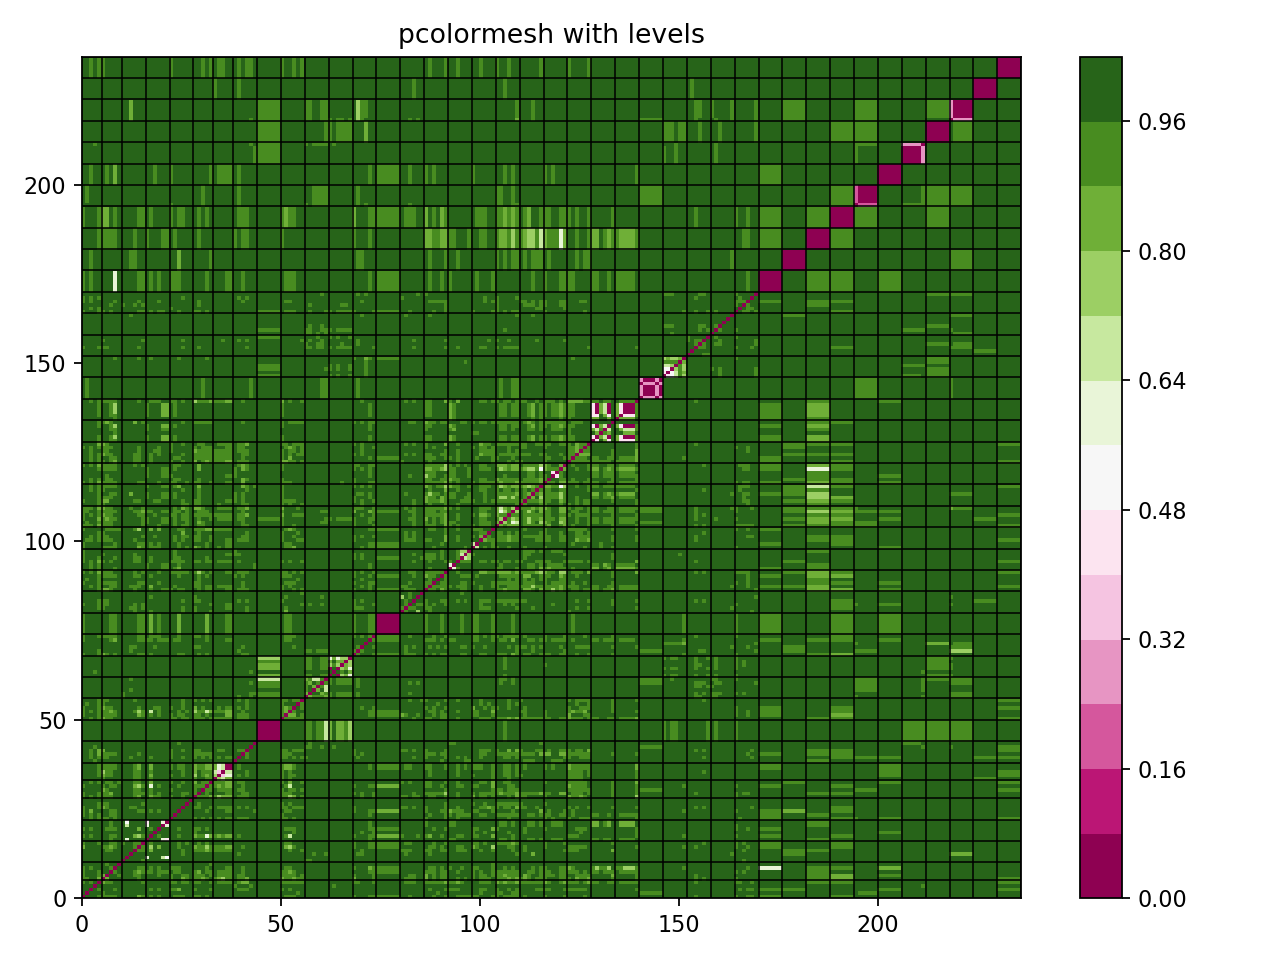

In [115]:
hists_proj2_2gram = get_hists(some_changes_proj2, hists_path=RESULTS_FOR_HIST_PATH_2GRAM, gram_path="2gram")
canberra_dists_proj2_2gram = get_dists(hists_proj2_2gram, canberra_metric, hist_len_2gram)
drawhist2(some_changes_proj2, canberra_dists_proj2_2gram, True, lw=0.7)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


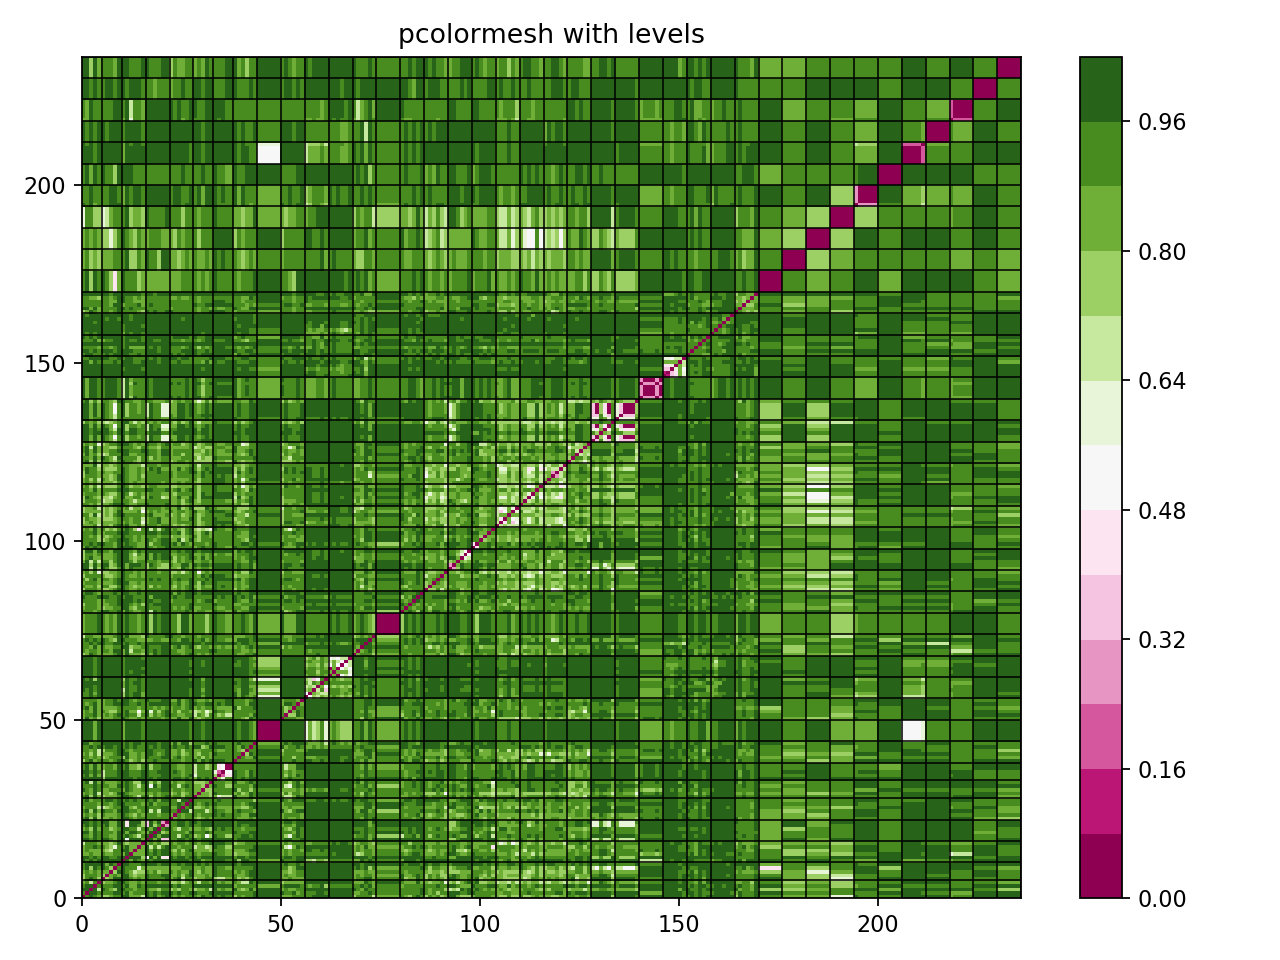

In [116]:
hists_proj2_1gram = get_hists(some_changes_proj2, hists_path=RESULTS_FOR_HIST_PATH_1GRAM, gram_path="1gram")
canberra_dists_proj2_1gram = get_dists(hists_proj2_1gram, canberra_metric, hist_len_1gram)
drawhist2(some_changes_proj2, canberra_dists_proj2_1gram, True, lw=0.7)

In [117]:
hists_proj3_3gram = get_hists(some_changes_proj3, hists_path=RESULTS_FOR_HIST_PATH_3GRAM, gram_path="3gram")
canberra_dists_proj3_3gram = get_dists(hists_proj3_3gram, canberra_metric, hist_len_3gram)
drawhist2(some_changes_proj3, canberra_dists_proj3_3gram, True, lw=0.7)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>

In [ ]:
hists_proj3_1gram = get_hists(some_changes_proj3, hists_path=RESULTS_FOR_HIST_PATH_1GRAM, gram_path="1gram")
canberra_dists_proj3_1gram = get_dists(hists_proj3_1gram, canberra_metric, hist_len_1gram)
drawhist2(some_changes_proj3, canberra_dists_proj3_1gram, True, lw=0.7)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


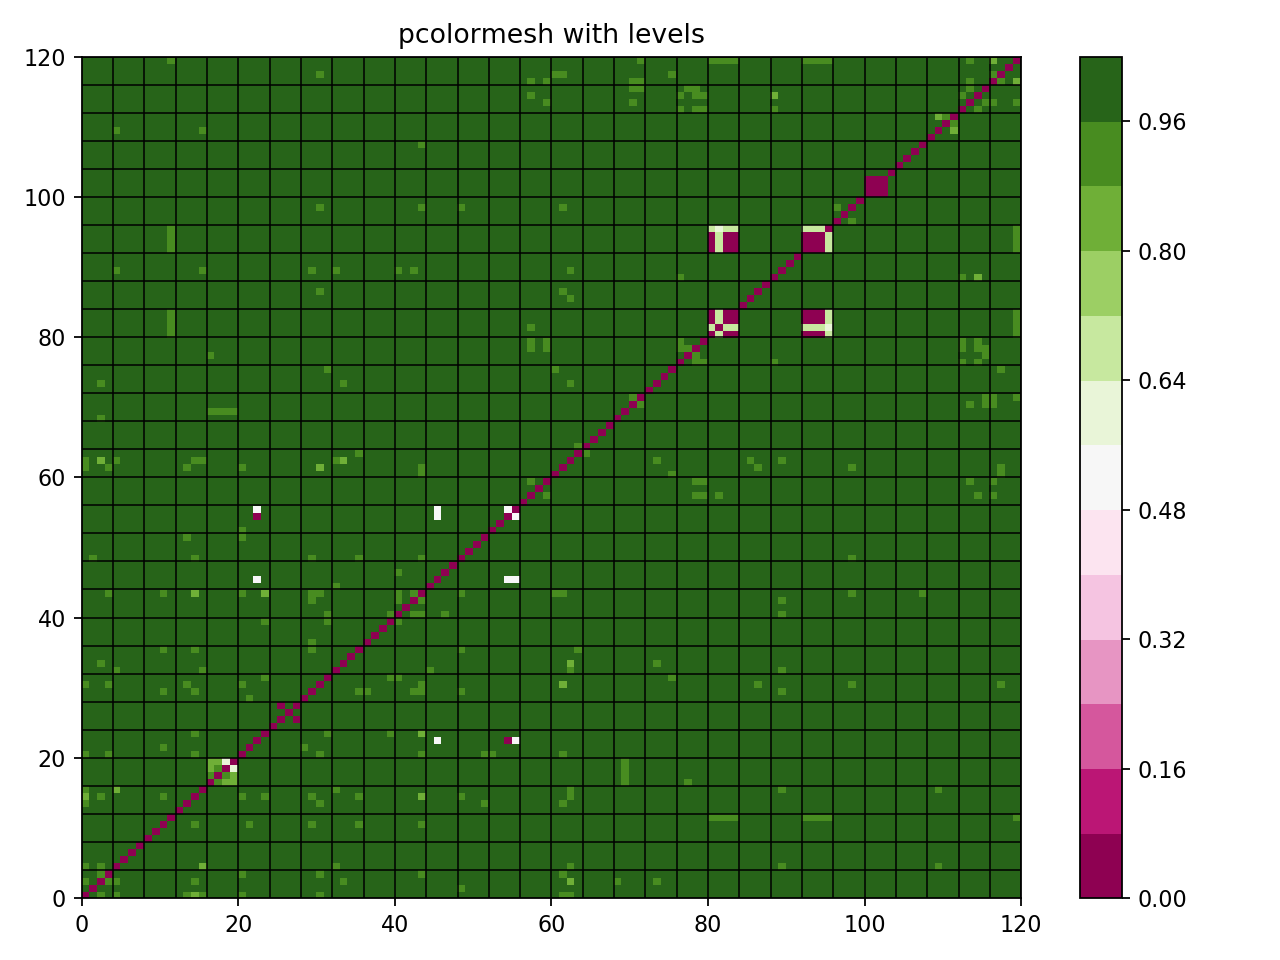

In [210]:
hists_proj4_3gram = get_hists(some_changes_proj4, hists_path=RESULTS_FOR_HIST_PATH_3GRAM, gram_path="3gram")
canberra_dists_proj4_3gram = get_dists(hists_proj4_3gram, canberra_metric, hist_len_3gram)
drawhist2(some_changes_proj4, canberra_dists_proj4_3gram, True, lw=0.7)

In [208]:
some_changes_proj_nums4

[((3, 5683), 4, 0),
 ((3, 5690), 4, 4),
 ((3, 5797), 4, 8),
 ((3, 6684), 4, 12),
 ((3, 6776), 4, 16),
 ((3, 7588), 4, 20),
 ((3, 7789), 4, 24),
 ((3, 7967), 4, 28),
 ((3, 8644), 4, 32),
 ((3, 9789), 4, 36),
 ((3, 9891), 4, 40),
 ((3, 12132), 4, 44),
 ((3, 13077), 4, 48),
 ((3, 14067), 4, 52),
 ((3, 14931), 4, 56),
 ((3, 15127), 4, 60),
 ((4, 718), 4, 64),
 ((4, 764), 4, 68),
 ((4, 945), 4, 72),
 ((4, 1214), 4, 76),
 ((4, 2332), 4, 80),
 ((4, 2676), 4, 84),
 ((4, 3349), 4, 88),
 ((4, 3353), 4, 92),
 ((4, 3592), 4, 96),
 ((4, 3780), 4, 100),
 ((4, 6565), 4, 104),
 ((4, 7238), 4, 108),
 ((4, 8040), 4, 112),
 ((4, 8441), 4, 116)]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


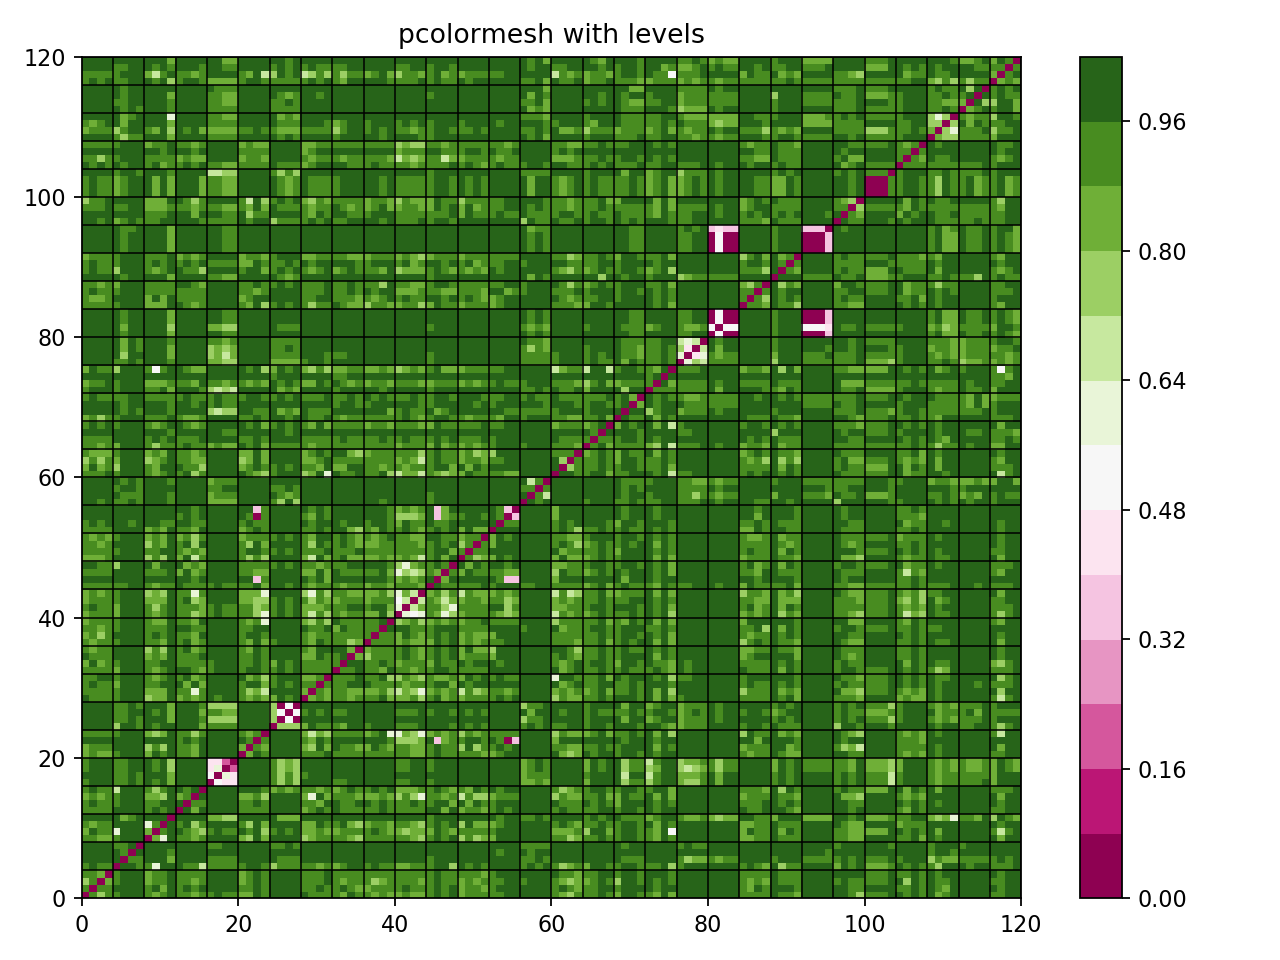

In [211]:
hists_proj4_1gram = get_hists(some_changes_proj4, hists_path=RESULTS_FOR_HIST_PATH_1GRAM, gram_path="1gram")
canberra_dists_proj4_1gram = get_dists(hists_proj4_1gram, canberra_metric, hist_len_1gram)
drawhist2(some_changes_proj4, canberra_dists_proj4_1gram, True, lw=0.7)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


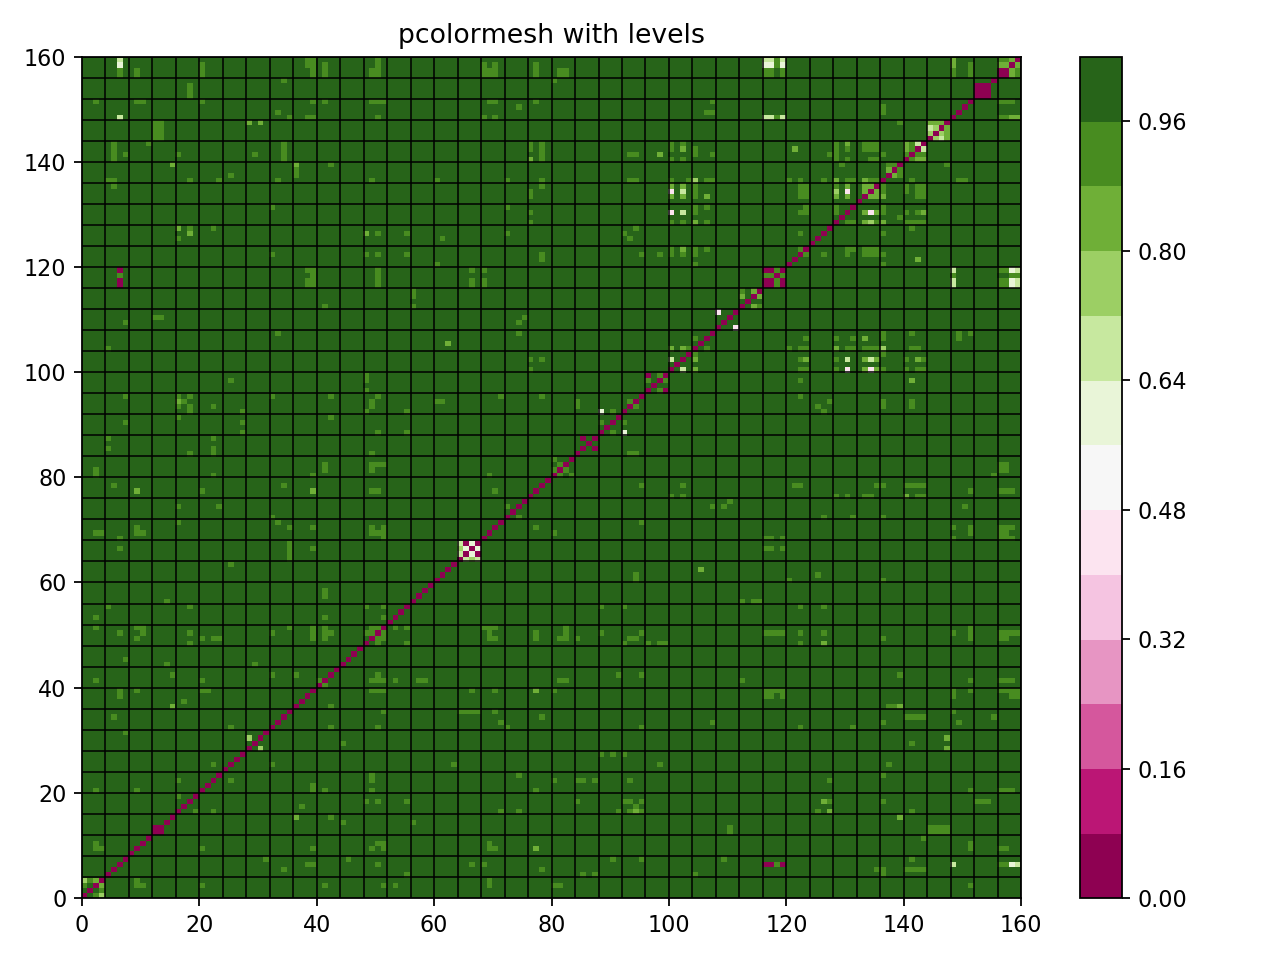

In [247]:
hists_proj5_3gram = get_hists(some_changes_proj5, hists_path=RESULTS_FOR_HIST_PATH_3GRAM, gram_path="3gram")
canberra_dists_proj5_3gram = get_dists(hists_proj5_3gram, canberra_metric, hist_len_3gram)
drawhist2(some_changes_proj5, canberra_dists_proj5_3gram, True, lw=0.7)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


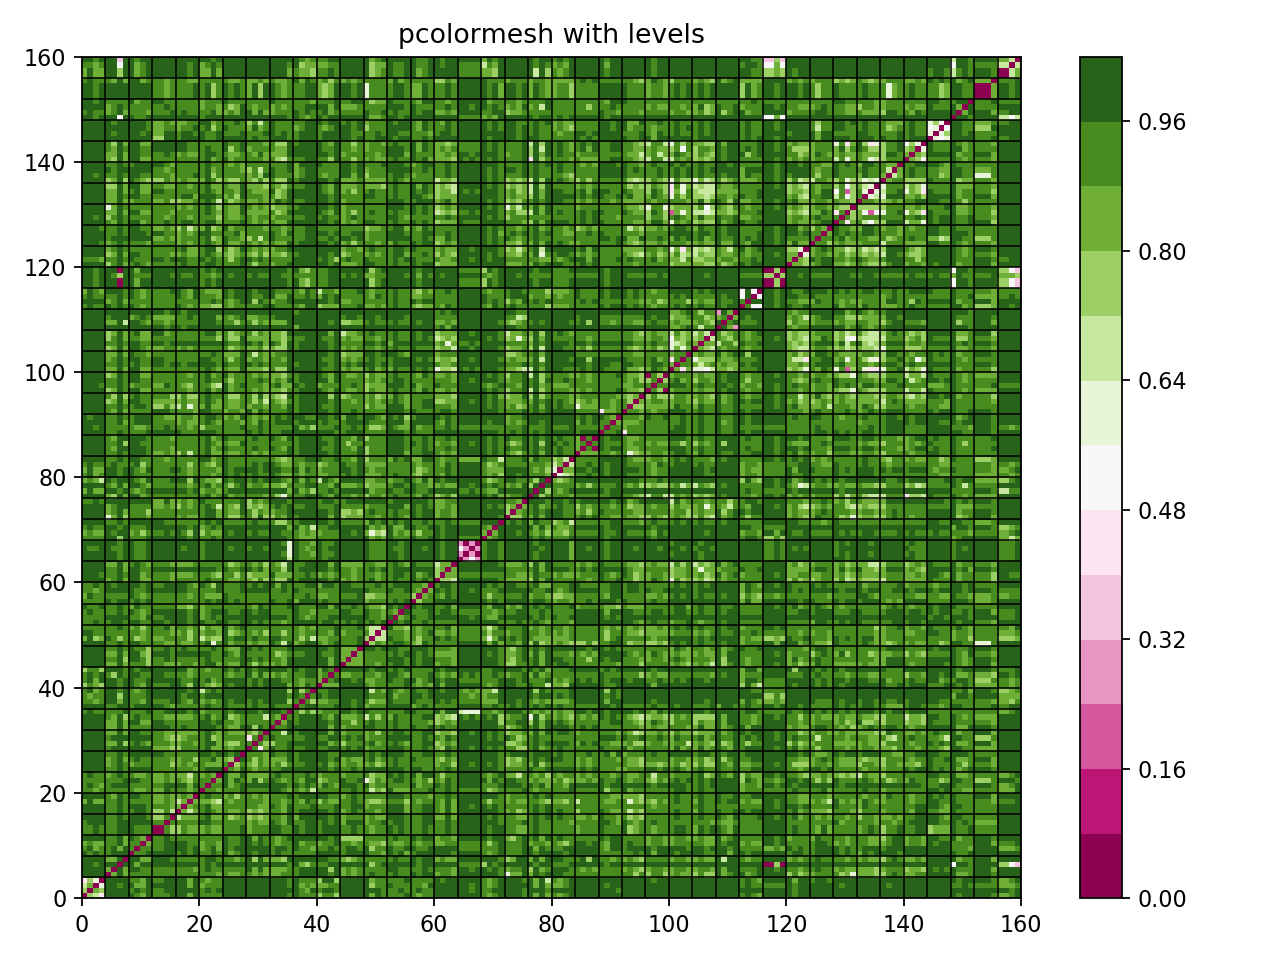

In [219]:
hists_proj5_1gram = get_hists(some_changes_proj5, hists_path=RESULTS_FOR_HIST_PATH_1GRAM, gram_path="1gram")
canberra_dists_proj5_1gram = get_dists(hists_proj5_1gram, canberra_metric, hist_len_1gram)
drawhist2(some_changes_proj5, canberra_dists_proj5_1gram, True, lw=0.7)

In [239]:
some_changes_proj_nums5

[((4, 8690), 4, 0),
 ((4, 9019), 4, 4),
 ((4, 9362), 4, 8),
 ((4, 10155), 4, 12),
 ((4, 10828), 4, 16),
 ((4, 11631), 4, 20),
 ((4, 11677), 4, 24),
 ((4, 12139), 4, 28),
 ((4, 12155), 4, 32),
 ((4, 12440), 4, 36),
 ((4, 12753), 4, 40),
 ((4, 13510), 4, 44),
 ((4, 13597), 4, 48),
 ((4, 13695), 4, 52),
 ((4, 14300), 4, 56),
 ((4, 14726), 4, 60),
 ((4, 14811), 4, 64),
 ((5, 86), 4, 68),
 ((5, 264), 4, 72),
 ((5, 1085), 4, 76),
 ((5, 1889), 4, 80),
 ((5, 2583), 4, 84),
 ((5, 2869), 4, 88),
 ((5, 3498), 4, 92),
 ((5, 3524), 4, 96),
 ((5, 3569), 4, 100),
 ((5, 3660), 4, 104),
 ((5, 3691), 4, 108),
 ((5, 4159), 4, 112),
 ((5, 4353), 4, 116),
 ((5, 5015), 4, 120),
 ((5, 5121), 4, 124),
 ((5, 5515), 4, 128),
 ((5, 5547), 4, 132),
 ((5, 5584), 4, 136),
 ((5, 6137), 4, 140),
 ((5, 6381), 4, 144),
 ((5, 6505), 4, 148),
 ((5, 7487), 4, 152),
 ((5, 7513), 4, 156)]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


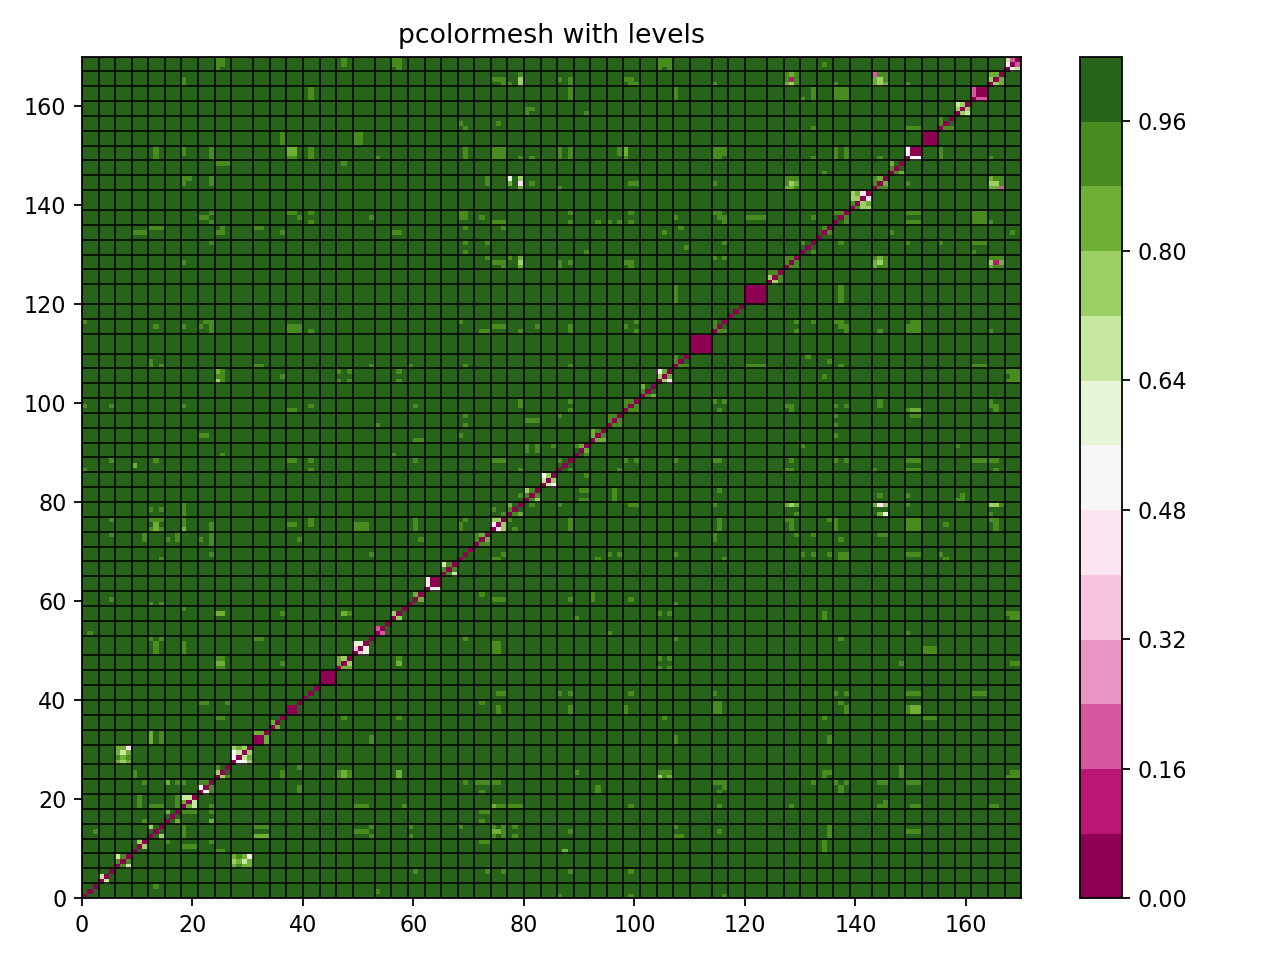

In [252]:
hists_proj6_3gram = get_hists(some_changes_proj6, hists_path=RESULTS_FOR_HIST_PATH_3GRAM, gram_path="3gram")
canberra_dists_proj6_3gram = get_dists(hists_proj6_3gram, canberra_metric, hist_len_3gram)
drawhist2(some_changes_proj6, canberra_dists_proj6_3gram, True, lw=0.7)

In [173]:
cmap = plt.get_cmap('diYG')

ValueError: Colormap diYG is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r